# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 18:54:37.278749: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T18:54:40.684686
2025-04-14 18:54:40.684686


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 509
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 18:54:34"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

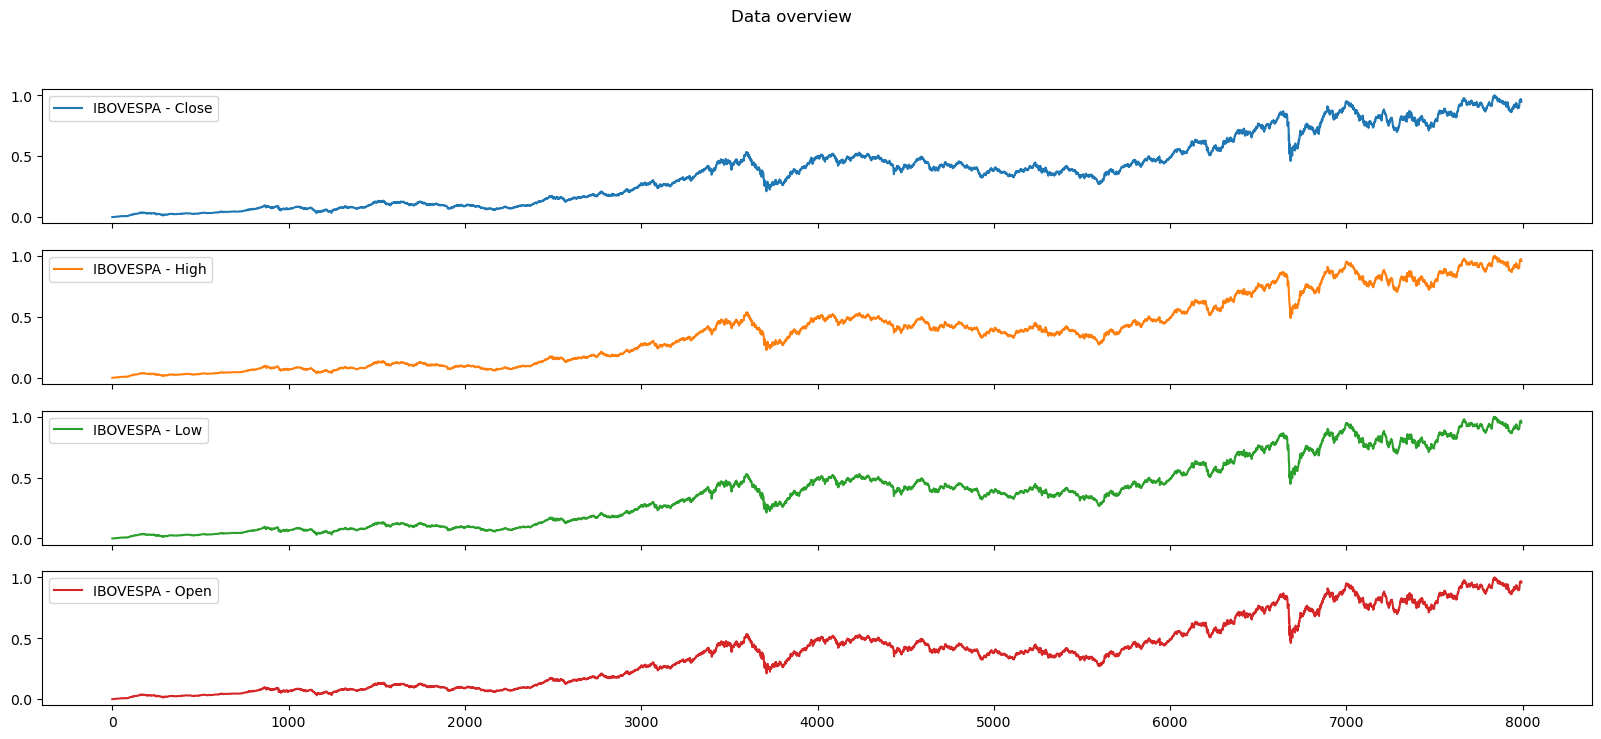

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

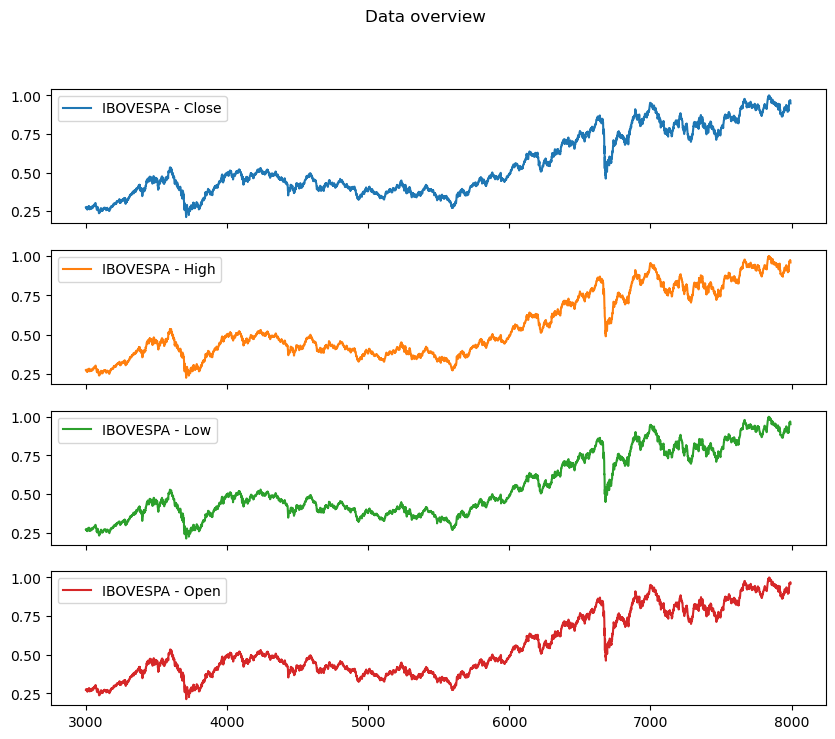

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

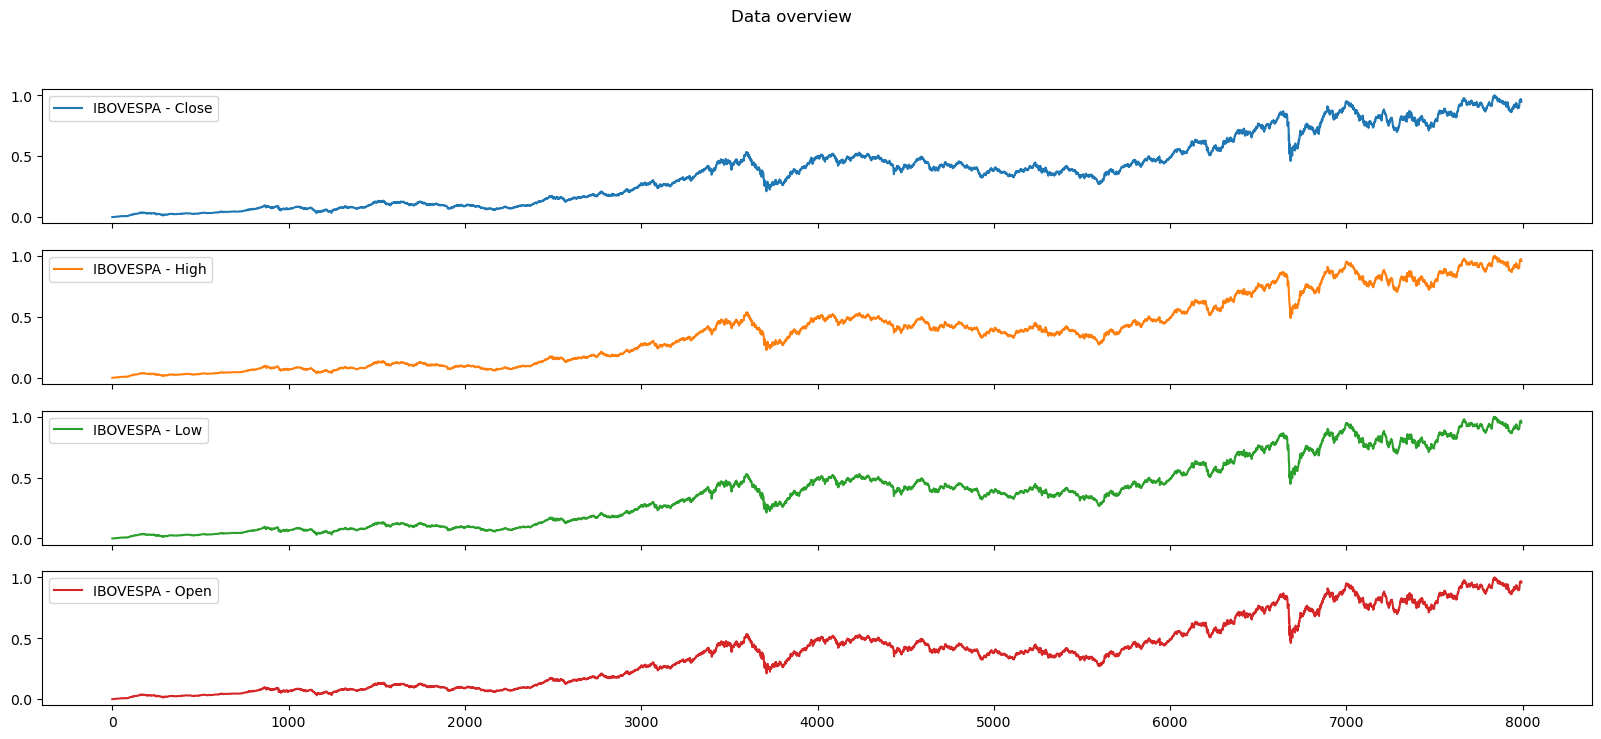

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

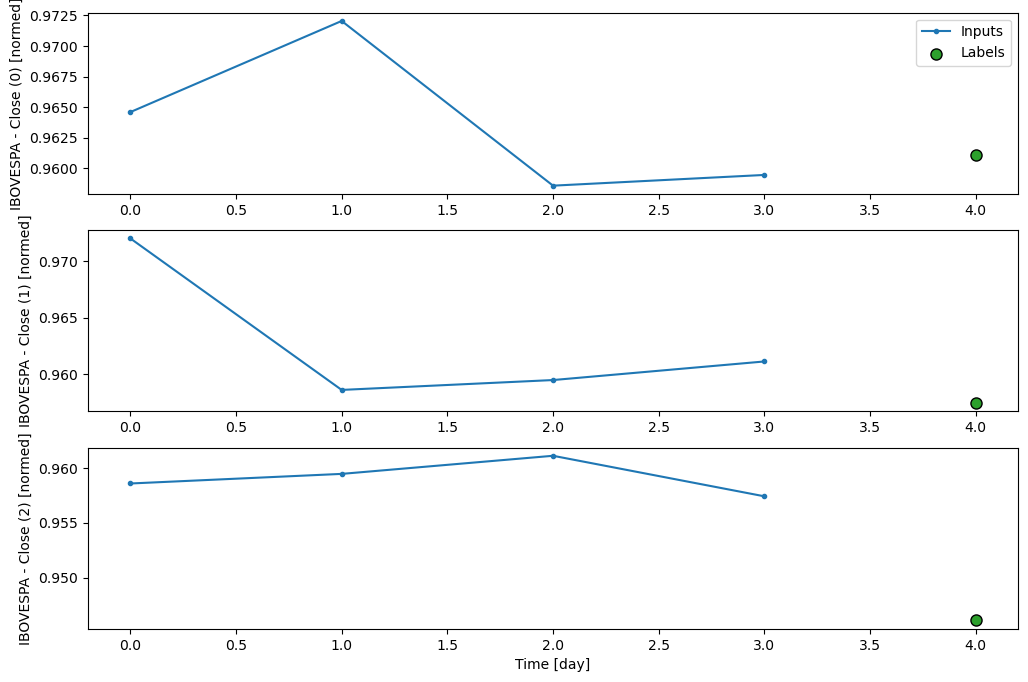

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = tf.keras.backend.eval(optimizer.learning_rate)
        # lr = tf.keras.backend.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print(f"\nEpoch: {Epoch_count} - LR: {lr}")
        return lr

In [24]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

  # opitimizer AdamW
  # optimizer = tf.keras.optimizers.AdamW(learning_rate=LEARNING_RATE) # weight_decay=0.004
  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=0.004)

  # optimizer =  tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE, weight_decay=1e-6)
  
  def scheduler(epoch, lr):
    decay = LEARNING_DECAY
    decayEveryEpochs = DECAY_EVERY_EPOCHS
    iterations = epoch // decayEveryEpochs
    optimizer = model.optimizer
    # return tf.keras.backend.eval(optimizer.learning_rate)
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % decayEveryEpochs == 0) and (epoch != 0):
        lr = lr * (1 - decay)
        lr = lr * (1. / (1. + decay * iterations))
    print(f"Epoch: {epoch} - Learning rate: {optimizer.learning_rate} - LR: {lr}")
    return lr
    return tf.keras.backend.eval(optimizer.learning_rate)
  
  printlr = printlearningrate() 
  updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr,early_stopping]) # updatelr])
  return history

Definir modelo da rede e realizar o treinamento

In [25]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [26]:
num_features = df_x_values.shape[1]

num_features

4

In [27]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [28]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [29]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [30]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [31]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10:44 3s/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0142e-05 - root_mean_squared_error: 0.0032

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 56.5475 - mean_squared_error: 5.2075e-05 - root_mean_squared_error: 0.0066   

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 47.5163 - mean_squared_error: 6.7218e-05 - root_mean_squared_error: 0.0078

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 41.3118 - mean_squared_error: 6.6228e-05 - root_mean_squared_error: 0.0079

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 37.5084 - mean_squared_error: 6.8184e-05 - root_mean_squared_error: 0.0080

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 34.6418 - mean_squared_error: 7.6137e-05 - root_mean_squared_error: 0.0085

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 32.9045 - mean_squared_error: 8.5616e-05 - root_mean_squared_error: 0.0090

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 31.2931 - mean_squared_error: 9.8032e-05 - root_mean_squared_error: 0.0096

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 30.0403 - mean_squared_error: 1.0617e-04 - root_mean_squared_error: 0.0100

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 28.8337 - mean_squared_error: 1.1346e-04 - root_mean_squared_error: 0.0103

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 27.9619 - mean_squared_error: 1.2065e-04 - root_mean_squared_error: 0.0107

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 27.2024 - mean_squared_error: 1.4209e-04 - root_mean_squared_error: 0.0114

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 26.4942 - mean_squared_error: 1.6093e-04 - root_mean_squared_error: 0.0121

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 25.9479 - mean_squared_error: 1.8184e-04 - root_mean_squared_error: 0.0127

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 25.3762 - mean_squared_error: 2.0935e-04 - root_mean_squared_error: 0.0135

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 24.9092 - mean_squared_error: 2.3821e-04 - root_mean_squared_error: 0.0143

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 24.4611 - mean_squared_error: 2.9222e-04 - root_mean_squared_error: 0.0155

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 24.1398 - mean_squared_error: 3.7932e-04 - root_mean_squared_error: 0.0170

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 23.7921 - mean_squared_error: 4.8060e-04 - root_mean_squared_error: 0.0187

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 23.4878 - mean_squared_error: 5.5723e-04 - root_mean_squared_error: 0.0200

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 23.1424 - mean_squared_error: 6.3324e-04 - root_mean_squared_error: 0.0213

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 22.8441 - mean_squared_error: 6.9056e-04 - root_mean_squared_error: 0.0223

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 22.5116 - mean_squared_error: 7.4774e-04 - root_mean_squared_error: 0.0233

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 22.2289 - mean_squared_error: 7.9159e-04 - root_mean_squared_error: 0.0241

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 21.9279 - mean_squared_error: 8.4235e-04 - root_mean_squared_error: 0.0249

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 21.6955 - mean_squared_error: 8.9670e-04 - root_mean_squared_error: 0.0258

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 21.4373 - mean_squared_error: 9.5413e-04 - root_mean_squared_error: 0.0267

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 21.2255 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0275    

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 21.0556 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0283

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 20.8761 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0294

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 20.6874 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0309

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 20.5004 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0322


Epoch: 1 - LR: 0.009752360172569752
238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 20.3839 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0330 - val_loss: 0.0494 - val_mean_absolute_error: 0.0494 - val_mean_absolute_percentage_error: 5.2568 - val_mean_squared_error: 0.0031 - val_root_mean_squared_error: 0.0553


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.4053 - mean_absolute_error: 0.4053 - mean_absolute_percentage_error: 19008.4746 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.4053

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3370 - mean_absolute_error: 0.3370 - mean_absolute_percentage_error: 8033.6880 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3509  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2665 - mean_absolute_error: 0.2665 - mean_absolute_percentage_error: 5651.9258 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2992

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 4316.3032 - mean_squared_error: 0.0743 - root_mean_squared_error: 0.2612

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 3613.2415 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2379

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1647 - mean_absolute_error: 0.1647 - mean_absolute_percentage_error: 3067.8076 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2180

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1498 - mean_absolute_error: 0.1498 - mean_absolute_percentage_error: 2721.9873 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.2044

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 2419.6294 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1918

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 2210.2419 - mean_squared_error: 0.0399 - root_mean_squared_error: 0.1826

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1185 - mean_absolute_error: 0.1185 - mean_absolute_percentage_error: 2015.3217 - mean_squared_error: 0.0366 - root_mean_squared_error: 0.1736

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 1873.6422 - mean_squared_error: 0.0341 - root_mean_squared_error: 0.1669

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1056 - mean_absolute_error: 0.1056 - mean_absolute_percentage_error: 1736.5093 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1600

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1007 - mean_absolute_error: 0.1007 - mean_absolute_percentage_error: 1633.4763 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1547

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 1531.0923 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1493

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 1452.4506 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1450

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0885 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 1382.2267 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1411

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 1319.1111 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1376

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0828 - mean_absolute_error: 0.0828 - mean_absolute_percentage_error: 1262.0565 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1343

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 1210.1973 - mean_squared_error: 0.0225 - root_mean_squared_error: 0.1313

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 1162.8231 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1286

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 1119.3549 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1260

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 1079.3102 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1236

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0724 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 1037.2271 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1210

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 1003.2488 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1188

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0690 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 967.2864 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1165 

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 938.0641 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1146

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 910.7156 - mean_squared_error: 0.0172 - root_mean_squared_error: 0.1128

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0652 - mean_absolute_error: 0.0652 - mean_absolute_percentage_error: 888.6287 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1114

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0638 - mean_absolute_error: 0.0638 - mean_absolute_percentage_error: 860.9436 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1095

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 838.2251 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1080

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0616 - mean_absolute_error: 0.0616 - mean_absolute_percentage_error: 813.8204 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1064

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 793.7123 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1051

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0599 - mean_absolute_error: 0.0599 - mean_absolute_percentage_error: 772.0256 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1037


Epoch: 2 - LR: 0.009510851465165615
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 764.2289 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1032 - val_loss: 0.0200 - val_mean_absolute_error: 0.0200 - val_mean_absolute_percentage_error: 2.2232 - val_mean_squared_error: 6.9764e-04 - val_root_mean_squared_error: 0.0264


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 8721.9512 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1862

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1591 - mean_absolute_error: 0.1591 - mean_absolute_percentage_error: 3916.6172 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1627 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 2591.8855 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1368

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 2050.4912 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1226

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 1674.7334 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1108

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 1452.9373 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1030

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 1268.3280 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0960

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 1144.9154 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0910

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 1032.8989 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0862

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - mean_absolute_percentage_error: 942.7928 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0821 

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0577 - mean_absolute_error: 0.0577 - mean_absolute_percentage_error: 868.5564 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0785

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0544 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 806.2106 - mean_squared_error: 0.0069 - root_mean_squared_error: 0.0754

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 759.2418 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0730

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0493 - mean_absolute_error: 0.0493 - mean_absolute_percentage_error: 712.4608 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0705

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 676.4634 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0686

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0455 - mean_absolute_error: 0.0455 - mean_absolute_percentage_error: 639.9476 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0666

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 615.3033 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0652

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0427 - mean_absolute_error: 0.0427 - mean_absolute_percentage_error: 585.5529 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0636

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0416 - mean_absolute_error: 0.0416 - mean_absolute_percentage_error: 562.0187 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0623

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0405 - mean_absolute_error: 0.0405 - mean_absolute_percentage_error: 537.5558 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0610

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 517.9985 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0599

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 497.4831 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0588

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 480.9435 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0578

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0371 - mean_absolute_error: 0.0371 - mean_absolute_percentage_error: 465.5700 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0569

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 451.2401 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0561

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0356 - mean_absolute_error: 0.0356 - mean_absolute_percentage_error: 436.0051 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0551

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 421.8585 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0543

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 408.6866 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0534

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0337 - mean_absolute_error: 0.0337 - mean_absolute_percentage_error: 396.3905 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0527

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 386.2836 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0521

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 375.4121 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0516

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0326 - mean_absolute_error: 0.0326 - mean_absolute_percentage_error: 367.6945 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0513


Epoch: 3 - LR: 0.009275324642658234
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 360.3244 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0510 - val_loss: 0.0160 - val_mean_absolute_error: 0.0160 - val_mean_absolute_percentage_error: 1.7577 - val_mean_squared_error: 4.5209e-04 - val_root_mean_squared_error: 0.0213


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 2658.4448 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0581

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0344 - mean_absolute_error: 0.0344 - mean_absolute_percentage_error: 1012.6083 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0388 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 712.0422 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 547.1333 - mean_squared_error: 9.6929e-04 - root_mean_squared_error: 0.0297

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 450.5392 - mean_squared_error: 8.2711e-04 - root_mean_squared_error: 0.0272

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 386.2627 - mean_squared_error: 7.3328e-04 - root_mean_squared_error: 0.0256

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 340.0834 - mean_squared_error: 6.6757e-04 - root_mean_squared_error: 0.0244

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 309.0712 - mean_squared_error: 6.3342e-04 - root_mean_squared_error: 0.0238

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 280.7924 - mean_squared_error: 6.0353e-04 - root_mean_squared_error: 0.0233

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 260.4912 - mean_squared_error: 5.7968e-04 - root_mean_squared_error: 0.0229

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 241.0124 - mean_squared_error: 5.5430e-04 - root_mean_squared_error: 0.0224

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 226.5189 - mean_squared_error: 5.3620e-04 - root_mean_squared_error: 0.0221

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 212.2507 - mean_squared_error: 5.2117e-04 - root_mean_squared_error: 0.0218

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 201.3577 - mean_squared_error: 5.1165e-04 - root_mean_squared_error: 0.0217

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 190.3895 - mean_squared_error: 5.0646e-04 - root_mean_squared_error: 0.0216

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 181.8519 - mean_squared_error: 5.0463e-04 - root_mean_squared_error: 0.0216

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 173.1069 - mean_squared_error: 5.0412e-04 - root_mean_squared_error: 0.0217

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 166.2131 - mean_squared_error: 5.0694e-04 - root_mean_squared_error: 0.0218

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 159.0671 - mean_squared_error: 5.1256e-04 - root_mean_squared_error: 0.0219

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 153.3612 - mean_squared_error: 5.1640e-04 - root_mean_squared_error: 0.0221

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 148.0979 - mean_squared_error: 5.1903e-04 - root_mean_squared_error: 0.0221

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 142.5573 - mean_squared_error: 5.2055e-04 - root_mean_squared_error: 0.0222

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 138.0764 - mean_squared_error: 5.2083e-04 - root_mean_squared_error: 0.0222

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 133.3274 - mean_squared_error: 5.2028e-04 - root_mean_squared_error: 0.0223

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 129.4647 - mean_squared_error: 5.1933e-04 - root_mean_squared_error: 0.0223

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 125.3486 - mean_squared_error: 5.1799e-04 - root_mean_squared_error: 0.0222

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 121.9808 - mean_squared_error: 5.1656e-04 - root_mean_squared_error: 0.0222

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 118.3721 - mean_squared_error: 5.1474e-04 - root_mean_squared_error: 0.0222

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 115.4058 - mean_squared_error: 5.1350e-04 - root_mean_squared_error: 0.0222

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 112.2152 - mean_squared_error: 5.1280e-04 - root_mean_squared_error: 0.0222

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 109.5819 - mean_squared_error: 5.1243e-04 - root_mean_squared_error: 0.0222

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 106.7378 - mean_squared_error: 5.1219e-04 - root_mean_squared_error: 0.0222


Epoch: 4 - LR: 0.009045630693435669
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 105.3783 - mean_squared_error: 5.1232e-04 - root_mean_squared_error: 0.0222 - val_loss: 0.0337 - val_mean_absolute_error: 0.0337 - val_mean_absolute_percentage_error: 3.5855 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0374


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1412 - mean_absolute_error: 0.1412 - mean_absolute_percentage_error: 6458.1074 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1414

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0810 - mean_absolute_error: 0.0810 - mean_absolute_percentage_error: 2574.8958 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0947 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 1705.7622 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0870

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0644 - mean_absolute_error: 0.0644 - mean_absolute_percentage_error: 1432.1067 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0817

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0581 - mean_absolute_error: 0.0581 - mean_absolute_percentage_error: 1182.2399 - mean_squared_error: 0.0061 - root_mean_squared_error: 0.0757

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0537 - mean_absolute_error: 0.0537 - mean_absolute_percentage_error: 1014.8498 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0711

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0496 - mean_absolute_error: 0.0496 - mean_absolute_percentage_error: 878.7698 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0668 

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 789.2751 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0637

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0438 - mean_absolute_error: 0.0438 - mean_absolute_percentage_error: 709.0900 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0606

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - mean_absolute_percentage_error: 645.2396 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0580

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 599.0532 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0559

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0376 - mean_absolute_error: 0.0376 - mean_absolute_percentage_error: 554.5312 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0539

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0361 - mean_absolute_error: 0.0361 - mean_absolute_percentage_error: 521.2040 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0523

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 488.1898 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0506

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0335 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 462.9016 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0493

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 437.3473 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0480

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 417.4265 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0469

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 396.9954 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0458

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 380.8589 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0450

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 364.1117 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0441

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 350.7406 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0434

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 336.7307 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0426

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 325.4479 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0420

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 313.5337 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0413

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0269 - mean_absolute_error: 0.0269 - mean_absolute_percentage_error: 303.8724 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0407

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 294.8489 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 285.2354 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0395

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 277.3742 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0391

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 268.9546 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 262.0366 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0381

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 254.5950 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0376

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 248.4557 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373


Epoch: 5 - LR: 0.008821624331176281
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 241.0274 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0368 - val_loss: 0.0111 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 1.2042 - val_mean_squared_error: 1.9911e-04 - val_root_mean_squared_error: 0.0141


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 8274.9883 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1770

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 3348.4133 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1344 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 2334.9980 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1119

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 1776.7260 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0968

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 1451.3109 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0867

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0578 - mean_absolute_error: 0.0578 - mean_absolute_percentage_error: 1235.5636 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0793

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0519 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 1080.8417 - mean_squared_error: 0.0066 - root_mean_squared_error: 0.0736

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 963.7778 - mean_squared_error: 0.0059 - root_mean_squared_error: 0.0691 

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0442 - mean_absolute_error: 0.0442 - mean_absolute_percentage_error: 882.1637 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0658

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 823.4859 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0633

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - mean_absolute_percentage_error: 765.1202 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0608

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 715.2469 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0585

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - mean_absolute_percentage_error: 666.3823 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0563

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0341 - mean_absolute_error: 0.0341 - mean_absolute_percentage_error: 629.3068 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0545

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 592.1567 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0528

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_absolute_percentage_error: 559.5455 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0512

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 530.6733 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0499

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 507.9851 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0488

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 484.5462 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0477

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 465.9077 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0469

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 448.7822 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0461

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 437.3722 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0455

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 426.5816 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0450

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0268 - mean_absolute_error: 0.0268 - mean_absolute_percentage_error: 412.4201 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0443

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 399.2532 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0437

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 385.2903 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0429

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 373.9210 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0423

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 361.7944 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0417

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 351.8686 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0411

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 341.2333 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0406

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 332.4927 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0402

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 324.2322 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0398

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 316.4110 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0394


Epoch: 6 - LR: 0.008603165857493877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 311.0751 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0392 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1739 - val_mean_squared_error: 1.8272e-04 - val_root_mean_squared_error: 0.0135


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 2283.8154 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0476

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0325 - mean_absolute_error: 0.0325 - mean_absolute_percentage_error: 865.7169 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0346  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 613.4713 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 475.7390 - mean_squared_error: 8.6336e-04 - root_mean_squared_error: 0.0288

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 403.3232 - mean_squared_error: 7.9548e-04 - root_mean_squared_error: 0.0277

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 346.5570 - mean_squared_error: 7.3571e-04 - root_mean_squared_error: 0.0266

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 310.0413 - mean_squared_error: 6.8928e-04 - root_mean_squared_error: 0.0257

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 281.3239 - mean_squared_error: 6.4827e-04 - root_mean_squared_error: 0.0249

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 258.0519 - mean_squared_error: 6.1200e-04 - root_mean_squared_error: 0.0241

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 238.7540 - mean_squared_error: 5.7969e-04 - root_mean_squared_error: 0.0234

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 222.4488 - mean_squared_error: 5.5073e-04 - root_mean_squared_error: 0.0228

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 208.4616 - mean_squared_error: 5.2473e-04 - root_mean_squared_error: 0.0222

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 194.7109 - mean_squared_error: 4.9822e-04 - root_mean_squared_error: 0.0215

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 184.2424 - mean_squared_error: 4.7740e-04 - root_mean_squared_error: 0.0210

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 176.2221 - mean_squared_error: 4.6112e-04 - root_mean_squared_error: 0.0206

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 172.4983 - mean_squared_error: 4.5349e-04 - root_mean_squared_error: 0.0204

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 166.6693 - mean_squared_error: 4.4151e-04 - root_mean_squared_error: 0.0201

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 162.3149 - mean_squared_error: 4.3260e-04 - root_mean_squared_error: 0.0199

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 156.2439 - mean_squared_error: 4.2033e-04 - root_mean_squared_error: 0.0196

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 150.6618 - mean_squared_error: 4.0902e-04 - root_mean_squared_error: 0.0193

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 145.5084 - mean_squared_error: 3.9854e-04 - root_mean_squared_error: 0.0190

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 141.5049 - mean_squared_error: 3.9032e-04 - root_mean_squared_error: 0.0188

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 137.0141 - mean_squared_error: 3.8106e-04 - root_mean_squared_error: 0.0186

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 134.1934 - mean_squared_error: 3.7525e-04 - root_mean_squared_error: 0.0184

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 132.1618 - mean_squared_error: 3.7106e-04 - root_mean_squared_error: 0.0183

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 129.5575 - mean_squared_error: 3.6566e-04 - root_mean_squared_error: 0.0182

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 126.4593 - mean_squared_error: 3.5921e-04 - root_mean_squared_error: 0.0180

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 123.5224 - mean_squared_error: 3.5305e-04 - root_mean_squared_error: 0.0178

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 120.1935 - mean_squared_error: 3.4606e-04 - root_mean_squared_error: 0.0176

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 117.0592 - mean_squared_error: 3.3944e-04 - root_mean_squared_error: 0.0175

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 114.5843 - mean_squared_error: 3.3425e-04 - root_mean_squared_error: 0.0173

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 112.2241 - mean_squared_error: 3.2935e-04 - root_mean_squared_error: 0.0172

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 109.9704 - mean_squared_error: 3.2469e-04 - root_mean_squared_error: 0.0171

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 108.6660 - mean_squared_error: 3.2201e-04 - root_mean_squared_error: 0.0170

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 106.5674 - mean_squared_error: 3.1772e-04 - root_mean_squared_error: 0.0169

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 104.5575 - mean_squared_error: 3.1368e-04 - root_mean_squared_error: 0.0168

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 102.2548 - mean_squared_error: 3.0923e-04 - root_mean_squared_error: 0.0166

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 100.4212 - mean_squared_error: 3.0598e-04 - root_mean_squared_error: 0.0166

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 98.6598 - mean_squared_error: 3.0300e-04 - root_mean_squared_error: 0.0165 

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 96.9664 - mean_squared_error: 3.0031e-04 - root_mean_squared_error: 0.0164

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 95.0185 - mean_squared_error: 2.9751e-04 - root_mean_squared_error: 0.0163

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 93.1564 - mean_squared_error: 2.9497e-04 - root_mean_squared_error: 0.0163


Epoch: 7 - LR: 0.00839011650532484
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 92.5545 - mean_squared_error: 2.9421e-04 - root_mean_squared_error: 0.0163 - val_loss: 0.0112 - val_mean_absolute_error: 0.0112 - val_mean_absolute_percentage_error: 1.2121 - val_mean_squared_error: 2.0288e-04 - val_root_mean_squared_error: 0.0142


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 5008.5098 - mean_squared_error: 0.0113 - root_mean_squared_error: 0.1065

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 2394.1707 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0923  

 13/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 1681.7847 - mean_squared_error: 0.0067 - root_mean_squared_error: 0.0807

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0689 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 1379.4283 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0746

 24/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - mean_absolute_percentage_error: 1148.0791 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0689 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 990.5368 - mean_squared_error: 0.0045 - root_mean_squared_error: 0.0644 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 928.6819 - mean_squared_error: 0.0042 - root_mean_squared_error: 0.0625

 38/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 842.8954 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0596

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 773.2302 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0572

 47/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 726.1631 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0554

 51/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 685.1146 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0538

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0422 - mean_absolute_error: 0.0422 - mean_absolute_percentage_error: 632.4251 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0516

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 594.9646 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0500

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - mean_absolute_percentage_error: 556.0706 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0483

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 527.7427 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0470

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 497.7214 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0456

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 471.2758 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0443

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0330 - mean_absolute_error: 0.0330 - mean_absolute_percentage_error: 455.3157 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0435

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 430.0979 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0422

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 410.8250 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0412

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 390.6271 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0401

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0286 - mean_absolute_error: 0.0286 - mean_absolute_percentage_error: 374.9889 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0392

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 360.6875 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0385

127/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0272 - mean_absolute_error: 0.0272 - mean_absolute_percentage_error: 347.5558 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0378

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 337.4029 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0373

137/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 327.8898 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0368

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 317.2317 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0363

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 312.1861 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0361

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 302.6097 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0356

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 292.2262 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0351

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 285.2782 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0347

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 277.4077 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0343

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 270.0022 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0339

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 263.0207 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0335

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 256.4262 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0331

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 250.1865 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0328

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 244.2728 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0324

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 238.6595 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0321

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 235.0726 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0319

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 229.9102 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 224.9914 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0313

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 221.0664 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0311

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 216.5514 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308


Epoch: 8 - LR: 0.008182344026863575
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 212.2365 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0306 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2518 - val_mean_squared_error: 2.1266e-04 - val_root_mean_squared_error: 0.0146


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 3367.3188 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0715

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0596 - mean_absolute_error: 0.0596 - mean_absolute_percentage_error: 1724.4476 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0613

 11/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0502 - mean_absolute_error: 0.0502 - mean_absolute_percentage_error: 1227.0042 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0537

 14/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0473 - mean_absolute_error: 0.0473 - mean_absolute_percentage_error: 1064.4348 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0510

 17/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0447 - mean_absolute_error: 0.0447 - mean_absolute_percentage_error: 945.5156 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0487 

 21/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 829.2382 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0464

 26/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 723.3345 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0440

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 673.6706 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0429

 32/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 631.2350 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0418

 34/238 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 606.2173 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0411

 41/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 534.1049 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0391

 48/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 479.1227 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0373

 56/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 430.0064 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0356

 63/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 395.4148 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0342

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 362.8064 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0328

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 338.8536 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0318

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 318.2004 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 297.7895 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0299

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 282.1844 - mean_squared_error: 9.6785e-04 - root_mean_squared_error: 0.0291

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 266.4453 - mean_squared_error: 9.2123e-04 - root_mean_squared_error: 0.0283

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 254.1956 - mean_squared_error: 8.8516e-04 - root_mean_squared_error: 0.0277

123/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 241.6542 - mean_squared_error: 8.4886e-04 - root_mean_squared_error: 0.0271 

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 231.7671 - mean_squared_error: 8.2144e-04 - root_mean_squared_error: 0.0266

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 221.5177 - mean_squared_error: 7.9336e-04 - root_mean_squared_error: 0.0261

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 213.3427 - mean_squared_error: 7.7087e-04 - root_mean_squared_error: 0.0257

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 206.8519 - mean_squared_error: 7.5293e-04 - root_mean_squared_error: 0.0254

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 200.7851 - mean_squared_error: 7.3597e-04 - root_mean_squared_error: 0.0251

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 196.9554 - mean_squared_error: 7.2516e-04 - root_mean_squared_error: 0.0249

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 191.5059 - mean_squared_error: 7.0968e-04 - root_mean_squared_error: 0.0246

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 186.3819 - mean_squared_error: 6.9505e-04 - root_mean_squared_error: 0.0244

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 181.5540 - mean_squared_error: 6.8116e-04 - root_mean_squared_error: 0.0241

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 176.9965 - mean_squared_error: 6.6801e-04 - root_mean_squared_error: 0.0239

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 172.6865 - mean_squared_error: 6.5557e-04 - root_mean_squared_error: 0.0236

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 168.6032 - mean_squared_error: 6.4376e-04 - root_mean_squared_error: 0.0234

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 165.3606 - mean_squared_error: 6.3439e-04 - root_mean_squared_error: 0.0233

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 164.1020 - mean_squared_error: 6.3077e-04 - root_mean_squared_error: 0.0232

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 161.6475 - mean_squared_error: 6.2370e-04 - root_mean_squared_error: 0.0230

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 158.1175 - mean_squared_error: 6.1491e-04 - root_mean_squared_error: 0.0229

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 154.7576 - mean_squared_error: 6.0872e-04 - root_mean_squared_error: 0.0228

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 152.6066 - mean_squared_error: 6.0641e-04 - root_mean_squared_error: 0.0228

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 150.5227 - mean_squared_error: 6.0539e-04 - root_mean_squared_error: 0.0228

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 149.0016 - mean_squared_error: 6.0511e-04 - root_mean_squared_error: 0.0228

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 145.5837 - mean_squared_error: 6.0519e-04 - root_mean_squared_error: 0.0229


Epoch: 9 - LR: 0.007979716174304485
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 145.1104 - mean_squared_error: 6.0519e-04 - root_mean_squared_error: 0.0229 - val_loss: 0.0340 - val_mean_absolute_error: 0.0340 - val_mean_absolute_percentage_error: 3.6325 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0368


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0681 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 3207.4058 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0681

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0550 - mean_absolute_error: 0.0550 - mean_absolute_percentage_error: 1516.0452 - mean_squared_error: 0.0033 - root_mean_squared_error: 0.0570

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 1111.3065 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0500

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0431 - mean_absolute_error: 0.0431 - mean_absolute_percentage_error: 969.5686 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0470 

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 864.6260 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0446

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - mean_absolute_percentage_error: 759.4459 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0420

 26/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0349 - mean_absolute_error: 0.0349 - mean_absolute_percentage_error: 679.7911 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0398

 31/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 603.2134 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0375

 36/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 543.8047 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0355

 43/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - mean_absolute_percentage_error: 479.8436 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0333

 48/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 443.6132 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0320

 53/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 413.0300 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0308

 58/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 386.8248 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0298

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 351.8502 - mean_squared_error: 9.4787e-04 - root_mean_squared_error: 0.0283

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 326.5874 - mean_squared_error: 8.8449e-04 - root_mean_squared_error: 0.0272

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 302.2572 - mean_squared_error: 8.2299e-04 - root_mean_squared_error: 0.0261

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 284.0598 - mean_squared_error: 7.7689e-04 - root_mean_squared_error: 0.0253

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 266.0352 - mean_squared_error: 7.3111e-04 - root_mean_squared_error: 0.0244

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 252.2319 - mean_squared_error: 6.9633e-04 - root_mean_squared_error: 0.0238

111/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 238.2882 - mean_squared_error: 6.6175e-04 - root_mean_squared_error: 0.0231

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 227.4266 - mean_squared_error: 6.3603e-04 - root_mean_squared_error: 0.0227 

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 216.3114 - mean_squared_error: 6.1550e-04 - root_mean_squared_error: 0.0223

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 206.3704 - mean_squared_error: 6.0753e-04 - root_mean_squared_error: 0.0223

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 198.4761 - mean_squared_error: 6.0188e-04 - root_mean_squared_error: 0.0223

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 190.2461 - mean_squared_error: 5.9690e-04 - root_mean_squared_error: 0.0223

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 183.6468 - mean_squared_error: 5.9276e-04 - root_mean_squared_error: 0.0223

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 176.7041 - mean_squared_error: 5.8793e-04 - root_mean_squared_error: 0.0223

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 171.0935 - mean_squared_error: 5.8371e-04 - root_mean_squared_error: 0.0223

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 165.1497 - mean_squared_error: 5.7888e-04 - root_mean_squared_error: 0.0223

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 160.3240 - mean_squared_error: 5.7708e-04 - root_mean_squared_error: 0.0223

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 155.1817 - mean_squared_error: 5.7531e-04 - root_mean_squared_error: 0.0224

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 150.9744 - mean_squared_error: 5.7363e-04 - root_mean_squared_error: 0.0224

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 146.4669 - mean_squared_error: 5.7192e-04 - root_mean_squared_error: 0.0224

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 142.7654 - mean_squared_error: 5.7279e-04 - root_mean_squared_error: 0.0225

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 138.7880 - mean_squared_error: 5.7855e-04 - root_mean_squared_error: 0.0226

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 135.5082 - mean_squared_error: 5.8536e-04 - root_mean_squared_error: 0.0228


Epoch: 10 - LR: 0.0077821058221161366
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 131.9688 - mean_squared_error: 5.9422e-04 - root_mean_squared_error: 0.0230 - val_loss: 0.0298 - val_mean_absolute_error: 0.0298 - val_mean_absolute_percentage_error: 3.3043 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0338


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.1328 - mean_absolute_error: 0.1328 - mean_absolute_percentage_error: 6228.0312 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1328

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 2826.7297 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1208 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 1882.5057 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1035

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0841 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 1491.6654 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0930

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 1220.0653 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0842

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0659 - mean_absolute_error: 0.0659 - mean_absolute_percentage_error: 1058.9175 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0784

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0594 - mean_absolute_error: 0.0594 - mean_absolute_percentage_error: 924.4380 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0730 

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0549 - mean_absolute_error: 0.0549 - mean_absolute_percentage_error: 834.5062 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0692

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 752.9112 - mean_squared_error: 0.0050 - root_mean_squared_error: 0.0655

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0476 - mean_absolute_error: 0.0476 - mean_absolute_percentage_error: 694.7845 - mean_squared_error: 0.0046 - root_mean_squared_error: 0.0627

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 639.4741 - mean_squared_error: 0.0043 - root_mean_squared_error: 0.0600

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0423 - mean_absolute_error: 0.0423 - mean_absolute_percentage_error: 598.5073 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0578

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0403 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 562.9670 - mean_squared_error: 0.0038 - root_mean_squared_error: 0.0560

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 531.8088 - mean_squared_error: 0.0036 - root_mean_squared_error: 0.0542

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 500.5645 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0525

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0351 - mean_absolute_error: 0.0351 - mean_absolute_percentage_error: 473.1259 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0509

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - mean_absolute_percentage_error: 451.7075 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0496

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 429.7131 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0483

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 412.3203 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0473

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 394.2505 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0462

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 379.8123 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0453

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - mean_absolute_percentage_error: 364.6735 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0443

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - mean_absolute_percentage_error: 352.4751 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0436

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 339.5887 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0427

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 329.1341 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0420

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0265 - mean_absolute_error: 0.0265 - mean_absolute_percentage_error: 318.0208 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0413

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 308.9518 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0406

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 299.2589 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0400

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 290.2122 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0394

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 281.7505 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0388

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 273.8167 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0383

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 267.2677 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0379


Epoch: 11 - LR: 0.007589389570057392


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 262.7986 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0377 - val_loss: 0.0147 - val_mean_absolute_error: 0.0147 - val_mean_absolute_percentage_error: 1.5673 - val_mean_squared_error: 3.0327e-04 - val_root_mean_squared_error: 0.0174


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0499 - mean_absolute_error: 0.0499 - mean_absolute_percentage_error: 2327.7263 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0499

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0367 - mean_absolute_error: 0.0367 - mean_absolute_percentage_error: 951.8653 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0389  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0312 - mean_absolute_error: 0.0312 - mean_absolute_percentage_error: 677.0090 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 539.7620 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0313

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 475.2933 - mean_squared_error: 9.4682e-04 - root_mean_squared_error: 0.0298

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 409.8129 - mean_squared_error: 8.4782e-04 - root_mean_squared_error: 0.0281

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 361.9725 - mean_squared_error: 7.6958e-04 - root_mean_squared_error: 0.0267

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 320.6294 - mean_squared_error: 6.9754e-04 - root_mean_squared_error: 0.0252

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 288.6311 - mean_squared_error: 6.3907e-04 - root_mean_squared_error: 0.0240

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 265.9617 - mean_squared_error: 5.9623e-04 - root_mean_squared_error: 0.0231

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 246.9549 - mean_squared_error: 5.5940e-04 - root_mean_squared_error: 0.0223

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 230.7595 - mean_squared_error: 5.2738e-04 - root_mean_squared_error: 0.0216

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 216.7733 - mean_squared_error: 4.9932e-04 - root_mean_squared_error: 0.0209

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 202.9382 - mean_squared_error: 4.7122e-04 - root_mean_squared_error: 0.0203

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 190.9401 - mean_squared_error: 4.4670e-04 - root_mean_squared_error: 0.0197

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 180.4237 - mean_squared_error: 4.2520e-04 - root_mean_squared_error: 0.0191

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 171.1246 - mean_squared_error: 4.0654e-04 - root_mean_squared_error: 0.0187

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 163.8241 - mean_squared_error: 3.9208e-04 - root_mean_squared_error: 0.0183

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 156.2852 - mean_squared_error: 3.7718e-04 - root_mean_squared_error: 0.0179

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 150.2935 - mean_squared_error: 3.6533e-04 - root_mean_squared_error: 0.0176

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 144.0420 - mean_squared_error: 3.5295e-04 - root_mean_squared_error: 0.0173

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 139.0273 - mean_squared_error: 3.4301e-04 - root_mean_squared_error: 0.0170

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 133.7513 - mean_squared_error: 3.3252e-04 - root_mean_squared_error: 0.0167

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 129.4866 - mean_squared_error: 3.2402e-04 - root_mean_squared_error: 0.0165

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 124.9686 - mean_squared_error: 3.1500e-04 - root_mean_squared_error: 0.0163

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 122.8390 - mean_squared_error: 3.1078e-04 - root_mean_squared_error: 0.0162

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 121.8043 - mean_squared_error: 3.0875e-04 - root_mean_squared_error: 0.0161

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 119.7923 - mean_squared_error: 3.0482e-04 - root_mean_squared_error: 0.0160

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 116.9093 - mean_squared_error: 2.9923e-04 - root_mean_squared_error: 0.0159

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 113.2973 - mean_squared_error: 2.9240e-04 - root_mean_squared_error: 0.0157

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 110.3343 - mean_squared_error: 2.8698e-04 - root_mean_squared_error: 0.0155

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 107.1530 - mean_squared_error: 2.8176e-04 - root_mean_squared_error: 0.0154

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 104.5319 - mean_squared_error: 2.7763e-04 - root_mean_squared_error: 0.0153

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 101.7060 - mean_squared_error: 2.7348e-04 - root_mean_squared_error: 0.0152


Epoch: 12 - LR: 0.007401445880532265
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 99.3697 - mean_squared_error: 2.7017e-04 - root_mean_squared_error: 0.0151 - val_loss: 0.0106 - val_mean_absolute_error: 0.0106 - val_mean_absolute_percentage_error: 1.1454 - val_mean_squared_error: 1.7907e-04 - val_root_mean_squared_error: 0.0134


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 2855.4387 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0607

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0456 - mean_absolute_error: 0.0456 - mean_absolute_percentage_error: 1170.4403 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0479 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 804.5172 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0417 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0345 - mean_absolute_error: 0.0345 - mean_absolute_percentage_error: 631.0164 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0379

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 536.5408 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0354

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 469.3030 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0334

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 418.6806 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 378.9997 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0302

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 351.1349 - mean_squared_error: 9.4599e-04 - root_mean_squared_error: 0.0292

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 320.4202 - mean_squared_error: 8.7404e-04 - root_mean_squared_error: 0.0279

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 298.0986 - mean_squared_error: 8.2059e-04 - root_mean_squared_error: 0.0269

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 276.4933 - mean_squared_error: 7.6792e-04 - root_mean_squared_error: 0.0259

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 260.2602 - mean_squared_error: 7.2778e-04 - root_mean_squared_error: 0.0251

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 246.0179 - mean_squared_error: 6.9216e-04 - root_mean_squared_error: 0.0244

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 231.7247 - mean_squared_error: 6.5611e-04 - root_mean_squared_error: 0.0237

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 220.6507 - mean_squared_error: 6.2810e-04 - root_mean_squared_error: 0.0231

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 209.3560 - mean_squared_error: 5.9984e-04 - root_mean_squared_error: 0.0225

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 200.4799 - mean_squared_error: 5.7777e-04 - root_mean_squared_error: 0.0221

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 191.3063 - mean_squared_error: 5.5494e-04 - root_mean_squared_error: 0.0216

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 184.0103 - mean_squared_error: 5.3671e-04 - root_mean_squared_error: 0.0212

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 176.3929 - mean_squared_error: 5.1764e-04 - root_mean_squared_error: 0.0208

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 170.2790 - mean_squared_error: 5.0230e-04 - root_mean_squared_error: 0.0205

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 163.8430 - mean_squared_error: 4.8609e-04 - root_mean_squared_error: 0.0201

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 158.6382 - mean_squared_error: 4.7294e-04 - root_mean_squared_error: 0.0198

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 153.1218 - mean_squared_error: 4.5899e-04 - root_mean_squared_error: 0.0195

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 149.2565 - mean_squared_error: 4.4928e-04 - root_mean_squared_error: 0.0193

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 145.6022 - mean_squared_error: 4.4016e-04 - root_mean_squared_error: 0.0190

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 142.1412 - mean_squared_error: 4.3158e-04 - root_mean_squared_error: 0.0188

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 138.8580 - mean_squared_error: 4.2353e-04 - root_mean_squared_error: 0.0187

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 135.7388 - mean_squared_error: 4.1603e-04 - root_mean_squared_error: 0.0185

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 132.7725 - mean_squared_error: 4.0962e-04 - root_mean_squared_error: 0.0184

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 129.4899 - mean_squared_error: 4.0332e-04 - root_mean_squared_error: 0.0182

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 126.3842 - mean_squared_error: 3.9828e-04 - root_mean_squared_error: 0.0182

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 123.0322 - mean_squared_error: 3.9333e-04 - root_mean_squared_error: 0.0181


Epoch: 13 - LR: 0.007218156475573778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 122.2259 - mean_squared_error: 3.9221e-04 - root_mean_squared_error: 0.0181 - val_loss: 0.0252 - val_mean_absolute_error: 0.0252 - val_mean_absolute_percentage_error: 2.6786 - val_mean_squared_error: 7.8928e-04 - val_root_mean_squared_error: 0.0281


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 2440.8757 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0520

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0393 - mean_absolute_error: 0.0393 - mean_absolute_percentage_error: 1002.1326 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0413 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - mean_absolute_percentage_error: 695.2488 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0373 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0311 - mean_absolute_error: 0.0311 - mean_absolute_percentage_error: 560.4883 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0344

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 463.9188 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0317

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 405.7080 - mean_squared_error: 9.5706e-04 - root_mean_squared_error: 0.0299

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 356.5808 - mean_squared_error: 8.5996e-04 - root_mean_squared_error: 0.0281

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 323.3711 - mean_squared_error: 7.9170e-04 - root_mean_squared_error: 0.0268

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 292.9886 - mean_squared_error: 7.2731e-04 - root_mean_squared_error: 0.0256

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 274.0971 - mean_squared_error: 6.8636e-04 - root_mean_squared_error: 0.0248

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 257.7708 - mean_squared_error: 6.5042e-04 - root_mean_squared_error: 0.0240

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 243.4892 - mean_squared_error: 6.1858e-04 - root_mean_squared_error: 0.0233

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 230.8776 - mean_squared_error: 5.9020e-04 - root_mean_squared_error: 0.0227

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 216.1704 - mean_squared_error: 5.5680e-04 - root_mean_squared_error: 0.0220

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 204.9184 - mean_squared_error: 5.3121e-04 - root_mean_squared_error: 0.0214

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 193.5609 - mean_squared_error: 5.0551e-04 - root_mean_squared_error: 0.0208

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 184.7172 - mean_squared_error: 4.8596e-04 - root_mean_squared_error: 0.0204

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 175.6609 - mean_squared_error: 4.6673e-04 - root_mean_squared_error: 0.0200

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 168.5151 - mean_squared_error: 4.5208e-04 - root_mean_squared_error: 0.0196

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 161.1051 - mean_squared_error: 4.3732e-04 - root_mean_squared_error: 0.0193

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 155.1935 - mean_squared_error: 4.2567e-04 - root_mean_squared_error: 0.0190

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 149.0025 - mean_squared_error: 4.1341e-04 - root_mean_squared_error: 0.0188

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 144.0191 - mean_squared_error: 4.0344e-04 - root_mean_squared_error: 0.0185

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 138.7596 - mean_squared_error: 3.9283e-04 - root_mean_squared_error: 0.0183

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 134.4961 - mean_squared_error: 3.8417e-04 - root_mean_squared_error: 0.0181

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 129.9678 - mean_squared_error: 3.7495e-04 - root_mean_squared_error: 0.0179

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 126.2752 - mean_squared_error: 3.6745e-04 - root_mean_squared_error: 0.0177

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 122.3307 - mean_squared_error: 3.5948e-04 - root_mean_squared_error: 0.0175

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 119.0974 - mean_squared_error: 3.5306e-04 - root_mean_squared_error: 0.0174

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 116.0488 - mean_squared_error: 3.4730e-04 - root_mean_squared_error: 0.0172

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 113.1691 - mean_squared_error: 3.4207e-04 - root_mean_squared_error: 0.0171

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 110.4439 - mean_squared_error: 3.3726e-04 - root_mean_squared_error: 0.0170

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 107.5027 - mean_squared_error: 3.3216e-04 - root_mean_squared_error: 0.0169


Epoch: 14 - LR: 0.007039405405521393
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 106.0971 - mean_squared_error: 3.2976e-04 - root_mean_squared_error: 0.0168 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096 - val_mean_absolute_percentage_error: 1.0301 - val_mean_squared_error: 1.4187e-04 - val_root_mean_squared_error: 0.0119


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0607 - mean_absolute_error: 0.0607 - mean_absolute_percentage_error: 2838.4460 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0607

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0477 - mean_absolute_error: 0.0477 - mean_absolute_percentage_error: 1180.8641 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0499 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - mean_absolute_percentage_error: 811.3838 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0357 - mean_absolute_error: 0.0357 - mean_absolute_percentage_error: 652.7858 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0394

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - mean_absolute_percentage_error: 539.8461 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0362

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 471.6609 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0340

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 414.0260 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0319

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 375.0954 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0304

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 339.5256 - mean_squared_error: 9.4543e-04 - root_mean_squared_error: 0.0289

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 314.0439 - mean_squared_error: 8.8122e-04 - root_mean_squared_error: 0.0277

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 289.6839 - mean_squared_error: 8.1888e-04 - root_mean_squared_error: 0.0266

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 271.5767 - mean_squared_error: 7.7203e-04 - root_mean_squared_error: 0.0257

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 253.7402 - mean_squared_error: 7.2548e-04 - root_mean_squared_error: 0.0248

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 240.1409 - mean_squared_error: 6.8980e-04 - root_mean_squared_error: 0.0241

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 226.4552 - mean_squared_error: 6.5379e-04 - root_mean_squared_error: 0.0234

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 215.8260 - mean_squared_error: 6.2594e-04 - root_mean_squared_error: 0.0228

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 204.9624 - mean_squared_error: 5.9784e-04 - root_mean_squared_error: 0.0222

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 198.7690 - mean_squared_error: 5.8188e-04 - root_mean_squared_error: 0.0219

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 190.7649 - mean_squared_error: 5.6132e-04 - root_mean_squared_error: 0.0215

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 183.4448 - mean_squared_error: 5.4255e-04 - root_mean_squared_error: 0.0211

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 175.8072 - mean_squared_error: 5.2308e-04 - root_mean_squared_error: 0.0207

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 168.8433 - mean_squared_error: 5.0535e-04 - root_mean_squared_error: 0.0203

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 163.2322 - mean_squared_error: 4.9099e-04 - root_mean_squared_error: 0.0200

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 157.3060 - mean_squared_error: 4.7591e-04 - root_mean_squared_error: 0.0197

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 152.4984 - mean_squared_error: 4.6366e-04 - root_mean_squared_error: 0.0194

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 147.3882 - mean_squared_error: 4.5068e-04 - root_mean_squared_error: 0.0191

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 143.2182 - mean_squared_error: 4.4016e-04 - root_mean_squared_error: 0.0189

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 138.7614 - mean_squared_error: 4.2907e-04 - root_mean_squared_error: 0.0186

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 135.1067 - mean_squared_error: 4.2026e-04 - root_mean_squared_error: 0.0184

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 131.1849 - mean_squared_error: 4.1193e-04 - root_mean_squared_error: 0.0183

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 127.9564 - mean_squared_error: 4.0619e-04 - root_mean_squared_error: 0.0182

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 124.4777 - mean_squared_error: 4.0101e-04 - root_mean_squared_error: 0.0181


Epoch: 15 - LR: 0.0068650818429887295
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 121.6028 - mean_squared_error: 3.9699e-04 - root_mean_squared_error: 0.0180 - val_loss: 0.0098 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 1.0471 - val_mean_squared_error: 1.4695e-04 - val_root_mean_squared_error: 0.0121


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0418 - mean_absolute_error: 0.0418 - mean_absolute_percentage_error: 1972.6260 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0418

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0302 - mean_absolute_error: 0.0302 - mean_absolute_percentage_error: 845.8480 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 561.7269 - mean_squared_error: 7.9348e-04 - root_mean_squared_error: 0.0274

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 458.5487 - mean_squared_error: 6.7574e-04 - root_mean_squared_error: 0.0251

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 390.6343 - mean_squared_error: 5.9094e-04 - root_mean_squared_error: 0.0233

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 342.0734 - mean_squared_error: 5.2745e-04 - root_mean_squared_error: 0.0219

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 305.5537 - mean_squared_error: 4.7882e-04 - root_mean_squared_error: 0.0208

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 268.7242 - mean_squared_error: 4.2892e-04 - root_mean_squared_error: 0.0195

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 243.7857 - mean_squared_error: 3.9422e-04 - root_mean_squared_error: 0.0186

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 220.9536 - mean_squared_error: 3.6174e-04 - root_mean_squared_error: 0.0178

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 204.5909 - mean_squared_error: 3.3811e-04 - root_mean_squared_error: 0.0171

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 188.9545 - mean_squared_error: 3.1530e-04 - root_mean_squared_error: 0.0165

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 177.3154 - mean_squared_error: 2.9818e-04 - root_mean_squared_error: 0.0160

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 165.8320 - mean_squared_error: 2.8116e-04 - root_mean_squared_error: 0.0154

100/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 157.0660 - mean_squared_error: 2.6822e-04 - root_mean_squared_error: 0.0150

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 148.2351 - mean_squared_error: 2.5534e-04 - root_mean_squared_error: 0.0147

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 141.3705 - mean_squared_error: 2.4572e-04 - root_mean_squared_error: 0.0144

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 135.1863 - mean_squared_error: 2.3767e-04 - root_mean_squared_error: 0.0141

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 128.8212 - mean_squared_error: 2.2972e-04 - root_mean_squared_error: 0.0139

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 123.7760 - mean_squared_error: 2.2357e-04 - root_mean_squared_error: 0.0137

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 118.5234 - mean_squared_error: 2.1719e-04 - root_mean_squared_error: 0.0135

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 114.3190 - mean_squared_error: 2.1213e-04 - root_mean_squared_error: 0.0134

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 109.9039 - mean_squared_error: 2.0684e-04 - root_mean_squared_error: 0.0132

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 107.3319 - mean_squared_error: 2.0372e-04 - root_mean_squared_error: 0.0131

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 103.4849 - mean_squared_error: 1.9905e-04 - root_mean_squared_error: 0.0130

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 100.3628 - mean_squared_error: 1.9526e-04 - root_mean_squared_error: 0.0129

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 97.0430 - mean_squared_error: 1.9131e-04 - root_mean_squared_error: 0.0128 

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 93.9591 - mean_squared_error: 1.8771e-04 - root_mean_squared_error: 0.0127

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 91.4346 - mean_squared_error: 1.8493e-04 - root_mean_squared_error: 0.0126

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 88.7285 - mean_squared_error: 1.8217e-04 - root_mean_squared_error: 0.0125

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 86.5032 - mean_squared_error: 1.8023e-04 - root_mean_squared_error: 0.0125

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 84.1076 - mean_squared_error: 1.7835e-04 - root_mean_squared_error: 0.0124

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 82.1296 - mean_squared_error: 1.7695e-04 - root_mean_squared_error: 0.0124


Epoch: 16 - LR: 0.006695074494928122
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 80.5155 - mean_squared_error: 1.7593e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 1.0245 - val_mean_squared_error: 1.3197e-04 - val_root_mean_squared_error: 0.0115


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0486 - mean_absolute_error: 0.0486 - mean_absolute_percentage_error: 2266.4805 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0486

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 937.2460 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0392  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 675.1241 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0358

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0304 - mean_absolute_error: 0.0304 - mean_absolute_percentage_error: 526.8865 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0329

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0282 - mean_absolute_error: 0.0282 - mean_absolute_percentage_error: 447.1162 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0310

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 383.8781 - mean_squared_error: 8.9788e-04 - root_mean_squared_error: 0.0291

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 343.1531 - mean_squared_error: 8.2293e-04 - root_mean_squared_error: 0.0278

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 307.1018 - mean_squared_error: 7.5304e-04 - root_mean_squared_error: 0.0264

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 278.6448 - mean_squared_error: 6.9531e-04 - root_mean_squared_error: 0.0253

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 258.1982 - mean_squared_error: 6.5241e-04 - root_mean_squared_error: 0.0244

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 238.6188 - mean_squared_error: 6.1027e-04 - root_mean_squared_error: 0.0235

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 224.0291 - mean_squared_error: 5.7825e-04 - root_mean_squared_error: 0.0228

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 209.6225 - mean_squared_error: 5.4612e-04 - root_mean_squared_error: 0.0221

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 198.6143 - mean_squared_error: 5.2128e-04 - root_mean_squared_error: 0.0215

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - mean_absolute_percentage_error: 187.5145 - mean_squared_error: 4.9606e-04 - root_mean_squared_error: 0.0209

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 178.8792 - mean_squared_error: 4.7651e-04 - root_mean_squared_error: 0.0204

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 170.0422 - mean_squared_error: 4.5692e-04 - root_mean_squared_error: 0.0200

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 163.0733 - mean_squared_error: 4.4156e-04 - root_mean_squared_error: 0.0196

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 155.8492 - mean_squared_error: 4.2560e-04 - root_mean_squared_error: 0.0192

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 150.0880 - mean_squared_error: 4.1281e-04 - root_mean_squared_error: 0.0189

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 144.7825 - mean_squared_error: 4.0098e-04 - root_mean_squared_error: 0.0186

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 139.2079 - mean_squared_error: 3.8848e-04 - root_mean_squared_error: 0.0183

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 134.7075 - mean_squared_error: 3.7831e-04 - root_mean_squared_error: 0.0180

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 129.9453 - mean_squared_error: 3.6752e-04 - root_mean_squared_error: 0.0177

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 126.0759 - mean_squared_error: 3.5875e-04 - root_mean_squared_error: 0.0175

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 121.9570 - mean_squared_error: 3.4946e-04 - root_mean_squared_error: 0.0173

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 118.5909 - mean_squared_error: 3.4191e-04 - root_mean_squared_error: 0.0171

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 115.4255 - mean_squared_error: 3.3491e-04 - root_mean_squared_error: 0.0169

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 113.2770 - mean_squared_error: 3.3020e-04 - root_mean_squared_error: 0.0168

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 110.4151 - mean_squared_error: 3.2430e-04 - root_mean_squared_error: 0.0166

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 107.7096 - mean_squared_error: 3.1885e-04 - root_mean_squared_error: 0.0165

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 104.7928 - mean_squared_error: 3.1316e-04 - root_mean_squared_error: 0.0163

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 102.3809 - mean_squared_error: 3.0857e-04 - root_mean_squared_error: 0.0162


Epoch: 17 - LR: 0.006529277190566063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 101.7151 - mean_squared_error: 3.0731e-04 - root_mean_squared_error: 0.0162 - val_loss: 0.0086 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.9283 - val_mean_squared_error: 1.1347e-04 - val_root_mean_squared_error: 0.0107


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - mean_absolute_percentage_error: 2233.7405 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0475

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0366 - mean_absolute_error: 0.0366 - mean_absolute_percentage_error: 976.6895 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0383  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 681.1196 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 522.5090 - mean_squared_error: 9.9362e-04 - root_mean_squared_error: 0.0307

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 439.2561 - mean_squared_error: 8.6785e-04 - root_mean_squared_error: 0.0285

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 374.5047 - mean_squared_error: 7.6297e-04 - root_mean_squared_error: 0.0266

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 333.2142 - mean_squared_error: 6.9204e-04 - root_mean_squared_error: 0.0252

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 296.9401 - mean_squared_error: 6.2711e-04 - root_mean_squared_error: 0.0238

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 271.7325 - mean_squared_error: 5.8059e-04 - root_mean_squared_error: 0.0228

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 248.2054 - mean_squared_error: 5.3613e-04 - root_mean_squared_error: 0.0218

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 231.0639 - mean_squared_error: 5.0310e-04 - root_mean_squared_error: 0.0210

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 214.4447 - mean_squared_error: 4.7061e-04 - root_mean_squared_error: 0.0202

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 201.9429 - mean_squared_error: 4.4588e-04 - root_mean_squared_error: 0.0196

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 189.5048 - mean_squared_error: 4.2108e-04 - root_mean_squared_error: 0.0190

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 179.9404 - mean_squared_error: 4.0194e-04 - root_mean_squared_error: 0.0185

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 171.3929 - mean_squared_error: 3.8492e-04 - root_mean_squared_error: 0.0181

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 163.7063 - mean_squared_error: 3.6995e-04 - root_mean_squared_error: 0.0177

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 157.7065 - mean_squared_error: 3.5848e-04 - root_mean_squared_error: 0.0174

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 152.1778 - mean_squared_error: 3.4807e-04 - root_mean_squared_error: 0.0171

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 147.0648 - mean_squared_error: 3.3857e-04 - root_mean_squared_error: 0.0168

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 140.8155 - mean_squared_error: 3.2716e-04 - root_mean_squared_error: 0.0166

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 135.8140 - mean_squared_error: 3.1823e-04 - root_mean_squared_error: 0.0163

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 130.5604 - mean_squared_error: 3.0878e-04 - root_mean_squared_error: 0.0161

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 126.3204 - mean_squared_error: 3.0113e-04 - root_mean_squared_error: 0.0159

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 121.8351 - mean_squared_error: 2.9304e-04 - root_mean_squared_error: 0.0157

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 118.1920 - mean_squared_error: 2.8652e-04 - root_mean_squared_error: 0.0155

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 114.3151 - mean_squared_error: 2.7970e-04 - root_mean_squared_error: 0.0153

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 111.1482 - mean_squared_error: 2.7431e-04 - root_mean_squared_error: 0.0152

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 107.7604 - mean_squared_error: 2.6884e-04 - root_mean_squared_error: 0.0150

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 104.5952 - mean_squared_error: 2.6417e-04 - root_mean_squared_error: 0.0149

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 101.9911 - mean_squared_error: 2.6076e-04 - root_mean_squared_error: 0.0148

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 99.1867 - mean_squared_error: 2.5745e-04 - root_mean_squared_error: 0.0148 

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 96.8699 - mean_squared_error: 2.5490e-04 - root_mean_squared_error: 0.0147


Epoch: 18 - LR: 0.006367586553096771
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 95.6000 - mean_squared_error: 2.5357e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0090 - val_mean_absolute_error: 0.0090 - val_mean_absolute_percentage_error: 0.9769 - val_mean_squared_error: 1.2644e-04 - val_root_mean_squared_error: 0.0112


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0432 - mean_absolute_error: 0.0432 - mean_absolute_percentage_error: 2025.9940 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0432

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - mean_absolute_percentage_error: 830.4241 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 598.8688 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0316

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 468.4243 - mean_squared_error: 8.9323e-04 - root_mean_squared_error: 0.0294

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 397.6743 - mean_squared_error: 8.0095e-04 - root_mean_squared_error: 0.0277

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0230 - mean_absolute_error: 0.0230 - mean_absolute_percentage_error: 341.4241 - mean_squared_error: 7.1612e-04 - root_mean_squared_error: 0.0261

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 305.0535 - mean_squared_error: 6.5598e-04 - root_mean_squared_error: 0.0248

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 272.8474 - mean_squared_error: 5.9965e-04 - root_mean_squared_error: 0.0236

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 247.4592 - mean_squared_error: 5.5330e-04 - root_mean_squared_error: 0.0226

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 226.8845 - mean_squared_error: 5.1449e-04 - root_mean_squared_error: 0.0217

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 209.8357 - mean_squared_error: 4.8149e-04 - root_mean_squared_error: 0.0209

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 197.1111 - mean_squared_error: 4.5640e-04 - root_mean_squared_error: 0.0202

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 184.5294 - mean_squared_error: 4.3120e-04 - root_mean_squared_error: 0.0196

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 174.9062 - mean_squared_error: 4.1175e-04 - root_mean_squared_error: 0.0191

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 165.1950 - mean_squared_error: 3.9205e-04 - root_mean_squared_error: 0.0186

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 157.6349 - mean_squared_error: 3.7687e-04 - root_mean_squared_error: 0.0182

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 149.8943 - mean_squared_error: 3.6180e-04 - root_mean_squared_error: 0.0178

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 143.7861 - mean_squared_error: 3.4999e-04 - root_mean_squared_error: 0.0175

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 137.4506 - mean_squared_error: 3.3771e-04 - root_mean_squared_error: 0.0171

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 132.3961 - mean_squared_error: 3.2788e-04 - root_mean_squared_error: 0.0169

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 127.1039 - mean_squared_error: 3.1758e-04 - root_mean_squared_error: 0.0166

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 122.8456 - mean_squared_error: 3.0927e-04 - root_mean_squared_error: 0.0163

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 118.3520 - mean_squared_error: 3.0043e-04 - root_mean_squared_error: 0.0161

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 114.2101 - mean_squared_error: 2.9226e-04 - root_mean_squared_error: 0.0159

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 110.8429 - mean_squared_error: 2.8564e-04 - root_mean_squared_error: 0.0157

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 107.2561 - mean_squared_error: 2.7865e-04 - root_mean_squared_error: 0.0155

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 104.3231 - mean_squared_error: 2.7301e-04 - root_mean_squared_error: 0.0153

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 101.1827 - mean_squared_error: 2.6710e-04 - root_mean_squared_error: 0.0151

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 98.6029 - mean_squared_error: 2.6261e-04 - root_mean_squared_error: 0.0150 

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 95.8285 - mean_squared_error: 2.5803e-04 - root_mean_squared_error: 0.0149

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 93.5396 - mean_squared_error: 2.5441e-04 - root_mean_squared_error: 0.0148

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 91.0686 - mean_squared_error: 2.5064e-04 - root_mean_squared_error: 0.0147


Epoch: 19 - LR: 0.0062098996713757515
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 90.1797 - mean_squared_error: 2.4931e-04 - root_mean_squared_error: 0.0147 - val_loss: 0.0093 - val_mean_absolute_error: 0.0093 - val_mean_absolute_percentage_error: 1.0061 - val_mean_squared_error: 1.3522e-04 - val_root_mean_squared_error: 0.0116


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 1858.5728 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0397

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 812.7987 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0319  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 547.4069 - mean_squared_error: 8.4123e-04 - root_mean_squared_error: 0.0286

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 463.4622 - mean_squared_error: 7.5372e-04 - root_mean_squared_error: 0.0269

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 385.4081 - mean_squared_error: 6.5818e-04 - root_mean_squared_error: 0.0250

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 332.2635 - mean_squared_error: 5.8659e-04 - root_mean_squared_error: 0.0235

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 288.6849 - mean_squared_error: 5.2344e-04 - root_mean_squared_error: 0.0220

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 259.8635 - mean_squared_error: 4.7948e-04 - root_mean_squared_error: 0.0210

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 233.9291 - mean_squared_error: 4.3862e-04 - root_mean_squared_error: 0.0200

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 215.5713 - mean_squared_error: 4.0888e-04 - root_mean_squared_error: 0.0192

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 198.1955 - mean_squared_error: 3.8010e-04 - root_mean_squared_error: 0.0184

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 183.6974 - mean_squared_error: 3.5562e-04 - root_mean_squared_error: 0.0177

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 172.8270 - mean_squared_error: 3.3705e-04 - root_mean_squared_error: 0.0172

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 162.0411 - mean_squared_error: 3.1849e-04 - root_mean_squared_error: 0.0166

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 153.7671 - mean_squared_error: 3.0428e-04 - root_mean_squared_error: 0.0162

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 145.3955 - mean_squared_error: 2.9005e-04 - root_mean_squared_error: 0.0158

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 138.8647 - mean_squared_error: 2.7932e-04 - root_mean_squared_error: 0.0155

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 132.1637 - mean_squared_error: 2.6865e-04 - root_mean_squared_error: 0.0152

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 126.8663 - mean_squared_error: 2.6041e-04 - root_mean_squared_error: 0.0149

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 121.3642 - mean_squared_error: 2.5196e-04 - root_mean_squared_error: 0.0147

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 116.9704 - mean_squared_error: 2.4540e-04 - root_mean_squared_error: 0.0145

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 112.3641 - mean_squared_error: 2.3853e-04 - root_mean_squared_error: 0.0143

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 108.6525 - mean_squared_error: 2.3293e-04 - root_mean_squared_error: 0.0141

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 104.7327 - mean_squared_error: 2.2705e-04 - root_mean_squared_error: 0.0139

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 101.5528 - mean_squared_error: 2.2227e-04 - root_mean_squared_error: 0.0138

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 98.1729 - mean_squared_error: 2.1722e-04 - root_mean_squared_error: 0.0136 

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 95.0346 - mean_squared_error: 2.1256e-04 - root_mean_squared_error: 0.0135

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 92.4664 - mean_squared_error: 2.0883e-04 - root_mean_squared_error: 0.0134

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 89.7146 - mean_squared_error: 2.0507e-04 - root_mean_squared_error: 0.0133

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 87.4543 - mean_squared_error: 2.0286e-04 - root_mean_squared_error: 0.0132

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 85.0239 - mean_squared_error: 2.0154e-04 - root_mean_squared_error: 0.0132

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 83.0193 - mean_squared_error: 2.0128e-04 - root_mean_squared_error: 0.0132


Epoch: 20 - LR: 0.006056117359548807
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 80.8550 - mean_squared_error: 2.0126e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.8925 - val_mean_squared_error: 1.0465e-04 - val_root_mean_squared_error: 0.0102


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0406 - mean_absolute_error: 0.0406 - mean_absolute_percentage_error: 1903.2679 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0406

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - mean_absolute_percentage_error: 780.1140 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0320  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 541.8910 - mean_squared_error: 8.7395e-04 - root_mean_squared_error: 0.0291

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 439.3953 - mean_squared_error: 7.7796e-04 - root_mean_squared_error: 0.0274

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 373.5190 - mean_squared_error: 7.0516e-04 - root_mean_squared_error: 0.0261

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 326.8449 - mean_squared_error: 6.4531e-04 - root_mean_squared_error: 0.0249

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 287.4787 - mean_squared_error: 5.8884e-04 - root_mean_squared_error: 0.0236

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 260.8503 - mean_squared_error: 5.4738e-04 - root_mean_squared_error: 0.0227

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 239.2324 - mean_squared_error: 5.1178e-04 - root_mean_squared_error: 0.0219

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 226.1014 - mean_squared_error: 4.8931e-04 - root_mean_squared_error: 0.0213

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 208.1630 - mean_squared_error: 4.5760e-04 - root_mean_squared_error: 0.0205

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 194.8931 - mean_squared_error: 4.3340e-04 - root_mean_squared_error: 0.0199

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 181.8720 - mean_squared_error: 4.0911e-04 - root_mean_squared_error: 0.0193

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 171.9774 - mean_squared_error: 3.9034e-04 - root_mean_squared_error: 0.0188

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 162.0499 - mean_squared_error: 3.7137e-04 - root_mean_squared_error: 0.0183

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 154.3587 - mean_squared_error: 3.5669e-04 - root_mean_squared_error: 0.0179

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 146.5143 - mean_squared_error: 3.4211e-04 - root_mean_squared_error: 0.0174

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 140.3521 - mean_squared_error: 3.3100e-04 - root_mean_squared_error: 0.0171

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 134.7445 - mean_squared_error: 3.2105e-04 - root_mean_squared_error: 0.0169

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 128.9192 - mean_squared_error: 3.1077e-04 - root_mean_squared_error: 0.0166

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 124.2651 - mean_squared_error: 3.0255e-04 - root_mean_squared_error: 0.0164

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 119.3862 - mean_squared_error: 2.9397e-04 - root_mean_squared_error: 0.0161

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 114.9169 - mean_squared_error: 2.8603e-04 - root_mean_squared_error: 0.0159

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 110.8058 - mean_squared_error: 2.7866e-04 - root_mean_squared_error: 0.0157

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 107.4689 - mean_squared_error: 2.7264e-04 - root_mean_squared_error: 0.0155

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 103.9203 - mean_squared_error: 2.6624e-04 - root_mean_squared_error: 0.0153

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 101.0231 - mean_squared_error: 2.6102e-04 - root_mean_squared_error: 0.0152

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 97.9251 - mean_squared_error: 2.5553e-04 - root_mean_squared_error: 0.0150 

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 95.3829 - mean_squared_error: 2.5110e-04 - root_mean_squared_error: 0.0149

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 92.6526 - mean_squared_error: 2.4675e-04 - root_mean_squared_error: 0.0147

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 90.4027 - mean_squared_error: 2.4328e-04 - root_mean_squared_error: 0.0146

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 87.9760 - mean_squared_error: 2.3968e-04 - root_mean_squared_error: 0.0145


Epoch: 21 - LR: 0.005906143691390753
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 85.6911 - mean_squared_error: 2.3641e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8457 - val_mean_squared_error: 9.3280e-05 - val_root_mean_squared_error: 0.0097


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0396 - mean_absolute_error: 0.0396 - mean_absolute_percentage_error: 1855.9941 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0396

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0298 - mean_absolute_error: 0.0298 - mean_absolute_percentage_error: 762.5843 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0314  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0264 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 529.2121 - mean_squared_error: 8.3130e-04 - root_mean_squared_error: 0.0284

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 417.6804 - mean_squared_error: 7.2059e-04 - root_mean_squared_error: 0.0263

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 356.1272 - mean_squared_error: 6.4516e-04 - root_mean_squared_error: 0.0248

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 306.8644 - mean_squared_error: 5.7748e-04 - root_mean_squared_error: 0.0234

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 274.8709 - mean_squared_error: 5.2991e-04 - root_mean_squared_error: 0.0223

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 246.4086 - mean_squared_error: 4.8543e-04 - root_mean_squared_error: 0.0212

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 226.4332 - mean_squared_error: 4.5295e-04 - root_mean_squared_error: 0.0204

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 207.6491 - mean_squared_error: 4.2143e-04 - root_mean_squared_error: 0.0196

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 193.8670 - mean_squared_error: 3.9766e-04 - root_mean_squared_error: 0.0190

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 180.4307 - mean_squared_error: 3.7407e-04 - root_mean_squared_error: 0.0183

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 170.2762 - mean_squared_error: 3.5599e-04 - root_mean_squared_error: 0.0178

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 161.3247 - mean_squared_error: 3.3991e-04 - root_mean_squared_error: 0.0174

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 155.5495 - mean_squared_error: 3.2949e-04 - root_mean_squared_error: 0.0171

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 151.2519 - mean_squared_error: 3.2173e-04 - root_mean_squared_error: 0.0168

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 146.2404 - mean_squared_error: 3.1279e-04 - root_mean_squared_error: 0.0166

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 139.8206 - mean_squared_error: 3.0162e-04 - root_mean_squared_error: 0.0162

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 133.2168 - mean_squared_error: 2.9037e-04 - root_mean_squared_error: 0.0159

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 127.9854 - mean_squared_error: 2.8163e-04 - root_mean_squared_error: 0.0157

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 122.5427 - mean_squared_error: 2.7269e-04 - root_mean_squared_error: 0.0154

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 117.5951 - mean_squared_error: 2.6478e-04 - root_mean_squared_error: 0.0152

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 113.0737 - mean_squared_error: 2.5748e-04 - root_mean_squared_error: 0.0150

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 109.4241 - mean_squared_error: 2.5155e-04 - root_mean_squared_error: 0.0148

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 106.0283 - mean_squared_error: 2.4600e-04 - root_mean_squared_error: 0.0146

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 102.8606 - mean_squared_error: 2.4084e-04 - root_mean_squared_error: 0.0145

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 99.8983 - mean_squared_error: 2.3610e-04 - root_mean_squared_error: 0.0143 

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 96.7389 - mean_squared_error: 2.3121e-04 - root_mean_squared_error: 0.0142

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 94.1525 - mean_squared_error: 2.2739e-04 - root_mean_squared_error: 0.0141

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 91.7158 - mean_squared_error: 2.2392e-04 - root_mean_squared_error: 0.0140

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 89.7372 - mean_squared_error: 2.2141e-04 - root_mean_squared_error: 0.0139

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 87.2424 - mean_squared_error: 2.1836e-04 - root_mean_squared_error: 0.0138

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 85.1830 - mean_squared_error: 2.1595e-04 - root_mean_squared_error: 0.0138


Epoch: 22 - LR: 0.00575988320633769
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 82.6899 - mean_squared_error: 2.1316e-04 - root_mean_squared_error: 0.0137 - val_loss: 0.0099 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 1.0573 - val_mean_squared_error: 1.5173e-04 - val_root_mean_squared_error: 0.0123


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0400 - mean_absolute_error: 0.0400 - mean_absolute_percentage_error: 1877.2480 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0400

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - mean_absolute_percentage_error: 820.3420 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 549.8087 - mean_squared_error: 8.2094e-04 - root_mean_squared_error: 0.0281

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 438.6742 - mean_squared_error: 6.9948e-04 - root_mean_squared_error: 0.0258

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 360.9956 - mean_squared_error: 6.0259e-04 - root_mean_squared_error: 0.0238

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 314.6251 - mean_squared_error: 5.3979e-04 - root_mean_squared_error: 0.0224

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 275.7033 - mean_squared_error: 4.8378e-04 - root_mean_squared_error: 0.0211

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 249.5314 - mean_squared_error: 4.4459e-04 - root_mean_squared_error: 0.0201

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 225.6942 - mean_squared_error: 4.0784e-04 - root_mean_squared_error: 0.0191

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 208.6669 - mean_squared_error: 3.8096e-04 - root_mean_squared_error: 0.0184

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 192.4336 - mean_squared_error: 3.5485e-04 - root_mean_squared_error: 0.0177

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 182.0017 - mean_squared_error: 3.3786e-04 - root_mean_squared_error: 0.0172

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 171.3279 - mean_squared_error: 3.2036e-04 - root_mean_squared_error: 0.0167

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 161.9664 - mean_squared_error: 3.0490e-04 - root_mean_squared_error: 0.0162

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 153.6811 - mean_squared_error: 2.9118e-04 - root_mean_squared_error: 0.0158

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 148.3187 - mean_squared_error: 2.8230e-04 - root_mean_squared_error: 0.0155

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 143.3591 - mean_squared_error: 2.7422e-04 - root_mean_squared_error: 0.0153

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 137.8781 - mean_squared_error: 2.6557e-04 - root_mean_squared_error: 0.0150

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 133.6583 - mean_squared_error: 2.5910e-04 - root_mean_squared_error: 0.0148

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 128.9610 - mean_squared_error: 2.5203e-04 - root_mean_squared_error: 0.0146

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 123.9261 - mean_squared_error: 2.4457e-04 - root_mean_squared_error: 0.0144

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 119.3121 - mean_squared_error: 2.3787e-04 - root_mean_squared_error: 0.0142

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 115.0670 - mean_squared_error: 2.3184e-04 - root_mean_squared_error: 0.0140

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 111.1456 - mean_squared_error: 2.2624e-04 - root_mean_squared_error: 0.0139

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 107.5111 - mean_squared_error: 2.2102e-04 - root_mean_squared_error: 0.0137

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 104.1322 - mean_squared_error: 2.1616e-04 - root_mean_squared_error: 0.0136

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 100.5500 - mean_squared_error: 2.1103e-04 - root_mean_squared_error: 0.0134

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 97.2336 - mean_squared_error: 2.0639e-04 - root_mean_squared_error: 0.0133 

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 94.1530 - mean_squared_error: 2.0224e-04 - root_mean_squared_error: 0.0131

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 91.6311 - mean_squared_error: 1.9902e-04 - root_mean_squared_error: 0.0131

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 89.2555 - mean_squared_error: 1.9621e-04 - root_mean_squared_error: 0.0130

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 87.0143 - mean_squared_error: 1.9401e-04 - root_mean_squared_error: 0.0129

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 84.6021 - mean_squared_error: 1.9195e-04 - root_mean_squared_error: 0.0129

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 82.6111 - mean_squared_error: 1.9060e-04 - root_mean_squared_error: 0.0129


Epoch: 23 - LR: 0.005617246031761169
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 80.7229 - mean_squared_error: 1.8957e-04 - root_mean_squared_error: 0.0128 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 1.3231 - val_mean_squared_error: 2.3091e-04 - val_root_mean_squared_error: 0.0152


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 1432.6061 - mean_squared_error: 9.3481e-04 - root_mean_squared_error: 0.0306

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 622.7729 - mean_squared_error: 6.0140e-04 - root_mean_squared_error: 0.0242  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 415.6795 - mean_squared_error: 4.5925e-04 - root_mean_squared_error: 0.0210

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 332.4445 - mean_squared_error: 3.9984e-04 - root_mean_squared_error: 0.0195

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 274.4071 - mean_squared_error: 3.5277e-04 - root_mean_squared_error: 0.0183

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 239.7102 - mean_squared_error: 3.2133e-04 - root_mean_squared_error: 0.0174

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 210.5176 - mean_squared_error: 2.9208e-04 - root_mean_squared_error: 0.0165

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 190.8908 - mean_squared_error: 2.7194e-04 - root_mean_squared_error: 0.0159

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 172.9955 - mean_squared_error: 2.5286e-04 - root_mean_squared_error: 0.0153

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 160.1850 - mean_squared_error: 2.3852e-04 - root_mean_squared_error: 0.0148

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 147.9511 - mean_squared_error: 2.2430e-04 - root_mean_squared_error: 0.0143

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 138.8574 - mean_squared_error: 2.1349e-04 - root_mean_squared_error: 0.0140

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 129.8969 - mean_squared_error: 2.0271e-04 - root_mean_squared_error: 0.0136

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 123.0622 - mean_squared_error: 1.9448e-04 - root_mean_squared_error: 0.0133

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 116.1854 - mean_squared_error: 1.8658e-04 - root_mean_squared_error: 0.0130

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 110.8436 - mean_squared_error: 1.8097e-04 - root_mean_squared_error: 0.0128

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 106.0326 - mean_squared_error: 1.7664e-04 - root_mean_squared_error: 0.0126

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 101.0903 - mean_squared_error: 1.7362e-04 - root_mean_squared_error: 0.0126

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 97.1782 - mean_squared_error: 1.7217e-04 - root_mean_squared_error: 0.0125 

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 93.1061 - mean_squared_error: 1.7077e-04 - root_mean_squared_error: 0.0125

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 89.8465 - mean_squared_error: 1.6965e-04 - root_mean_squared_error: 0.0125

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 86.4212 - mean_squared_error: 1.6825e-04 - root_mean_squared_error: 0.0125

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 83.6557 - mean_squared_error: 1.6695e-04 - root_mean_squared_error: 0.0124

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 81.7993 - mean_squared_error: 1.6601e-04 - root_mean_squared_error: 0.0124

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 79.3504 - mean_squared_error: 1.6466e-04 - root_mean_squared_error: 0.0124

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 76.7459 - mean_squared_error: 1.6311e-04 - root_mean_squared_error: 0.0123

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 74.6190 - mean_squared_error: 1.6175e-04 - root_mean_squared_error: 0.0123

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 72.3445 - mean_squared_error: 1.6028e-04 - root_mean_squared_error: 0.0122

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 70.4786 - mean_squared_error: 1.5918e-04 - root_mean_squared_error: 0.0122

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 68.4752 - mean_squared_error: 1.5844e-04 - root_mean_squared_error: 0.0122

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 66.5962 - mean_squared_error: 1.5801e-04 - root_mean_squared_error: 0.0122

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 65.0446 - mean_squared_error: 1.5771e-04 - root_mean_squared_error: 0.0122

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 63.3679 - mean_squared_error: 1.5742e-04 - root_mean_squared_error: 0.0122


Epoch: 24 - LR: 0.005478139966726303
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 63.1654 - mean_squared_error: 1.5739e-04 - root_mean_squared_error: 0.0122 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8602 - val_mean_squared_error: 9.7065e-05 - val_root_mean_squared_error: 0.0099


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 465.5415 - mean_squared_error: 1.0321e-04 - root_mean_squared_error: 0.0102

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 190.8927 - mean_squared_error: 5.7248e-05 - root_mean_squared_error: 0.0074 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 130.2882 - mean_squared_error: 4.3138e-05 - root_mean_squared_error: 0.0064

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 98.5275 - mean_squared_error: 3.4350e-05 - root_mean_squared_error: 0.0056 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 82.3388 - mean_squared_error: 2.9916e-05 - root_mean_squared_error: 0.0052

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 70.1152 - mean_squared_error: 2.7692e-05 - root_mean_squared_error: 0.0051

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 61.6169 - mean_squared_error: 2.6790e-05 - root_mean_squared_error: 0.0050

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 55.9294 - mean_squared_error: 2.6096e-05 - root_mean_squared_error: 0.0050

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 50.7472 - mean_squared_error: 2.5285e-05 - root_mean_squared_error: 0.0049

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 47.0454 - mean_squared_error: 2.4577e-05 - root_mean_squared_error: 0.0048

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 43.5177 - mean_squared_error: 2.3800e-05 - root_mean_squared_error: 0.0048

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 40.8971 - mean_squared_error: 2.3203e-05 - root_mean_squared_error: 0.0047

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 38.3158 - mean_squared_error: 2.2623e-05 - root_mean_squared_error: 0.0046

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 36.3469 - mean_squared_error: 2.2217e-05 - root_mean_squared_error: 0.0046

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 34.3640 - mean_squared_error: 2.1894e-05 - root_mean_squared_error: 0.0046

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 32.8235 - mean_squared_error: 2.1872e-05 - root_mean_squared_error: 0.0046

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 31.2523 - mean_squared_error: 2.2369e-05 - root_mean_squared_error: 0.0046

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 30.0152 - mean_squared_error: 2.2930e-05 - root_mean_squared_error: 0.0047

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 28.7327 - mean_squared_error: 2.3588e-05 - root_mean_squared_error: 0.0048

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 27.7103 - mean_squared_error: 2.4172e-05 - root_mean_squared_error: 0.0048

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 26.6413 - mean_squared_error: 2.4893e-05 - root_mean_squared_error: 0.0049

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 25.6639 - mean_squared_error: 2.5570e-05 - root_mean_squared_error: 0.0050

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 24.8744 - mean_squared_error: 2.6116e-05 - root_mean_squared_error: 0.0050

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 24.1403 - mean_squared_error: 2.6678e-05 - root_mean_squared_error: 0.0051

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 23.4553 - mean_squared_error: 2.7215e-05 - root_mean_squared_error: 0.0051

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 22.7264 - mean_squared_error: 2.7836e-05 - root_mean_squared_error: 0.0052

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 22.1306 - mean_squared_error: 2.8382e-05 - root_mean_squared_error: 0.0052

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 21.4931 - mean_squared_error: 2.9103e-05 - root_mean_squared_error: 0.0053

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 21.0428 - mean_squared_error: 2.9784e-05 - root_mean_squared_error: 0.0053

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.5459 - mean_squared_error: 3.1029e-05 - root_mean_squared_error: 0.0054

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 20.0762 - mean_squared_error: 3.2448e-05 - root_mean_squared_error: 0.0055

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 19.6317 - mean_squared_error: 3.4047e-05 - root_mean_squared_error: 0.0057

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 19.1516 - mean_squared_error: 3.5956e-05 - root_mean_squared_error: 0.0058


Epoch: 25 - LR: 0.005342479329556227
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 19.0937 - mean_squared_error: 3.6195e-05 - root_mean_squared_error: 0.0058 - val_loss: 0.0083 - val_mean_absolute_error: 0.0083 - val_mean_absolute_percentage_error: 0.9026 - val_mean_squared_error: 1.0714e-04 - val_root_mean_squared_error: 0.0104


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0289 - mean_absolute_error: 0.0289 - mean_absolute_percentage_error: 1355.0916 - mean_squared_error: 8.3707e-04 - root_mean_squared_error: 0.0289

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 551.2695 - mean_squared_error: 5.1484e-04 - root_mean_squared_error: 0.0223  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 379.3026 - mean_squared_error: 4.0360e-04 - root_mean_squared_error: 0.0197

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 298.5174 - mean_squared_error: 3.4718e-04 - root_mean_squared_error: 0.0182

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 249.3714 - mean_squared_error: 3.0900e-04 - root_mean_squared_error: 0.0171

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 219.2756 - mean_squared_error: 2.8240e-04 - root_mean_squared_error: 0.0163

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 193.5587 - mean_squared_error: 2.5738e-04 - root_mean_squared_error: 0.0155

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 176.0600 - mean_squared_error: 2.3947e-04 - root_mean_squared_error: 0.0149

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 159.9961 - mean_squared_error: 2.2248e-04 - root_mean_squared_error: 0.0143

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 148.4418 - mean_squared_error: 2.0982e-04 - root_mean_squared_error: 0.0139

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 137.3556 - mean_squared_error: 1.9727e-04 - root_mean_squared_error: 0.0134

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 129.0790 - mean_squared_error: 1.8770e-04 - root_mean_squared_error: 0.0130

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 121.8517 - mean_squared_error: 1.7919e-04 - root_mean_squared_error: 0.0127

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 115.4805 - mean_squared_error: 1.7167e-04 - root_mean_squared_error: 0.0124

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 109.0595 - mean_squared_error: 1.6421e-04 - root_mean_squared_error: 0.0121

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 104.0660 - mean_squared_error: 1.5872e-04 - root_mean_squared_error: 0.0119

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 98.9592 - mean_squared_error: 1.5374e-04 - root_mean_squared_error: 0.0117 

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 94.9350 - mean_squared_error: 1.5018e-04 - root_mean_squared_error: 0.0116

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 91.2639 - mean_squared_error: 1.4722e-04 - root_mean_squared_error: 0.0115

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 87.4409 - mean_squared_error: 1.4424e-04 - root_mean_squared_error: 0.0114

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 83.9618 - mean_squared_error: 1.4157e-04 - root_mean_squared_error: 0.0113

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 81.1622 - mean_squared_error: 1.3934e-04 - root_mean_squared_error: 0.0112

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 78.5642 - mean_squared_error: 1.3722e-04 - root_mean_squared_error: 0.0112

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 75.8147 - mean_squared_error: 1.3493e-04 - root_mean_squared_error: 0.0111

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 73.5801 - mean_squared_error: 1.3303e-04 - root_mean_squared_error: 0.0110

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 71.2004 - mean_squared_error: 1.3098e-04 - root_mean_squared_error: 0.0109

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 69.2550 - mean_squared_error: 1.2930e-04 - root_mean_squared_error: 0.0109

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 67.1727 - mean_squared_error: 1.2758e-04 - root_mean_squared_error: 0.0108

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 65.4626 - mean_squared_error: 1.2634e-04 - root_mean_squared_error: 0.0108

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 63.6245 - mean_squared_error: 1.2531e-04 - root_mean_squared_error: 0.0107

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 62.1085 - mean_squared_error: 1.2458e-04 - root_mean_squared_error: 0.0107

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 60.4723 - mean_squared_error: 1.2391e-04 - root_mean_squared_error: 0.0107


Epoch: 26 - LR: 0.005210177972912788
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 59.4984 - mean_squared_error: 1.2358e-04 - root_mean_squared_error: 0.0107 - val_loss: 0.0079 - val_mean_absolute_error: 0.0079 - val_mean_absolute_percentage_error: 0.8604 - val_mean_squared_error: 9.7263e-05 - val_root_mean_squared_error: 0.0099


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 1034.7435 - mean_squared_error: 4.8887e-04 - root_mean_squared_error: 0.0221

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 443.1795 - mean_squared_error: 2.9574e-04 - root_mean_squared_error: 0.0169  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 293.4151 - mean_squared_error: 2.1916e-04 - root_mean_squared_error: 0.0144

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 226.0747 - mean_squared_error: 1.7806e-04 - root_mean_squared_error: 0.0129

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 190.4268 - mean_squared_error: 1.5469e-04 - root_mean_squared_error: 0.0119

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 162.5814 - mean_squared_error: 1.3565e-04 - root_mean_squared_error: 0.0111

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 144.8600 - mean_squared_error: 1.2335e-04 - root_mean_squared_error: 0.0105

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 129.3069 - mean_squared_error: 1.1248e-04 - root_mean_squared_error: 0.0100

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 118.4863 - mean_squared_error: 1.0474e-04 - root_mean_squared_error: 0.0096

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 108.3817 - mean_squared_error: 9.7339e-05 - root_mean_squared_error: 0.0093

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 101.0199 - mean_squared_error: 9.1856e-05 - root_mean_squared_error: 0.0090

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 93.8781 - mean_squared_error: 8.6531e-05 - root_mean_squared_error: 0.0087 

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 88.5025 - mean_squared_error: 8.2546e-05 - root_mean_squared_error: 0.0085

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 83.1501 - mean_squared_error: 7.8656e-05 - root_mean_squared_error: 0.0083

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 79.0312 - mean_squared_error: 7.5794e-05 - root_mean_squared_error: 0.0081

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 75.3484 - mean_squared_error: 7.3538e-05 - root_mean_squared_error: 0.0080

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 72.0371 - mean_squared_error: 7.2033e-05 - root_mean_squared_error: 0.0079

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 69.0416 - mean_squared_error: 7.0991e-05 - root_mean_squared_error: 0.0079

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 66.3153 - mean_squared_error: 7.0274e-05 - root_mean_squared_error: 0.0079

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 63.8211 - mean_squared_error: 6.9685e-05 - root_mean_squared_error: 0.0079

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 61.5301 - mean_squared_error: 6.9208e-05 - root_mean_squared_error: 0.0079

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 59.4173 - mean_squared_error: 6.8800e-05 - root_mean_squared_error: 0.0079

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 57.1940 - mean_squared_error: 6.8329e-05 - root_mean_squared_error: 0.0078

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 55.3967 - mean_squared_error: 6.7934e-05 - root_mean_squared_error: 0.0078

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 53.4925 - mean_squared_error: 6.7502e-05 - root_mean_squared_error: 0.0078

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 51.9438 - mean_squared_error: 6.7164e-05 - root_mean_squared_error: 0.0078

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 50.4927 - mean_squared_error: 6.6862e-05 - root_mean_squared_error: 0.0078

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 49.1301 - mean_squared_error: 6.6625e-05 - root_mean_squared_error: 0.0078

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 47.6710 - mean_squared_error: 6.6487e-05 - root_mean_squared_error: 0.0078

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 46.3069 - mean_squared_error: 6.6732e-05 - root_mean_squared_error: 0.0078

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 45.0280 - mean_squared_error: 6.7112e-05 - root_mean_squared_error: 0.0079

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 43.8264 - mean_squared_error: 6.7611e-05 - root_mean_squared_error: 0.0079


Epoch: 27 - LR: 0.005081153009086847
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 42.6954 - mean_squared_error: 6.8182e-05 - root_mean_squared_error: 0.0080 - val_loss: 0.0082 - val_mean_absolute_error: 0.0082 - val_mean_absolute_percentage_error: 0.8848 - val_mean_squared_error: 1.0371e-04 - val_root_mean_squared_error: 0.0102


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 1185.1366 - mean_squared_error: 6.4100e-04 - root_mean_squared_error: 0.0253

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 513.0359 - mean_squared_error: 4.0700e-04 - root_mean_squared_error: 0.0199  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 345.2444 - mean_squared_error: 3.3108e-04 - root_mean_squared_error: 0.0179

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 276.3567 - mean_squared_error: 2.8837e-04 - root_mean_squared_error: 0.0167

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 232.8328 - mean_squared_error: 2.5560e-04 - root_mean_squared_error: 0.0156

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 206.2995 - mean_squared_error: 2.3399e-04 - root_mean_squared_error: 0.0149

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 180.1064 - mean_squared_error: 2.1126e-04 - root_mean_squared_error: 0.0141

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 160.4680 - mean_squared_error: 1.9305e-04 - root_mean_squared_error: 0.0134

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 146.8509 - mean_squared_error: 1.7984e-04 - root_mean_squared_error: 0.0129

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 134.1602 - mean_squared_error: 1.6707e-04 - root_mean_squared_error: 0.0124

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 124.9229 - mean_squared_error: 1.5748e-04 - root_mean_squared_error: 0.0120

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 115.9743 - mean_squared_error: 1.4800e-04 - root_mean_squared_error: 0.0115

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 109.2480 - mean_squared_error: 1.4079e-04 - root_mean_squared_error: 0.0112

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 102.5591 - mean_squared_error: 1.3357e-04 - root_mean_squared_error: 0.0109

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 97.4168 - mean_squared_error: 1.2804e-04 - root_mean_squared_error: 0.0107 

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 92.2049 - mean_squared_error: 1.2257e-04 - root_mean_squared_error: 0.0104

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 88.1350 - mean_squared_error: 1.1867e-04 - root_mean_squared_error: 0.0102

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 84.4520 - mean_squared_error: 1.1536e-04 - root_mean_squared_error: 0.0101

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 81.0985 - mean_squared_error: 1.1240e-04 - root_mean_squared_error: 0.0100

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 78.4528 - mean_squared_error: 1.1011e-04 - root_mean_squared_error: 0.0099

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 75.9947 - mean_squared_error: 1.0806e-04 - root_mean_squared_error: 0.0098

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 72.9750 - mean_squared_error: 1.0565e-04 - root_mean_squared_error: 0.0097

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 70.5449 - mean_squared_error: 1.0369e-04 - root_mean_squared_error: 0.0096

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 68.2901 - mean_squared_error: 1.0188e-04 - root_mean_squared_error: 0.0095

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 66.1923 - mean_squared_error: 1.0026e-04 - root_mean_squared_error: 0.0095

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 63.9656 - mean_squared_error: 9.8555e-05 - root_mean_squared_error: 0.0094

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 62.1507 - mean_squared_error: 9.7188e-05 - root_mean_squared_error: 0.0093

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 60.2130 - mean_squared_error: 9.5770e-05 - root_mean_squared_error: 0.0093

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 58.4067 - mean_squared_error: 9.4628e-05 - root_mean_squared_error: 0.0092

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 56.9240 - mean_squared_error: 9.4079e-05 - root_mean_squared_error: 0.0092

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 55.3310 - mean_squared_error: 9.4008e-05 - root_mean_squared_error: 0.0092

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 54.0179 - mean_squared_error: 9.4339e-05 - root_mean_squared_error: 0.0093

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 52.6008 - mean_squared_error: 9.4888e-05 - root_mean_squared_error: 0.0093


Epoch: 28 - LR: 0.004955323413014412
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 51.9238 - mean_squared_error: 9.5257e-05 - root_mean_squared_error: 0.0093 - val_loss: 0.0080 - val_mean_absolute_error: 0.0080 - val_mean_absolute_percentage_error: 0.8611 - val_mean_squared_error: 9.7995e-05 - val_root_mean_squared_error: 0.0099


Epoch 29/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - mean_absolute_percentage_error: 1504.2771 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0320

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 657.6310 - mean_squared_error: 6.8129e-04 - root_mean_squared_error: 0.0258

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 443.4500 - mean_squared_error: 5.5481e-04 - root_mean_squared_error: 0.0232

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 354.5596 - mean_squared_error: 4.7892e-04 - root_mean_squared_error: 0.0215

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 292.1322 - mean_squared_error: 4.1534e-04 - root_mean_squared_error: 0.0199

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 254.8368 - mean_squared_error: 3.7373e-04 - root_mean_squared_error: 0.0187

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 223.4938 - mean_squared_error: 3.3623e-04 - root_mean_squared_error: 0.0177

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 202.4161 - mean_squared_error: 3.1003e-04 - root_mean_squared_error: 0.0169

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 183.2181 - mean_squared_error: 2.8547e-04 - root_mean_squared_error: 0.0161

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 169.4989 - mean_squared_error: 2.6743e-04 - root_mean_squared_error: 0.0155

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 161.0425 - mean_squared_error: 2.5610e-04 - root_mean_squared_error: 0.0152

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 149.3266 - mean_squared_error: 2.4015e-04 - root_mean_squared_error: 0.0146

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 140.5388 - mean_squared_error: 2.2803e-04 - root_mean_squared_error: 0.0142

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 131.8155 - mean_squared_error: 2.1591e-04 - root_mean_squared_error: 0.0138

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 125.1227 - mean_squared_error: 2.0672e-04 - root_mean_squared_error: 0.0135

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 118.3512 - mean_squared_error: 1.9772e-04 - root_mean_squared_error: 0.0131

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 113.0690 - mean_squared_error: 1.9124e-04 - root_mean_squared_error: 0.0129

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 107.6515 - mean_squared_error: 1.8530e-04 - root_mean_squared_error: 0.0127

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 103.3711 - mean_squared_error: 1.8125e-04 - root_mean_squared_error: 0.0126

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 98.9257 - mean_squared_error: 1.7735e-04 - root_mean_squared_error: 0.0125 

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 95.3747 - mean_squared_error: 1.7437e-04 - root_mean_squared_error: 0.0124

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 91.6502 - mean_squared_error: 1.7116e-04 - root_mean_squared_error: 0.0123

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 88.6479 - mean_squared_error: 1.6845e-04 - root_mean_squared_error: 0.0122

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 85.8580 - mean_squared_error: 1.6588e-04 - root_mean_squared_error: 0.0122

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 83.2577 - mean_squared_error: 1.6341e-04 - root_mean_squared_error: 0.0121

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 80.8280 - mean_squared_error: 1.6106e-04 - root_mean_squared_error: 0.0120

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 78.5514 - mean_squared_error: 1.5881e-04 - root_mean_squared_error: 0.0119

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 76.1187 - mean_squared_error: 1.5641e-04 - root_mean_squared_error: 0.0118

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 73.8488 - mean_squared_error: 1.5425e-04 - root_mean_squared_error: 0.0118

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 71.9838 - mean_squared_error: 1.5278e-04 - root_mean_squared_error: 0.0117

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 69.9775 - mean_squared_error: 1.5139e-04 - root_mean_squared_error: 0.0117

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 68.3218 - mean_squared_error: 1.5032e-04 - root_mean_squared_error: 0.0117

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 66.5336 - mean_squared_error: 1.4923e-04 - root_mean_squared_error: 0.0116


Epoch: 29 - LR: 0.004832609556615353
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 66.1033 - mean_squared_error: 1.4898e-04 - root_mean_squared_error: 0.0116 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7696 - val_mean_squared_error: 7.5853e-05 - val_root_mean_squared_error: 0.0087


Epoch 30/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 946.2620 - mean_squared_error: 4.1076e-04 - root_mean_squared_error: 0.0203

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 405.7460 - mean_squared_error: 2.4867e-04 - root_mean_squared_error: 0.0155 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 268.1184 - mean_squared_error: 1.8133e-04 - root_mean_squared_error: 0.0131

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 206.5077 - mean_squared_error: 1.4677e-04 - root_mean_squared_error: 0.0116

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 170.2097 - mean_squared_error: 1.2515e-04 - root_mean_squared_error: 0.0107

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 148.4835 - mean_squared_error: 1.1166e-04 - root_mean_squared_error: 0.0100

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 130.2636 - mean_squared_error: 1.0004e-04 - root_mean_squared_error: 0.0094

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 118.0166 - mean_squared_error: 9.2228e-05 - root_mean_squared_error: 0.0090

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 106.8571 - mean_squared_error: 8.5004e-05 - root_mean_squared_error: 0.0086

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 98.8847 - mean_squared_error: 7.9754e-05 - root_mean_squared_error: 0.0084 

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 91.2805 - mean_squared_error: 7.4659e-05 - root_mean_squared_error: 0.0081

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 85.6318 - mean_squared_error: 7.0868e-05 - root_mean_squared_error: 0.0078

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 80.0682 - mean_squared_error: 6.7130e-05 - root_mean_squared_error: 0.0076

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 75.8264 - mean_squared_error: 6.4318e-05 - root_mean_squared_error: 0.0074

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 71.5570 - mean_squared_error: 6.1567e-05 - root_mean_squared_error: 0.0073

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 68.6938 - mean_squared_error: 5.9910e-05 - root_mean_squared_error: 0.0072

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 66.0803 - mean_squared_error: 5.8709e-05 - root_mean_squared_error: 0.0071

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 63.3030 - mean_squared_error: 5.7633e-05 - root_mean_squared_error: 0.0071

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 60.7759 - mean_squared_error: 5.6722e-05 - root_mean_squared_error: 0.0070

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 58.1512 - mean_squared_error: 5.5802e-05 - root_mean_squared_error: 0.0070

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 56.0554 - mean_squared_error: 5.5130e-05 - root_mean_squared_error: 0.0070

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 53.8590 - mean_squared_error: 5.4460e-05 - root_mean_squared_error: 0.0070

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 52.0897 - mean_squared_error: 5.3913e-05 - root_mean_squared_error: 0.0069

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 50.2216 - mean_squared_error: 5.3364e-05 - root_mean_squared_error: 0.0069

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 48.7067 - mean_squared_error: 5.2930e-05 - root_mean_squared_error: 0.0069

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 47.0972 - mean_squared_error: 5.2512e-05 - root_mean_squared_error: 0.0069

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 45.7839 - mean_squared_error: 5.2207e-05 - root_mean_squared_error: 0.0069

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 44.3806 - mean_squared_error: 5.1971e-05 - root_mean_squared_error: 0.0069

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 43.0711 - mean_squared_error: 5.1920e-05 - root_mean_squared_error: 0.0069

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 41.8468 - mean_squared_error: 5.2343e-05 - root_mean_squared_error: 0.0069

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 40.6984 - mean_squared_error: 5.2861e-05 - root_mean_squared_error: 0.0070

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 39.7504 - mean_squared_error: 5.3401e-05 - root_mean_squared_error: 0.0070


Epoch: 30 - LR: 0.004712934605777264
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 38.8513 - mean_squared_error: 5.3979e-05 - root_mean_squared_error: 0.0071 - val_loss: 0.0087 - val_mean_absolute_error: 0.0087 - val_mean_absolute_percentage_error: 0.9363 - val_mean_squared_error: 1.1812e-04 - val_root_mean_squared_error: 0.0109


Epoch 31/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 1492.6309 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0318

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 609.9413 - mean_squared_error: 6.3743e-04 - root_mean_squared_error: 0.0249

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 437.1737 - mean_squared_error: 5.2266e-04 - root_mean_squared_error: 0.0225

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 338.8322 - mean_squared_error: 4.3362e-04 - root_mean_squared_error: 0.0203

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 286.1354 - mean_squared_error: 3.7923e-04 - root_mean_squared_error: 0.0188

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 244.7449 - mean_squared_error: 3.3356e-04 - root_mean_squared_error: 0.0175

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 218.2332 - mean_squared_error: 3.0292e-04 - root_mean_squared_error: 0.0166

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 194.8625 - mean_squared_error: 2.7501e-04 - root_mean_squared_error: 0.0157

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 176.4923 - mean_squared_error: 2.5243e-04 - root_mean_squared_error: 0.0150

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 161.6290 - mean_squared_error: 2.3372e-04 - root_mean_squared_error: 0.0144

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 149.3273 - mean_squared_error: 2.1794e-04 - root_mean_squared_error: 0.0138

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 140.1655 - mean_squared_error: 2.0611e-04 - root_mean_squared_error: 0.0134

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 131.1244 - mean_squared_error: 1.9439e-04 - root_mean_squared_error: 0.0129

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 124.2188 - mean_squared_error: 1.8543e-04 - root_mean_squared_error: 0.0126

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 117.2580 - mean_squared_error: 1.7644e-04 - root_mean_squared_error: 0.0123

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 111.8450 - mean_squared_error: 1.6970e-04 - root_mean_squared_error: 0.0120

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 106.3092 - mean_squared_error: 1.6327e-04 - root_mean_squared_error: 0.0118

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 101.9454 - mean_squared_error: 1.5839e-04 - root_mean_squared_error: 0.0116

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 97.4239 - mean_squared_error: 1.5348e-04 - root_mean_squared_error: 0.0114 

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 93.8206 - mean_squared_error: 1.4972e-04 - root_mean_squared_error: 0.0113

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 90.0515 - mean_squared_error: 1.4591e-04 - root_mean_squared_error: 0.0112

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 87.8628 - mean_squared_error: 1.4369e-04 - root_mean_squared_error: 0.0111

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 84.9909 - mean_squared_error: 1.4076e-04 - root_mean_squared_error: 0.0110

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 81.9553 - mean_squared_error: 1.3766e-04 - root_mean_squared_error: 0.0109

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 79.4918 - mean_squared_error: 1.3518e-04 - root_mean_squared_error: 0.0108

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 76.8725 - mean_squared_error: 1.3262e-04 - root_mean_squared_error: 0.0107

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 74.7341 - mean_squared_error: 1.3063e-04 - root_mean_squared_error: 0.0106

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 72.4480 - mean_squared_error: 1.2867e-04 - root_mean_squared_error: 0.0106

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 70.5722 - mean_squared_error: 1.2725e-04 - root_mean_squared_error: 0.0105

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 68.5576 - mean_squared_error: 1.2610e-04 - root_mean_squared_error: 0.0105

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 66.8974 - mean_squared_error: 1.2530e-04 - root_mean_squared_error: 0.0105

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 65.1072 - mean_squared_error: 1.2467e-04 - root_mean_squared_error: 0.0105


Epoch: 31 - LR: 0.004596223589032888
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 63.8339 - mean_squared_error: 1.2437e-04 - root_mean_squared_error: 0.0105 - val_loss: 0.0086 - val_mean_absolute_error: 0.0086 - val_mean_absolute_percentage_error: 0.9262 - val_mean_squared_error: 1.1545e-04 - val_root_mean_squared_error: 0.0107


Epoch 32/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0299 - mean_absolute_error: 0.0299 - mean_absolute_percentage_error: 1402.1448 - mean_squared_error: 8.9465e-04 - root_mean_squared_error: 0.0299

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 615.1563 - mean_squared_error: 6.0271e-04 - root_mean_squared_error: 0.0242  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 415.0972 - mean_squared_error: 4.9016e-04 - root_mean_squared_error: 0.0218

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 333.3253 - mean_squared_error: 4.3365e-04 - root_mean_squared_error: 0.0205

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 275.6087 - mean_squared_error: 3.8299e-04 - root_mean_squared_error: 0.0192

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 236.6597 - mean_squared_error: 3.4279e-04 - root_mean_squared_error: 0.0180

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 211.5339 - mean_squared_error: 3.1449e-04 - root_mean_squared_error: 0.0172

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 189.3095 - mean_squared_error: 2.8826e-04 - root_mean_squared_error: 0.0164

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 173.7693 - mean_squared_error: 2.6913e-04 - root_mean_squared_error: 0.0158

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 159.1937 - mean_squared_error: 2.5054e-04 - root_mean_squared_error: 0.0152

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 148.5374 - mean_squared_error: 2.3658e-04 - root_mean_squared_error: 0.0147

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 138.1693 - mean_squared_error: 2.2274e-04 - root_mean_squared_error: 0.0142

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 130.3438 - mean_squared_error: 2.1213e-04 - root_mean_squared_error: 0.0138

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 122.5371 - mean_squared_error: 2.0153e-04 - root_mean_squared_error: 0.0134

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 116.5216 - mean_squared_error: 1.9350e-04 - root_mean_squared_error: 0.0131

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 110.4122 - mean_squared_error: 1.8573e-04 - root_mean_squared_error: 0.0128

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 104.9881 - mean_squared_error: 1.7956e-04 - root_mean_squared_error: 0.0126

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 100.1373 - mean_squared_error: 1.7481e-04 - root_mean_squared_error: 0.0125

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 95.7675 - mean_squared_error: 1.7100e-04 - root_mean_squared_error: 0.0124 

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 92.2817 - mean_squared_error: 1.6807e-04 - root_mean_squared_error: 0.0123

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 88.6314 - mean_squared_error: 1.6498e-04 - root_mean_squared_error: 0.0122

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 85.6923 - mean_squared_error: 1.6238e-04 - root_mean_squared_error: 0.0121

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 82.5897 - mean_squared_error: 1.5954e-04 - root_mean_squared_error: 0.0120

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 80.0742 - mean_squared_error: 1.5717e-04 - root_mean_squared_error: 0.0119

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 77.4019 - mean_squared_error: 1.5460e-04 - root_mean_squared_error: 0.0118

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 75.2218 - mean_squared_error: 1.5245e-04 - root_mean_squared_error: 0.0118

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 73.1747 - mean_squared_error: 1.5041e-04 - root_mean_squared_error: 0.0117

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 71.5170 - mean_squared_error: 1.4882e-04 - root_mean_squared_error: 0.0116

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 69.6863 - mean_squared_error: 1.4717e-04 - root_mean_squared_error: 0.0116

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 67.9581 - mean_squared_error: 1.4588e-04 - root_mean_squared_error: 0.0115

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 66.3232 - mean_squared_error: 1.4473e-04 - root_mean_squared_error: 0.0115

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 64.5594 - mean_squared_error: 1.4357e-04 - root_mean_squared_error: 0.0115


Epoch: 32 - LR: 0.004482402466237545
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 63.1004 - mean_squared_error: 1.4266e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7880 - val_mean_squared_error: 8.1803e-05 - val_root_mean_squared_error: 0.0090


Epoch 33/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 609.0563 - mean_squared_error: 1.7064e-04 - root_mean_squared_error: 0.0131

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 256.0018 - mean_squared_error: 9.8640e-05 - root_mean_squared_error: 0.0098 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 169.8941 - mean_squared_error: 7.7099e-05 - root_mean_squared_error: 0.0086

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 135.5372 - mean_squared_error: 6.7414e-05 - root_mean_squared_error: 0.0080

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 111.5028 - mean_squared_error: 5.9002e-05 - root_mean_squared_error: 0.0075

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 97.2346 - mean_squared_error: 5.3653e-05 - root_mean_squared_error: 0.0071 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 85.3640 - mean_squared_error: 4.9123e-05 - root_mean_squared_error: 0.0068

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 77.4004 - mean_squared_error: 4.6006e-05 - root_mean_squared_error: 0.0066

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 70.1475 - mean_squared_error: 4.3062e-05 - root_mean_squared_error: 0.0063

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 64.9666 - mean_squared_error: 4.0860e-05 - root_mean_squared_error: 0.0062

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 60.0271 - mean_squared_error: 3.8677e-05 - root_mean_squared_error: 0.0060

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 55.8762 - mean_squared_error: 3.6837e-05 - root_mean_squared_error: 0.0058

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 52.3315 - mean_squared_error: 3.5277e-05 - root_mean_squared_error: 0.0057

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 49.2633 - mean_squared_error: 3.3970e-05 - root_mean_squared_error: 0.0056

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 46.8950 - mean_squared_error: 3.3025e-05 - root_mean_squared_error: 0.0055

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 44.4878 - mean_squared_error: 3.2351e-05 - root_mean_squared_error: 0.0055

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 42.6062 - mean_squared_error: 3.2277e-05 - root_mean_squared_error: 0.0055

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 40.6668 - mean_squared_error: 3.2313e-05 - root_mean_squared_error: 0.0055

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 39.1269 - mean_squared_error: 3.2370e-05 - root_mean_squared_error: 0.0055

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 37.5219 - mean_squared_error: 3.2471e-05 - root_mean_squared_error: 0.0055

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.2361 - mean_squared_error: 3.2601e-05 - root_mean_squared_error: 0.0055

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 34.8842 - mean_squared_error: 3.2739e-05 - root_mean_squared_error: 0.0056

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 33.7922 - mean_squared_error: 3.2853e-05 - root_mean_squared_error: 0.0056

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 32.7760 - mean_squared_error: 3.2979e-05 - root_mean_squared_error: 0.0056

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 31.8276 - mean_squared_error: 3.3111e-05 - root_mean_squared_error: 0.0056

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 30.9400 - mean_squared_error: 3.3258e-05 - root_mean_squared_error: 0.0056

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 30.1071 - mean_squared_error: 3.3417e-05 - root_mean_squared_error: 0.0057

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 29.2159 - mean_squared_error: 3.3671e-05 - root_mean_squared_error: 0.0057

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 28.3833 - mean_squared_error: 3.4120e-05 - root_mean_squared_error: 0.0057

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 27.6986 - mean_squared_error: 3.4766e-05 - root_mean_squared_error: 0.0058

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 26.9609 - mean_squared_error: 3.5569e-05 - root_mean_squared_error: 0.0058

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 26.3516 - mean_squared_error: 3.6339e-05 - root_mean_squared_error: 0.0059


Epoch: 33 - LR: 0.004371399991214275
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 25.8542 - mean_squared_error: 3.7019e-05 - root_mean_squared_error: 0.0059 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8402 - val_mean_squared_error: 9.4455e-05 - val_root_mean_squared_error: 0.0097


Epoch 34/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 1166.6235 - mean_squared_error: 6.1933e-04 - root_mean_squared_error: 0.0249

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 473.3422 - mean_squared_error: 3.7622e-04 - root_mean_squared_error: 0.0191  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 325.0735 - mean_squared_error: 2.9121e-04 - root_mean_squared_error: 0.0167

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 261.4880 - mean_squared_error: 2.4816e-04 - root_mean_squared_error: 0.0153

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 216.2542 - mean_squared_error: 2.1406e-04 - root_mean_squared_error: 0.0141

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 189.1005 - mean_squared_error: 1.9250e-04 - root_mean_squared_error: 0.0133

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 166.2254 - mean_squared_error: 1.7348e-04 - root_mean_squared_error: 0.0126

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 150.7647 - mean_squared_error: 1.6009e-04 - root_mean_squared_error: 0.0120

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 136.6271 - mean_squared_error: 1.4745e-04 - root_mean_squared_error: 0.0115

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 126.4935 - mean_squared_error: 1.3814e-04 - root_mean_squared_error: 0.0111

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 116.8022 - mean_squared_error: 1.2903e-04 - root_mean_squared_error: 0.0107

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 109.5941 - mean_squared_error: 1.2220e-04 - root_mean_squared_error: 0.0104

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 102.4887 - mean_squared_error: 1.1542e-04 - root_mean_squared_error: 0.0100

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 97.0673 - mean_squared_error: 1.1024e-04 - root_mean_squared_error: 0.0098 

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 91.6075 - mean_squared_error: 1.0508e-04 - root_mean_squared_error: 0.0095

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 87.3651 - mean_squared_error: 1.0128e-04 - root_mean_squared_error: 0.0094

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 83.0303 - mean_squared_error: 9.7850e-05 - root_mean_squared_error: 0.0092

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 79.6150 - mean_squared_error: 9.5273e-05 - root_mean_squared_error: 0.0091

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 76.0774 - mean_squared_error: 9.2669e-05 - root_mean_squared_error: 0.0090

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 72.8752 - mean_squared_error: 9.0394e-05 - root_mean_squared_error: 0.0089

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 70.3120 - mean_squared_error: 8.8681e-05 - root_mean_squared_error: 0.0088

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 67.6190 - mean_squared_error: 8.6867e-05 - root_mean_squared_error: 0.0087

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 65.4455 - mean_squared_error: 8.5418e-05 - root_mean_squared_error: 0.0087

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 63.1464 - mean_squared_error: 8.3938e-05 - root_mean_squared_error: 0.0086

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 61.2785 - mean_squared_error: 8.2749e-05 - root_mean_squared_error: 0.0085

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 59.2899 - mean_squared_error: 8.1509e-05 - root_mean_squared_error: 0.0085

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 57.6648 - mean_squared_error: 8.0533e-05 - root_mean_squared_error: 0.0085

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 55.9258 - mean_squared_error: 7.9624e-05 - root_mean_squared_error: 0.0084

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 54.4986 - mean_squared_error: 7.9240e-05 - root_mean_squared_error: 0.0084

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 52.9657 - mean_squared_error: 7.9316e-05 - root_mean_squared_error: 0.0084

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 51.7024 - mean_squared_error: 7.9704e-05 - root_mean_squared_error: 0.0085

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 50.3392 - mean_squared_error: 8.0301e-05 - root_mean_squared_error: 0.0085


Epoch: 34 - LR: 0.004263146780431271


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 49.6881 - mean_squared_error: 8.0682e-05 - root_mean_squared_error: 0.0085 - val_loss: 0.0075 - val_mean_absolute_error: 0.0075 - val_mean_absolute_percentage_error: 0.8116 - val_mean_squared_error: 8.7588e-05 - val_root_mean_squared_error: 0.0094


Epoch 35/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 1126.1401 - mean_squared_error: 5.7805e-04 - root_mean_squared_error: 0.0240

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 459.9978 - mean_squared_error: 3.6193e-04 - root_mean_squared_error: 0.0187  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 327.9096 - mean_squared_error: 2.8647e-04 - root_mean_squared_error: 0.0165

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 261.2936 - mean_squared_error: 2.4271e-04 - root_mean_squared_error: 0.0151

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 219.5911 - mean_squared_error: 2.1258e-04 - root_mean_squared_error: 0.0141

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 187.3489 - mean_squared_error: 1.8894e-04 - root_mean_squared_error: 0.0132

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 166.8213 - mean_squared_error: 1.7278e-04 - root_mean_squared_error: 0.0126

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 148.8257 - mean_squared_error: 1.5821e-04 - root_mean_squared_error: 0.0120

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 136.3361 - mean_squared_error: 1.4785e-04 - root_mean_squared_error: 0.0116

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 126.0138 - mean_squared_error: 1.3899e-04 - root_mean_squared_error: 0.0112

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 117.3232 - mean_squared_error: 1.3131e-04 - root_mean_squared_error: 0.0109

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 108.9133 - mean_squared_error: 1.2373e-04 - root_mean_squared_error: 0.0105

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 102.5980 - mean_squared_error: 1.1803e-04 - root_mean_squared_error: 0.0103

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 96.3211 - mean_squared_error: 1.1236e-04 - root_mean_squared_error: 0.0100 

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 90.8544 - mean_squared_error: 1.0759e-04 - root_mean_squared_error: 0.0098

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 86.6147 - mean_squared_error: 1.0416e-04 - root_mean_squared_error: 0.0096

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 82.2886 - mean_squared_error: 1.0131e-04 - root_mean_squared_error: 0.0095

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 78.8893 - mean_squared_error: 9.9640e-05 - root_mean_squared_error: 0.0094

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 75.3757 - mean_squared_error: 9.8455e-05 - root_mean_squared_error: 0.0094

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 72.5793 - mean_squared_error: 9.7668e-05 - root_mean_squared_error: 0.0094

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 69.6576 - mean_squared_error: 9.6936e-05 - root_mean_squared_error: 0.0094

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 67.3095 - mean_squared_error: 9.6275e-05 - root_mean_squared_error: 0.0094

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 64.8344 - mean_squared_error: 9.5482e-05 - root_mean_squared_error: 0.0093

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 62.8309 - mean_squared_error: 9.4796e-05 - root_mean_squared_error: 0.0093

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 60.7052 - mean_squared_error: 9.4014e-05 - root_mean_squared_error: 0.0093

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 58.9735 - mean_squared_error: 9.3340e-05 - root_mean_squared_error: 0.0093

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 57.1251 - mean_squared_error: 9.2590e-05 - root_mean_squared_error: 0.0093

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 55.6115 - mean_squared_error: 9.2039e-05 - root_mean_squared_error: 0.0092

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 53.9887 - mean_squared_error: 9.1602e-05 - root_mean_squared_error: 0.0092

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 52.6541 - mean_squared_error: 9.1513e-05 - root_mean_squared_error: 0.0092

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 51.2168 - mean_squared_error: 9.1495e-05 - root_mean_squared_error: 0.0092

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 49.8650 - mean_squared_error: 9.1542e-05 - root_mean_squared_error: 0.0093


Epoch: 35 - LR: 0.004157573916018009
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 48.9031 - mean_squared_error: 9.1621e-05 - root_mean_squared_error: 0.0093 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7441 - val_mean_squared_error: 7.2929e-05 - val_root_mean_squared_error: 0.0085


Epoch 36/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 338.4480 - mean_squared_error: 5.3793e-05 - root_mean_squared_error: 0.0073

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 138.6559 - mean_squared_error: 3.0173e-05 - root_mean_squared_error: 0.0054 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 91.0633 - mean_squared_error: 2.2365e-05 - root_mean_squared_error: 0.0046 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 71.8567 - mean_squared_error: 1.8512e-05 - root_mean_squared_error: 0.0042

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 58.7847 - mean_squared_error: 1.6044e-05 - root_mean_squared_error: 0.0039

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 51.2255 - mean_squared_error: 1.5194e-05 - root_mean_squared_error: 0.0038

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 45.0599 - mean_squared_error: 1.4898e-05 - root_mean_squared_error: 0.0037

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 40.9342 - mean_squared_error: 1.4680e-05 - root_mean_squared_error: 0.0037

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 37.1783 - mean_squared_error: 1.4416e-05 - root_mean_squared_error: 0.0037

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 35.2144 - mean_squared_error: 1.4233e-05 - root_mean_squared_error: 0.0037

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 32.8464 - mean_squared_error: 1.3972e-05 - root_mean_squared_error: 0.0037

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 30.8245 - mean_squared_error: 1.3723e-05 - root_mean_squared_error: 0.0036

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 29.0746 - mean_squared_error: 1.3532e-05 - root_mean_squared_error: 0.0036

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 27.3382 - mean_squared_error: 1.3361e-05 - root_mean_squared_error: 0.0036

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 26.0056 - mean_squared_error: 1.3292e-05 - root_mean_squared_error: 0.0036

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 24.6564 - mean_squared_error: 1.3350e-05 - root_mean_squared_error: 0.0036

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 23.6052 - mean_squared_error: 1.3730e-05 - root_mean_squared_error: 0.0037

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 22.5303 - mean_squared_error: 1.4505e-05 - root_mean_squared_error: 0.0037

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 21.6795 - mean_squared_error: 1.5201e-05 - root_mean_squared_error: 0.0038

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 20.7945 - mean_squared_error: 1.5964e-05 - root_mean_squared_error: 0.0039

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 20.0876 - mean_squared_error: 1.6664e-05 - root_mean_squared_error: 0.0040

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 19.3464 - mean_squared_error: 1.7452e-05 - root_mean_squared_error: 0.0041

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 18.7485 - mean_squared_error: 1.8081e-05 - root_mean_squared_error: 0.0041

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 18.1174 - mean_squared_error: 1.8806e-05 - root_mean_squared_error: 0.0042

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 17.6056 - mean_squared_error: 1.9427e-05 - root_mean_squared_error: 0.0043

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 17.0614 - mean_squared_error: 2.0109e-05 - root_mean_squared_error: 0.0044

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 16.5556 - mean_squared_error: 2.0770e-05 - root_mean_squared_error: 0.0044

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 16.1415 - mean_squared_error: 2.1383e-05 - root_mean_squared_error: 0.0045

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 15.6977 - mean_squared_error: 2.2188e-05 - root_mean_squared_error: 0.0046

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 15.3336 - mean_squared_error: 2.3278e-05 - root_mean_squared_error: 0.0047

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 14.9417 - mean_squared_error: 2.4621e-05 - root_mean_squared_error: 0.0048

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 14.6182 - mean_squared_error: 2.5871e-05 - root_mean_squared_error: 0.0049


Epoch: 36 - LR: 0.004054616205394268
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 14.2264 - mean_squared_error: 2.7512e-05 - root_mean_squared_error: 0.0050 - val_loss: 0.0072 - val_mean_absolute_error: 0.0072 - val_mean_absolute_percentage_error: 0.7764 - val_mean_squared_error: 7.9328e-05 - val_root_mean_squared_error: 0.0089


Epoch 37/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0227 - mean_absolute_error: 0.0227 - mean_absolute_percentage_error: 1060.4045 - mean_squared_error: 5.1416e-04 - root_mean_squared_error: 0.0227

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0165 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 432.2548 - mean_squared_error: 3.1839e-04 - root_mean_squared_error: 0.0176  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 296.9516 - mean_squared_error: 2.4617e-04 - root_mean_squared_error: 0.0153

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 239.0146 - mean_squared_error: 2.1030e-04 - root_mean_squared_error: 0.0141

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 197.7815 - mean_squared_error: 1.8181e-04 - root_mean_squared_error: 0.0130

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 170.0355 - mean_squared_error: 1.6154e-04 - root_mean_squared_error: 0.0122

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 149.8691 - mean_squared_error: 1.4590e-04 - root_mean_squared_error: 0.0115

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 136.1696 - mean_squared_error: 1.3487e-04 - root_mean_squared_error: 0.0111

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 123.5982 - mean_squared_error: 1.2443e-04 - root_mean_squared_error: 0.0106

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 114.5666 - mean_squared_error: 1.1675e-04 - root_mean_squared_error: 0.0102

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 105.9158 - mean_squared_error: 1.0925e-04 - root_mean_squared_error: 0.0098

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 98.6192 - mean_squared_error: 1.0289e-04 - root_mean_squared_error: 0.0095 

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 92.3695 - mean_squared_error: 9.7396e-05 - root_mean_squared_error: 0.0092

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 87.5866 - mean_squared_error: 9.3212e-05 - root_mean_squared_error: 0.0090

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 83.9077 - mean_squared_error: 9.0024e-05 - root_mean_squared_error: 0.0088

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 80.0318 - mean_squared_error: 8.6866e-05 - root_mean_squared_error: 0.0087

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 76.5420 - mean_squared_error: 8.4407e-05 - root_mean_squared_error: 0.0086

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 73.3788 - mean_squared_error: 8.2299e-05 - root_mean_squared_error: 0.0085

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 70.4955 - mean_squared_error: 8.0431e-05 - root_mean_squared_error: 0.0084

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 67.4964 - mean_squared_error: 7.8547e-05 - root_mean_squared_error: 0.0083

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 65.0984 - mean_squared_error: 7.7145e-05 - root_mean_squared_error: 0.0082

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 62.5816 - mean_squared_error: 7.5679e-05 - root_mean_squared_error: 0.0082

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 60.5517 - mean_squared_error: 7.4486e-05 - root_mean_squared_error: 0.0081

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 58.4064 - mean_squared_error: 7.3286e-05 - root_mean_squared_error: 0.0081

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 56.6649 - mean_squared_error: 7.2323e-05 - root_mean_squared_error: 0.0080

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 54.8122 - mean_squared_error: 7.1326e-05 - root_mean_squared_error: 0.0080

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 53.2990 - mean_squared_error: 7.0546e-05 - root_mean_squared_error: 0.0079

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 51.6808 - mean_squared_error: 6.9812e-05 - root_mean_squared_error: 0.0079

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 50.1696 - mean_squared_error: 6.9386e-05 - root_mean_squared_error: 0.0079

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 48.9273 - mean_squared_error: 6.9376e-05 - root_mean_squared_error: 0.0079

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 47.5898 - mean_squared_error: 6.9565e-05 - root_mean_squared_error: 0.0079

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 46.4855 - mean_squared_error: 6.9899e-05 - root_mean_squared_error: 0.0080


Epoch: 37 - LR: 0.003954207058995962
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 45.5844 - mean_squared_error: 7.0267e-05 - root_mean_squared_error: 0.0080 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7924 - val_mean_squared_error: 8.2475e-05 - val_root_mean_squared_error: 0.0091


Epoch 38/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 1079.4451 - mean_squared_error: 5.3223e-04 - root_mean_squared_error: 0.0231

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 442.9830 - mean_squared_error: 3.4225e-04 - root_mean_squared_error: 0.0183  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 318.7082 - mean_squared_error: 2.8711e-04 - root_mean_squared_error: 0.0167

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 248.7566 - mean_squared_error: 2.4628e-04 - root_mean_squared_error: 0.0154

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 211.1719 - mean_squared_error: 2.2104e-04 - root_mean_squared_error: 0.0145

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 181.3739 - mean_squared_error: 1.9842e-04 - root_mean_squared_error: 0.0137

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 159.7983 - mean_squared_error: 1.8045e-04 - root_mean_squared_error: 0.0130

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 143.3452 - mean_squared_error: 1.6614e-04 - root_mean_squared_error: 0.0124

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 131.7988 - mean_squared_error: 1.5568e-04 - root_mean_squared_error: 0.0120

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 122.1799 - mean_squared_error: 1.4662e-04 - root_mean_squared_error: 0.0116

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 112.9663 - mean_squared_error: 1.3767e-04 - root_mean_squared_error: 0.0112

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 106.1016 - mean_squared_error: 1.3088e-04 - root_mean_squared_error: 0.0109

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 100.1169 - mean_squared_error: 1.2490e-04 - root_mean_squared_error: 0.0106

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 94.8469 - mean_squared_error: 1.1960e-04 - root_mean_squared_error: 0.0104 

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 89.5402 - mean_squared_error: 1.1434e-04 - root_mean_squared_error: 0.0101

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 85.4165 - mean_squared_error: 1.1044e-04 - root_mean_squared_error: 0.0099

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 81.2025 - mean_squared_error: 1.0697e-04 - root_mean_squared_error: 0.0098

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 77.8839 - mean_squared_error: 1.0447e-04 - root_mean_squared_error: 0.0097

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 74.4463 - mean_squared_error: 1.0201e-04 - root_mean_squared_error: 0.0096

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 71.7064 - mean_squared_error: 1.0007e-04 - root_mean_squared_error: 0.0095

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 69.5324 - mean_squared_error: 9.8557e-05 - root_mean_squared_error: 0.0094

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 67.5015 - mean_squared_error: 9.7124e-05 - root_mean_squared_error: 0.0094

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 64.9920 - mean_squared_error: 9.5310e-05 - root_mean_squared_error: 0.0093

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 62.9620 - mean_squared_error: 9.3830e-05 - root_mean_squared_error: 0.0092

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 60.8100 - mean_squared_error: 9.2244e-05 - root_mean_squared_error: 0.0092

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 58.8172 - mean_squared_error: 9.0771e-05 - root_mean_squared_error: 0.0091

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 56.9653 - mean_squared_error: 8.9398e-05 - root_mean_squared_error: 0.0090

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 55.2399 - mean_squared_error: 8.8181e-05 - root_mean_squared_error: 0.0090

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 53.8236 - mean_squared_error: 8.7277e-05 - root_mean_squared_error: 0.0089

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 52.4873 - mean_squared_error: 8.6728e-05 - root_mean_squared_error: 0.0089

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 51.2235 - mean_squared_error: 8.6307e-05 - root_mean_squared_error: 0.0089

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 49.8605 - mean_squared_error: 8.5946e-05 - root_mean_squared_error: 0.0089


Epoch: 38 - LR: 0.003856285475194454
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 48.5770 - mean_squared_error: 8.5700e-05 - root_mean_squared_error: 0.0089 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7563 - val_mean_squared_error: 7.4657e-05 - val_root_mean_squared_error: 0.0086


Epoch 39/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 437.4399 - mean_squared_error: 8.8701e-05 - root_mean_squared_error: 0.0094

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 181.8286 - mean_squared_error: 4.8286e-05 - root_mean_squared_error: 0.0068 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 118.7640 - mean_squared_error: 3.4027e-05 - root_mean_squared_error: 0.0056

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 93.6667 - mean_squared_error: 2.7930e-05 - root_mean_squared_error: 0.0050 

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 78.2116 - mean_squared_error: 2.4051e-05 - root_mean_squared_error: 0.0047

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 67.6855 - mean_squared_error: 2.1746e-05 - root_mean_squared_error: 0.0044

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 60.0941 - mean_squared_error: 2.0629e-05 - root_mean_squared_error: 0.0043

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 53.5312 - mean_squared_error: 1.9742e-05 - root_mean_squared_error: 0.0043

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 49.0056 - mean_squared_error: 1.9090e-05 - root_mean_squared_error: 0.0042

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 44.8141 - mean_squared_error: 1.8452e-05 - root_mean_squared_error: 0.0041

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 41.7939 - mean_squared_error: 1.8023e-05 - root_mean_squared_error: 0.0041

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 38.8794 - mean_squared_error: 1.7627e-05 - root_mean_squared_error: 0.0041

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 36.6890 - mean_squared_error: 1.7336e-05 - root_mean_squared_error: 0.0040

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 34.5100 - mean_squared_error: 1.7072e-05 - root_mean_squared_error: 0.0040

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 32.8358 - mean_squared_error: 1.6992e-05 - root_mean_squared_error: 0.0040

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 31.1395 - mean_squared_error: 1.7168e-05 - root_mean_squared_error: 0.0040

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 29.9975 - mean_squared_error: 1.7647e-05 - root_mean_squared_error: 0.0041

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 28.6220 - mean_squared_error: 1.8549e-05 - root_mean_squared_error: 0.0042

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 27.5334 - mean_squared_error: 1.9378e-05 - root_mean_squared_error: 0.0043

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 26.5365 - mean_squared_error: 2.0178e-05 - root_mean_squared_error: 0.0044

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 25.6203 - mean_squared_error: 2.0957e-05 - root_mean_squared_error: 0.0044

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 24.7748 - mean_squared_error: 2.1694e-05 - root_mean_squared_error: 0.0045

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.9916 - mean_squared_error: 2.2357e-05 - root_mean_squared_error: 0.0046

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.2638 - mean_squared_error: 2.2962e-05 - root_mean_squared_error: 0.0047

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.4928 - mean_squared_error: 2.3605e-05 - root_mean_squared_error: 0.0047

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.8656 - mean_squared_error: 2.4135e-05 - root_mean_squared_error: 0.0048

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.3594 - mean_squared_error: 2.4561e-05 - root_mean_squared_error: 0.0048

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.8021 - mean_squared_error: 2.5039e-05 - root_mean_squared_error: 0.0049

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 20.2053 - mean_squared_error: 2.5636e-05 - root_mean_squared_error: 0.0049

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 19.7151 - mean_squared_error: 2.6290e-05 - root_mean_squared_error: 0.0050

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 19.1882 - mean_squared_error: 2.7239e-05 - root_mean_squared_error: 0.0051

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 18.7535 - mean_squared_error: 2.8120e-05 - root_mean_squared_error: 0.0051

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 18.3414 - mean_squared_error: 2.9039e-05 - root_mean_squared_error: 0.0052


Epoch: 39 - LR: 0.0037607881240546703
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 18.0049 - mean_squared_error: 2.9860e-05 - root_mean_squared_error: 0.0053 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7393 - val_mean_squared_error: 6.9896e-05 - val_root_mean_squared_error: 0.0084


Epoch 40/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 88.4992 - mean_squared_error: 4.0734e-06 - root_mean_squared_error: 0.0020

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 37.7371 - mean_squared_error: 4.0562e-06 - root_mean_squared_error: 0.0020  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 27.8202 - mean_squared_error: 4.6519e-06 - root_mean_squared_error: 0.0021

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 22.3855 - mean_squared_error: 4.6782e-06 - root_mean_squared_error: 0.0022

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 19.4151 - mean_squared_error: 4.7252e-06 - root_mean_squared_error: 0.0022

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 17.1302 - mean_squared_error: 5.3115e-06 - root_mean_squared_error: 0.0023

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 15.7587 - mean_squared_error: 6.1882e-06 - root_mean_squared_error: 0.0024

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 14.6551 - mean_squared_error: 6.8683e-06 - root_mean_squared_error: 0.0026

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 13.7336 - mean_squared_error: 7.3667e-06 - root_mean_squared_error: 0.0027

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.8600 - mean_squared_error: 7.8023e-06 - root_mean_squared_error: 0.0027

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.2333 - mean_squared_error: 8.1703e-06 - root_mean_squared_error: 0.0028

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 11.6174 - mean_squared_error: 8.5419e-06 - root_mean_squared_error: 0.0029

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 11.1404 - mean_squared_error: 8.8159e-06 - root_mean_squared_error: 0.0029

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 10.6537 - mean_squared_error: 9.1261e-06 - root_mean_squared_error: 0.0030

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.2722 - mean_squared_error: 9.4931e-06 - root_mean_squared_error: 0.0030

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.8785 - mean_squared_error: 1.0117e-05 - root_mean_squared_error: 0.0031 

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.5684 - mean_squared_error: 1.1027e-05 - root_mean_squared_error: 0.0032

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.2472 - mean_squared_error: 1.2248e-05 - root_mean_squared_error: 0.0034

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.9883 - mean_squared_error: 1.3302e-05 - root_mean_squared_error: 0.0035

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.7473 - mean_squared_error: 1.4290e-05 - root_mean_squared_error: 0.0036

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.4920 - mean_squared_error: 1.5372e-05 - root_mean_squared_error: 0.0037

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 8.2557 - mean_squared_error: 1.6381e-05 - root_mean_squared_error: 0.0038

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 8.0359 - mean_squared_error: 1.7282e-05 - root_mean_squared_error: 0.0039

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 7.8561 - mean_squared_error: 1.8024e-05 - root_mean_squared_error: 0.0040

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 7.6635 - mean_squared_error: 1.8808e-05 - root_mean_squared_error: 0.0041

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 7.5049 - mean_squared_error: 1.9450e-05 - root_mean_squared_error: 0.0042

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 7.3336 - mean_squared_error: 2.0137e-05 - root_mean_squared_error: 0.0043

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 7.1920 - mean_squared_error: 2.0763e-05 - root_mean_squared_error: 0.0043

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 7.0576 - mean_squared_error: 2.1454e-05 - root_mean_squared_error: 0.0044

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 6.9304 - mean_squared_error: 2.2399e-05 - root_mean_squared_error: 0.0045

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 6.7924 - mean_squared_error: 2.3523e-05 - root_mean_squared_error: 0.0046

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 6.7099 - mean_squared_error: 2.4261e-05 - root_mean_squared_error: 0.0046

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 6.5836 - mean_squared_error: 2.5489e-05 - root_mean_squared_error: 0.0048


Epoch: 40 - LR: 0.003667655400931835
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 6.5532 - mean_squared_error: 2.5804e-05 - root_mean_squared_error: 0.0048 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7532 - val_mean_squared_error: 7.4473e-05 - val_root_mean_squared_error: 0.0086


Epoch 41/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 322.3404 - mean_squared_error: 4.8155e-05 - root_mean_squared_error: 0.0069

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 132.2090 - mean_squared_error: 2.6661e-05 - root_mean_squared_error: 0.0051  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 86.7971 - mean_squared_error: 1.9619e-05 - root_mean_squared_error: 0.0043 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 66.6081 - mean_squared_error: 1.5879e-05 - root_mean_squared_error: 0.0038

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 56.0789 - mean_squared_error: 1.4248e-05 - root_mean_squared_error: 0.0036

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 48.0874 - mean_squared_error: 1.4047e-05 - root_mean_squared_error: 0.0036

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 43.0473 - mean_squared_error: 1.3968e-05 - root_mean_squared_error: 0.0036

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 39.1258 - mean_squared_error: 1.4027e-05 - root_mean_squared_error: 0.0037

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 35.9661 - mean_squared_error: 1.4074e-05 - root_mean_squared_error: 0.0037

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 33.0243 - mean_squared_error: 1.4044e-05 - root_mean_squared_error: 0.0037

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 30.8938 - mean_squared_error: 1.4002e-05 - root_mean_squared_error: 0.0037

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 29.0679 - mean_squared_error: 1.3962e-05 - root_mean_squared_error: 0.0037

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 27.4802 - mean_squared_error: 1.3937e-05 - root_mean_squared_error: 0.0037

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 25.8993 - mean_squared_error: 1.3969e-05 - root_mean_squared_error: 0.0037

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 24.6843 - mean_squared_error: 1.4171e-05 - root_mean_squared_error: 0.0037

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 23.4527 - mean_squared_error: 1.4689e-05 - root_mean_squared_error: 0.0038

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 22.4920 - mean_squared_error: 1.5575e-05 - root_mean_squared_error: 0.0039

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 21.5074 - mean_squared_error: 1.6906e-05 - root_mean_squared_error: 0.0040

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 20.7277 - mean_squared_error: 1.8213e-05 - root_mean_squared_error: 0.0041

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 20.0129 - mean_squared_error: 1.9499e-05 - root_mean_squared_error: 0.0043

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.2653 - mean_squared_error: 2.0925e-05 - root_mean_squared_error: 0.0044

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.6634 - mean_squared_error: 2.2050e-05 - root_mean_squared_error: 0.0045

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.0277 - mean_squared_error: 2.3182e-05 - root_mean_squared_error: 0.0046

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 17.5125 - mean_squared_error: 2.4089e-05 - root_mean_squared_error: 0.0047

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 17.0314 - mean_squared_error: 2.4915e-05 - root_mean_squared_error: 0.0048

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.5809 - mean_squared_error: 2.5677e-05 - root_mean_squared_error: 0.0049

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.0994 - mean_squared_error: 2.6479e-05 - root_mean_squared_error: 0.0049

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.7044 - mean_squared_error: 2.7164e-05 - root_mean_squared_error: 0.0050

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 15.2805 - mean_squared_error: 2.7966e-05 - root_mean_squared_error: 0.0051

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 14.9320 - mean_squared_error: 2.8936e-05 - root_mean_squared_error: 0.0052

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 14.5564 - mean_squared_error: 3.0087e-05 - root_mean_squared_error: 0.0053

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 14.2028 - mean_squared_error: 3.1257e-05 - root_mean_squared_error: 0.0053


Epoch: 41 - LR: 0.0035768295638263226
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 13.8695 - mean_squared_error: 3.2447e-05 - root_mean_squared_error: 0.0054 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7308 - val_mean_squared_error: 6.8624e-05 - val_root_mean_squared_error: 0.0083


Epoch 42/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 140.9010 - mean_squared_error: 9.8561e-06 - root_mean_squared_error: 0.0031

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 62.6181 - mean_squared_error: 6.1715e-06 - root_mean_squared_error: 0.0025  

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 42.8183 - mean_squared_error: 5.8750e-06 - root_mean_squared_error: 0.0024

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 34.1250 - mean_squared_error: 5.8221e-06 - root_mean_squared_error: 0.0024

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 28.3077 - mean_squared_error: 5.8473e-06 - root_mean_squared_error: 0.0024

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 24.6637 - mean_squared_error: 7.1909e-06 - root_mean_squared_error: 0.0026

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 22.0836 - mean_squared_error: 8.1306e-06 - root_mean_squared_error: 0.0028

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 20.1018 - mean_squared_error: 8.8069e-06 - root_mean_squared_error: 0.0029

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 18.5242 - mean_squared_error: 9.3207e-06 - root_mean_squared_error: 0.0030

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 17.2348 - mean_squared_error: 9.6502e-06 - root_mean_squared_error: 0.0031

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 16.2852 - mean_squared_error: 9.8356e-06 - root_mean_squared_error: 0.0031

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 15.3500 - mean_squared_error: 1.0014e-05 - root_mean_squared_error: 0.0031

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 14.6348 - mean_squared_error: 1.0152e-05 - root_mean_squared_error: 0.0031

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 13.9127 - mean_squared_error: 1.0338e-05 - root_mean_squared_error: 0.0032

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 13.3500 - mean_squared_error: 1.0570e-05 - root_mean_squared_error: 0.0032

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 12.7735 - mean_squared_error: 1.1067e-05 - root_mean_squared_error: 0.0033

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 12.3226 - mean_squared_error: 1.1913e-05 - root_mean_squared_error: 0.0034

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 11.8557 - mean_squared_error: 1.2962e-05 - root_mean_squared_error: 0.0035

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 11.4815 - mean_squared_error: 1.3837e-05 - root_mean_squared_error: 0.0036

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 11.0882 - mean_squared_error: 1.4770e-05 - root_mean_squared_error: 0.0037

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 10.7710 - mean_squared_error: 1.5548e-05 - root_mean_squared_error: 0.0038

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 10.4756 - mean_squared_error: 1.6257e-05 - root_mean_squared_error: 0.0039

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 10.1997 - mean_squared_error: 1.6897e-05 - root_mean_squared_error: 0.0040

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.9064 - mean_squared_error: 1.7593e-05 - root_mean_squared_error: 0.0040 

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.6671 - mean_squared_error: 1.8162e-05 - root_mean_squared_error: 0.0041

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 9.4109 - mean_squared_error: 1.8779e-05 - root_mean_squared_error: 0.0042

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 9.1710 - mean_squared_error: 1.9366e-05 - root_mean_squared_error: 0.0042

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 8.9735 - mean_squared_error: 1.9913e-05 - root_mean_squared_error: 0.0043

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 8.7609 - mean_squared_error: 2.0675e-05 - root_mean_squared_error: 0.0044

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 8.5856 - mean_squared_error: 2.1539e-05 - root_mean_squared_error: 0.0044

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 8.3959 - mean_squared_error: 2.2564e-05 - root_mean_squared_error: 0.0045

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 8.2386 - mean_squared_error: 2.3492e-05 - root_mean_squared_error: 0.0046


Epoch: 42 - LR: 0.0034882528707385063
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 8.1099 - mean_squared_error: 2.4305e-05 - root_mean_squared_error: 0.0047 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7304 - val_mean_squared_error: 6.9743e-05 - val_root_mean_squared_error: 0.0084


Epoch 43/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 404.8354 - mean_squared_error: 7.5802e-05 - root_mean_squared_error: 0.0087

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 167.6315 - mean_squared_error: 4.0812e-05 - root_mean_squared_error: 0.0062 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 114.2363 - mean_squared_error: 2.9897e-05 - root_mean_squared_error: 0.0053

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 86.5246 - mean_squared_error: 2.3785e-05 - root_mean_squared_error: 0.0047 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 70.7040 - mean_squared_error: 2.0246e-05 - root_mean_squared_error: 0.0043

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 61.4795 - mean_squared_error: 1.8500e-05 - root_mean_squared_error: 0.0041

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 54.7475 - mean_squared_error: 1.7566e-05 - root_mean_squared_error: 0.0040

 50/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 50.9019 - mean_squared_error: 1.7054e-05 - root_mean_squared_error: 0.0040

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 45.8965 - mean_squared_error: 1.6369e-05 - root_mean_squared_error: 0.0039

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 42.3676 - mean_squared_error: 1.5860e-05 - root_mean_squared_error: 0.0038

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 39.0574 - mean_squared_error: 1.5434e-05 - root_mean_squared_error: 0.0038

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 36.6297 - mean_squared_error: 1.5157e-05 - root_mean_squared_error: 0.0038

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 34.2518 - mean_squared_error: 1.4900e-05 - root_mean_squared_error: 0.0037

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 32.4458 - mean_squared_error: 1.4723e-05 - root_mean_squared_error: 0.0037

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 30.6352 - mean_squared_error: 1.4662e-05 - root_mean_squared_error: 0.0037

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 29.2333 - mean_squared_error: 1.4778e-05 - root_mean_squared_error: 0.0038

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 27.8056 - mean_squared_error: 1.5309e-05 - root_mean_squared_error: 0.0038

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 26.6865 - mean_squared_error: 1.6015e-05 - root_mean_squared_error: 0.0039

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 25.6669 - mean_squared_error: 1.6709e-05 - root_mean_squared_error: 0.0040

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 24.6062 - mean_squared_error: 1.7435e-05 - root_mean_squared_error: 0.0041

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 23.7582 - mean_squared_error: 1.8048e-05 - root_mean_squared_error: 0.0041

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 22.8684 - mean_squared_error: 1.8697e-05 - root_mean_squared_error: 0.0042

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 22.1509 - mean_squared_error: 1.9210e-05 - root_mean_squared_error: 0.0043

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 21.3926 - mean_squared_error: 1.9761e-05 - root_mean_squared_error: 0.0043

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.7773 - mean_squared_error: 2.0215e-05 - root_mean_squared_error: 0.0044

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.2022 - mean_squared_error: 2.0654e-05 - root_mean_squared_error: 0.0044

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 19.5886 - mean_squared_error: 2.1137e-05 - root_mean_squared_error: 0.0045

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 19.0862 - mean_squared_error: 2.1569e-05 - root_mean_squared_error: 0.0045

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.6130 - mean_squared_error: 2.2034e-05 - root_mean_squared_error: 0.0046

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 18.1053 - mean_squared_error: 2.2828e-05 - root_mean_squared_error: 0.0046

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 17.6870 - mean_squared_error: 2.3633e-05 - root_mean_squared_error: 0.0047

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 17.2361 - mean_squared_error: 2.4610e-05 - root_mean_squared_error: 0.0048

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.8632 - mean_squared_error: 2.5513e-05 - root_mean_squared_error: 0.0049


Epoch: 43 - LR: 0.0034018701408058405
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 16.7092 - mean_squared_error: 2.5906e-05 - root_mean_squared_error: 0.0049 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7467 - val_mean_squared_error: 7.1664e-05 - val_root_mean_squared_error: 0.0085


Epoch 44/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 135.4359 - mean_squared_error: 9.0380e-06 - root_mean_squared_error: 0.0030

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 52.5225 - mean_squared_error: 5.6264e-06 - root_mean_squared_error: 0.0024  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 36.8252 - mean_squared_error: 5.2733e-06 - root_mean_squared_error: 0.0023

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 29.4916 - mean_squared_error: 5.1217e-06 - root_mean_squared_error: 0.0023

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 25.1640 - mean_squared_error: 6.0752e-06 - root_mean_squared_error: 0.0024

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 22.2805 - mean_squared_error: 7.2673e-06 - root_mean_squared_error: 0.0026

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 20.1315 - mean_squared_error: 7.9932e-06 - root_mean_squared_error: 0.0028

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 18.6434 - mean_squared_error: 8.5467e-06 - root_mean_squared_error: 0.0029

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 17.2534 - mean_squared_error: 9.0001e-06 - root_mean_squared_error: 0.0029

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 16.2412 - mean_squared_error: 9.2618e-06 - root_mean_squared_error: 0.0030

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 15.2568 - mean_squared_error: 9.4543e-06 - root_mean_squared_error: 0.0030

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 14.5111 - mean_squared_error: 9.6039e-06 - root_mean_squared_error: 0.0031

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 13.9408 - mean_squared_error: 9.7234e-06 - root_mean_squared_error: 0.0031

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 13.4238 - mean_squared_error: 9.8597e-06 - root_mean_squared_error: 0.0031

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 12.8049 - mean_squared_error: 1.0115e-05 - root_mean_squared_error: 0.0031

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 12.5216 - mean_squared_error: 1.0319e-05 - root_mean_squared_error: 0.0032

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 12.2542 - mean_squared_error: 1.0605e-05 - root_mean_squared_error: 0.0032

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 12.1264 - mean_squared_error: 1.0803e-05 - root_mean_squared_error: 0.0032

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 12.0027 - mean_squared_error: 1.1053e-05 - root_mean_squared_error: 0.0033

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 11.7081 - mean_squared_error: 1.1698e-05 - root_mean_squared_error: 0.0033

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 11.3779 - mean_squared_error: 1.2481e-05 - root_mean_squared_error: 0.0034

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 11.0701 - mean_squared_error: 1.3236e-05 - root_mean_squared_error: 0.0035

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 10.8288 - mean_squared_error: 1.3828e-05 - root_mean_squared_error: 0.0036

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 10.6905 - mean_squared_error: 1.4178e-05 - root_mean_squared_error: 0.0036

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 10.6007 - mean_squared_error: 1.4406e-05 - root_mean_squared_error: 0.0037

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 10.4696 - mean_squared_error: 1.4745e-05 - root_mean_squared_error: 0.0037

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 10.3010 - mean_squared_error: 1.5177e-05 - root_mean_squared_error: 0.0037

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 10.1391 - mean_squared_error: 1.5587e-05 - root_mean_squared_error: 0.0038

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.9078 - mean_squared_error: 1.6158e-05 - root_mean_squared_error: 0.0039 

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.7251 - mean_squared_error: 1.6607e-05 - root_mean_squared_error: 0.0039

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.5170 - mean_squared_error: 1.7125e-05 - root_mean_squared_error: 0.0040

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.3846 - mean_squared_error: 1.7454e-05 - root_mean_squared_error: 0.0040

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.2884 - mean_squared_error: 1.7695e-05 - root_mean_squared_error: 0.0040

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 9.1034 - mean_squared_error: 1.8162e-05 - root_mean_squared_error: 0.0041

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.9561 - mean_squared_error: 1.8535e-05 - root_mean_squared_error: 0.0041

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.7870 - mean_squared_error: 1.8980e-05 - root_mean_squared_error: 0.0042

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.6788 - mean_squared_error: 1.9292e-05 - root_mean_squared_error: 0.0042

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.5483 - mean_squared_error: 1.9694e-05 - root_mean_squared_error: 0.0043

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 8.4229 - mean_squared_error: 2.0221e-05 - root_mean_squared_error: 0.0043

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 8.3024 - mean_squared_error: 2.0843e-05 - root_mean_squared_error: 0.0044

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 8.1636 - mean_squared_error: 2.1610e-05 - root_mean_squared_error: 0.0044

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 8.0524 - mean_squared_error: 2.2265e-05 - root_mean_squared_error: 0.0045

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 7.9450 - mean_squared_error: 2.2933e-05 - root_mean_squared_error: 0.0046

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 7.8824 - mean_squared_error: 2.3337e-05 - root_mean_squared_error: 0.0046


Epoch: 44 - LR: 0.0033176259603351355
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 7.8009 - mean_squared_error: 2.3873e-05 - root_mean_squared_error: 0.0046 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7391 - val_mean_squared_error: 7.3889e-05 - val_root_mean_squared_error: 0.0086


Epoch 45/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 281.6508 - mean_squared_error: 3.7096e-05 - root_mean_squared_error: 0.0061

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 135.0014 - mean_squared_error: 2.3074e-05 - root_mean_squared_error: 0.0047 

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 90.4700 - mean_squared_error: 1.8230e-05 - root_mean_squared_error: 0.0042 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 75.7073 - mean_squared_error: 1.6084e-05 - root_mean_squared_error: 0.0039

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 67.8133 - mean_squared_error: 1.4799e-05 - root_mean_squared_error: 0.0038

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 56.6033 - mean_squared_error: 1.2856e-05 - root_mean_squared_error: 0.0035

 30/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 50.0797 - mean_squared_error: 1.1826e-05 - root_mean_squared_error: 0.0033

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 43.4803 - mean_squared_error: 1.1173e-05 - root_mean_squared_error: 0.0032

 43/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 39.3226 - mean_squared_error: 1.0994e-05 - root_mean_squared_error: 0.0032

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 36.0184 - mean_squared_error: 1.0881e-05 - root_mean_squared_error: 0.0032

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 33.3072 - mean_squared_error: 1.0779e-05 - root_mean_squared_error: 0.0032

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 31.0360 - mean_squared_error: 1.0665e-05 - root_mean_squared_error: 0.0032

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 29.1039 - mean_squared_error: 1.0539e-05 - root_mean_squared_error: 0.0032

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 27.7024 - mean_squared_error: 1.0432e-05 - root_mean_squared_error: 0.0032

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 26.9358 - mean_squared_error: 1.0363e-05 - root_mean_squared_error: 0.0032

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 25.7641 - mean_squared_error: 1.0263e-05 - root_mean_squared_error: 0.0032

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 24.5081 - mean_squared_error: 1.0172e-05 - root_mean_squared_error: 0.0031

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 23.5666 - mean_squared_error: 1.0113e-05 - root_mean_squared_error: 0.0031

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 22.5432 - mean_squared_error: 1.0073e-05 - root_mean_squared_error: 0.0031

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 21.7670 - mean_squared_error: 1.0082e-05 - root_mean_squared_error: 0.0031

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 20.9145 - mean_squared_error: 1.0153e-05 - root_mean_squared_error: 0.0031

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 20.1381 - mean_squared_error: 1.0400e-05 - root_mean_squared_error: 0.0032

120/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 19.4302 - mean_squared_error: 1.0932e-05 - root_mean_squared_error: 0.0033

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 18.9910 - mean_squared_error: 1.1327e-05 - root_mean_squared_error: 0.0033

126/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 18.7801 - mean_squared_error: 1.1527e-05 - root_mean_squared_error: 0.0033

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 18.1791 - mean_squared_error: 1.2118e-05 - root_mean_squared_error: 0.0034

137/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.7117 - mean_squared_error: 1.2587e-05 - root_mean_squared_error: 0.0035

143/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 17.1871 - mean_squared_error: 1.3138e-05 - root_mean_squared_error: 0.0035

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.6984 - mean_squared_error: 1.3691e-05 - root_mean_squared_error: 0.0036

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 16.3157 - mean_squared_error: 1.4132e-05 - root_mean_squared_error: 0.0036

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 15.8830 - mean_squared_error: 1.4632e-05 - root_mean_squared_error: 0.0037

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.4768 - mean_squared_error: 1.5099e-05 - root_mean_squared_error: 0.0038

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 15.0950 - mean_squared_error: 1.5563e-05 - root_mean_squared_error: 0.0038

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 14.7352 - mean_squared_error: 1.6003e-05 - root_mean_squared_error: 0.0039

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.3956 - mean_squared_error: 1.6438e-05 - root_mean_squared_error: 0.0039

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.1267 - mean_squared_error: 1.6797e-05 - root_mean_squared_error: 0.0040

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 13.8194 - mean_squared_error: 1.7231e-05 - root_mean_squared_error: 0.0040

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 13.5754 - mean_squared_error: 1.7621e-05 - root_mean_squared_error: 0.0041

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.2961 - mean_squared_error: 1.8140e-05 - root_mean_squared_error: 0.0041

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.0742 - mean_squared_error: 1.8744e-05 - root_mean_squared_error: 0.0042

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.8201 - mean_squared_error: 1.9665e-05 - root_mean_squared_error: 0.0043

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.6174 - mean_squared_error: 2.0495e-05 - root_mean_squared_error: 0.0043

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.3845 - mean_squared_error: 2.1576e-05 - root_mean_squared_error: 0.0044

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 12.2351 - mean_squared_error: 2.2319e-05 - root_mean_squared_error: 0.0045

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 12.0545 - mean_squared_error: 2.3276e-05 - root_mean_squared_error: 0.0046


Epoch: 45 - LR: 0.0032354681752622128
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.9842 - mean_squared_error: 2.3661e-05 - root_mean_squared_error: 0.0046 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7855 - val_mean_squared_error: 8.5021e-05 - val_root_mean_squared_error: 0.0092


Epoch 46/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 564.1722 - mean_squared_error: 1.4703e-04 - root_mean_squared_error: 0.0121

  4/238 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 350.2149 - mean_squared_error: 1.1899e-04 - root_mean_squared_error: 0.0109 

  7/238 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 261.3021 - mean_squared_error: 9.4831e-05 - root_mean_squared_error: 0.0096

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 167.7475 - mean_squared_error: 7.0302e-05 - root_mean_squared_error: 0.0082

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 128.2818 - mean_squared_error: 5.7878e-05 - root_mean_squared_error: 0.0074

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 105.3923 - mean_squared_error: 4.9884e-05 - root_mean_squared_error: 0.0068 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 91.8489 - mean_squared_error: 4.5115e-05 - root_mean_squared_error: 0.0065 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 80.6070 - mean_squared_error: 4.1249e-05 - root_mean_squared_error: 0.0062

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 73.0783 - mean_squared_error: 3.8685e-05 - root_mean_squared_error: 0.0060

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 66.2288 - mean_squared_error: 3.6302e-05 - root_mean_squared_error: 0.0058

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 61.3451 - mean_squared_error: 3.4563e-05 - root_mean_squared_error: 0.0056

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 56.7112 - mean_squared_error: 3.2945e-05 - root_mean_squared_error: 0.0055

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 53.2723 - mean_squared_error: 3.1745e-05 - root_mean_squared_error: 0.0054

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 49.8845 - mean_squared_error: 3.0579e-05 - root_mean_squared_error: 0.0053

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 47.3029 - mean_squared_error: 2.9814e-05 - root_mean_squared_error: 0.0053

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 44.7052 - mean_squared_error: 2.9226e-05 - root_mean_squared_error: 0.0052

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 42.6870 - mean_squared_error: 2.9034e-05 - root_mean_squared_error: 0.0052

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 40.6267 - mean_squared_error: 2.9389e-05 - root_mean_squared_error: 0.0052

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 39.2281 - mean_squared_error: 2.9895e-05 - root_mean_squared_error: 0.0053

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 37.9367 - mean_squared_error: 3.0517e-05 - root_mean_squared_error: 0.0054

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 36.7396 - mean_squared_error: 3.1157e-05 - root_mean_squared_error: 0.0054

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 35.6267 - mean_squared_error: 3.1817e-05 - root_mean_squared_error: 0.0055

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 34.5888 - mean_squared_error: 3.2442e-05 - root_mean_squared_error: 0.0055

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 33.6178 - mean_squared_error: 3.2997e-05 - root_mean_squared_error: 0.0056

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 32.7073 - mean_squared_error: 3.3490e-05 - root_mean_squared_error: 0.0056

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 31.8519 - mean_squared_error: 3.3954e-05 - root_mean_squared_error: 0.0057

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 31.0464 - mean_squared_error: 3.4377e-05 - root_mean_squared_error: 0.0057

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 30.2868 - mean_squared_error: 3.4778e-05 - root_mean_squared_error: 0.0057

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.9228 - mean_squared_error: 3.4968e-05 - root_mean_squared_error: 0.0058

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 29.3378 - mean_squared_error: 3.5267e-05 - root_mean_squared_error: 0.0058

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 28.7784 - mean_squared_error: 3.5550e-05 - root_mean_squared_error: 0.0058

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 28.0352 - mean_squared_error: 3.5964e-05 - root_mean_squared_error: 0.0059

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 27.6299 - mean_squared_error: 3.6216e-05 - root_mean_squared_error: 0.0059

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 27.2379 - mean_squared_error: 3.6502e-05 - root_mean_squared_error: 0.0059

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 27.0469 - mean_squared_error: 3.6709e-05 - root_mean_squared_error: 0.0059

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 26.8589 - mean_squared_error: 3.6919e-05 - root_mean_squared_error: 0.0059

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 26.3126 - mean_squared_error: 3.7559e-05 - root_mean_squared_error: 0.0060

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 25.8764 - mean_squared_error: 3.8105e-05 - root_mean_squared_error: 0.0060

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 25.4566 - mean_squared_error: 3.8661e-05 - root_mean_squared_error: 0.0061

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 25.1319 - mean_squared_error: 3.9119e-05 - root_mean_squared_error: 0.0061


Epoch: 46 - LR: 0.0031553448643535376
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 24.6626 - mean_squared_error: 3.9818e-05 - root_mean_squared_error: 0.0062 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7249 - val_mean_squared_error: 6.7357e-05 - val_root_mean_squared_error: 0.0082


Epoch 47/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 176.2715 - mean_squared_error: 1.3322e-05 - root_mean_squared_error: 0.0036

  4/238 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 101.3121 - mean_squared_error: 1.0420e-05 - root_mean_squared_error: 0.0032 

  9/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 68.6839 - mean_squared_error: 1.4710e-05 - root_mean_squared_error: 0.0038 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 54.1267 - mean_squared_error: 1.8045e-05 - root_mean_squared_error: 0.0042

 20/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 47.2762 - mean_squared_error: 1.9441e-05 - root_mean_squared_error: 0.0044

 25/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 42.1773 - mean_squared_error: 1.9435e-05 - root_mean_squared_error: 0.0044

 30/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 38.1991 - mean_squared_error: 1.9008e-05 - root_mean_squared_error: 0.0043

 37/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 33.9514 - mean_squared_error: 1.8434e-05 - root_mean_squared_error: 0.0043

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 30.3788 - mean_squared_error: 1.7996e-05 - root_mean_squared_error: 0.0042

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 27.9285 - mean_squared_error: 1.7634e-05 - root_mean_squared_error: 0.0042 

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 25.6524 - mean_squared_error: 1.7229e-05 - root_mean_squared_error: 0.0041

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 24.0036 - mean_squared_error: 1.6874e-05 - root_mean_squared_error: 0.0041

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 22.4241 - mean_squared_error: 1.6506e-05 - root_mean_squared_error: 0.0040

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 21.2389 - mean_squared_error: 1.6228e-05 - root_mean_squared_error: 0.0040

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 20.0568 - mean_squared_error: 1.5948e-05 - root_mean_squared_error: 0.0040

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 19.1456 - mean_squared_error: 1.5772e-05 - root_mean_squared_error: 0.0039

105/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 18.2206 - mean_squared_error: 1.5718e-05 - root_mean_squared_error: 0.0039

112/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 17.4961 - mean_squared_error: 1.5871e-05 - root_mean_squared_error: 0.0040

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 16.7533 - mean_squared_error: 1.6488e-05 - root_mean_squared_error: 0.0040

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 16.1664 - mean_squared_error: 1.7213e-05 - root_mean_squared_error: 0.0041

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.5539 - mean_squared_error: 1.8055e-05 - root_mean_squared_error: 0.0042

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 15.0623 - mean_squared_error: 1.8759e-05 - root_mean_squared_error: 0.0043

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.5450 - mean_squared_error: 1.9545e-05 - root_mean_squared_error: 0.0044

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 14.0690 - mean_squared_error: 2.0252e-05 - root_mean_squared_error: 0.0044

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 13.6293 - mean_squared_error: 2.0881e-05 - root_mean_squared_error: 0.0045

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 13.2222 - mean_squared_error: 2.1470e-05 - root_mean_squared_error: 0.0046

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 12.8899 - mean_squared_error: 2.1953e-05 - root_mean_squared_error: 0.0046

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 12.5343 - mean_squared_error: 2.2473e-05 - root_mean_squared_error: 0.0047

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 12.2420 - mean_squared_error: 2.2909e-05 - root_mean_squared_error: 0.0047

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 11.9278 - mean_squared_error: 2.3454e-05 - root_mean_squared_error: 0.0048

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 11.6689 - mean_squared_error: 2.4068e-05 - root_mean_squared_error: 0.0048

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 11.4582 - mean_squared_error: 2.4748e-05 - root_mean_squared_error: 0.0049

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 11.2238 - mean_squared_error: 2.5563e-05 - root_mean_squared_error: 0.0049

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 10.9700 - mean_squared_error: 2.6524e-05 - root_mean_squared_error: 0.0050


Epoch: 47 - LR: 0.0030772059690207243
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 10.7594 - mean_squared_error: 2.7379e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7065 - val_mean_squared_error: 6.5865e-05 - val_root_mean_squared_error: 0.0081


Epoch 48/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 128.2775 - mean_squared_error: 8.1206e-06 - root_mean_squared_error: 0.0028

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 49.4392 - mean_squared_error: 4.8414e-06 - root_mean_squared_error: 0.0022  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 35.7075 - mean_squared_error: 4.4693e-06 - root_mean_squared_error: 0.0021

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 28.2042 - mean_squared_error: 4.2766e-06 - root_mean_squared_error: 0.0021

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 24.2757 - mean_squared_error: 4.6022e-06 - root_mean_squared_error: 0.0021

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 21.2855 - mean_squared_error: 5.5264e-06 - root_mean_squared_error: 0.0023

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 19.3586 - mean_squared_error: 6.0513e-06 - root_mean_squared_error: 0.0024

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 17.6315 - mean_squared_error: 6.5398e-06 - root_mean_squared_error: 0.0025

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 16.4109 - mean_squared_error: 6.8683e-06 - root_mean_squared_error: 0.0026

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 15.2570 - mean_squared_error: 7.1213e-06 - root_mean_squared_error: 0.0026

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 14.4071 - mean_squared_error: 7.2614e-06 - root_mean_squared_error: 0.0027

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 13.6688 - mean_squared_error: 7.3854e-06 - root_mean_squared_error: 0.0027

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 13.0194 - mean_squared_error: 7.4985e-06 - root_mean_squared_error: 0.0027

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.4429 - mean_squared_error: 7.6304e-06 - root_mean_squared_error: 0.0027

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.8579 - mean_squared_error: 7.8602e-06 - root_mean_squared_error: 0.0028

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.4002 - mean_squared_error: 8.2211e-06 - root_mean_squared_error: 0.0028

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 10.9881 - mean_squared_error: 8.9076e-06 - root_mean_squared_error: 0.0029

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 10.6145 - mean_squared_error: 9.7329e-06 - root_mean_squared_error: 0.0030

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.2712 - mean_squared_error: 1.0536e-05 - root_mean_squared_error: 0.0031

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.9543 - mean_squared_error: 1.1285e-05 - root_mean_squared_error: 0.0032 

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.6615 - mean_squared_error: 1.2022e-05 - root_mean_squared_error: 0.0033

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.4275 - mean_squared_error: 1.2623e-05 - root_mean_squared_error: 0.0034

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.1368 - mean_squared_error: 1.3362e-05 - root_mean_squared_error: 0.0035

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.9008 - mean_squared_error: 1.3974e-05 - root_mean_squared_error: 0.0036

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.6499 - mean_squared_error: 1.4642e-05 - root_mean_squared_error: 0.0036

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.4450 - mean_squared_error: 1.5197e-05 - root_mean_squared_error: 0.0037

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.2254 - mean_squared_error: 1.5795e-05 - root_mean_squared_error: 0.0038

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.0448 - mean_squared_error: 1.6316e-05 - root_mean_squared_error: 0.0038

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 7.8505 - mean_squared_error: 1.6957e-05 - root_mean_squared_error: 0.0039

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 7.6908 - mean_squared_error: 1.7766e-05 - root_mean_squared_error: 0.0040

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 7.5188 - mean_squared_error: 1.8854e-05 - root_mean_squared_error: 0.0041

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 7.3565 - mean_squared_error: 1.9990e-05 - root_mean_squared_error: 0.0042

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 7.2033 - mean_squared_error: 2.1160e-05 - root_mean_squared_error: 0.0043


Epoch: 48 - LR: 0.0030010018963366747
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 7.1664 - mean_squared_error: 2.1448e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7150 - val_mean_squared_error: 6.8847e-05 - val_root_mean_squared_error: 0.0083


Epoch 49/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 213.2328 - mean_squared_error: 2.1474e-05 - root_mean_squared_error: 0.0046

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 85.5350 - mean_squared_error: 1.0955e-05 - root_mean_squared_error: 0.0032  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 58.1828 - mean_squared_error: 8.1922e-06 - root_mean_squared_error: 0.0028

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 44.0462 - mean_squared_error: 6.6053e-06 - root_mean_squared_error: 0.0025

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 36.8403 - mean_squared_error: 5.8548e-06 - root_mean_squared_error: 0.0023

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 31.4029 - mean_squared_error: 5.6167e-06 - root_mean_squared_error: 0.0023

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 28.0376 - mean_squared_error: 5.6230e-06 - root_mean_squared_error: 0.0023

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 25.7773 - mean_squared_error: 5.7059e-06 - root_mean_squared_error: 0.0023

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 24.4987 - mean_squared_error: 5.7788e-06 - root_mean_squared_error: 0.0023

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 23.1003 - mean_squared_error: 5.8605e-06 - root_mean_squared_error: 0.0024

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 22.8438 - mean_squared_error: 5.8751e-06 - root_mean_squared_error: 0.0024

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 22.5940 - mean_squared_error: 5.8887e-06 - root_mean_squared_error: 0.0024

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 22.3507 - mean_squared_error: 5.9012e-06 - root_mean_squared_error: 0.0024

 64/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 22.1137 - mean_squared_error: 5.9127e-06 - root_mean_squared_error: 0.0024

 65/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 21.8828 - mean_squared_error: 5.9233e-06 - root_mean_squared_error: 0.0024

 66/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 21.6577 - mean_squared_error: 5.9332e-06 - root_mean_squared_error: 0.0024

 68/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 21.2251 - mean_squared_error: 5.9533e-06 - root_mean_squared_error: 0.0024

 69/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 21.0168 - mean_squared_error: 5.9621e-06 - root_mean_squared_error: 0.0024

 74/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 20.0466 - mean_squared_error: 5.9976e-06 - root_mean_squared_error: 0.0024

 75/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 19.8655 - mean_squared_error: 6.0032e-06 - root_mean_squared_error: 0.0024

 78/238 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 19.3451 - mean_squared_error: 6.0206e-06 - root_mean_squared_error: 0.0024

 87/238 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 17.9655 - mean_squared_error: 6.1155e-06 - root_mean_squared_error: 0.0024

 94/238 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 17.0449 - mean_squared_error: 6.2028e-06 - root_mean_squared_error: 0.0025

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 16.1226 - mean_squared_error: 6.3781e-06 - root_mean_squared_error: 0.0025

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 15.4087 - mean_squared_error: 6.6354e-06 - root_mean_squared_error: 0.0025

117/238 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 14.6830 - mean_squared_error: 7.2676e-06 - root_mean_squared_error: 0.0026

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 14.1166 - mean_squared_error: 8.0926e-06 - root_mean_squared_error: 0.0028

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 13.5304 - mean_squared_error: 9.0240e-06 - root_mean_squared_error: 0.0029

139/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 13.0633 - mean_squared_error: 9.7858e-06 - root_mean_squared_error: 0.0030

147/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.5755 - mean_squared_error: 1.0645e-05 - root_mean_squared_error: 0.0031

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.1837 - mean_squared_error: 1.1361e-05 - root_mean_squared_error: 0.0032

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 11.7708 - mean_squared_error: 1.2111e-05 - root_mean_squared_error: 0.0033

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 11.3912 - mean_squared_error: 1.2838e-05 - root_mean_squared_error: 0.0034

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 11.0833 - mean_squared_error: 1.3448e-05 - root_mean_squared_error: 0.0035

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.7558 - mean_squared_error: 1.4110e-05 - root_mean_squared_error: 0.0035

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.4880 - mean_squared_error: 1.4662e-05 - root_mean_squared_error: 0.0036

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.2360 - mean_squared_error: 1.5221e-05 - root_mean_squared_error: 0.0037

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.0651 - mean_squared_error: 1.5651e-05 - root_mean_squared_error: 0.0037

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.8376 - mean_squared_error: 1.6410e-05 - root_mean_squared_error: 0.0038 

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.6234 - mean_squared_error: 1.7417e-05 - root_mean_squared_error: 0.0039

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.3925 - mean_squared_error: 1.8657e-05 - root_mean_squared_error: 0.0040

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.2017 - mean_squared_error: 1.9779e-05 - root_mean_squared_error: 0.0041


Epoch: 49 - LR: 0.0029266851488500834
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.0458 - mean_squared_error: 2.0758e-05 - root_mean_squared_error: 0.0042 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7248 - val_mean_squared_error: 6.7149e-05 - val_root_mean_squared_error: 0.0082


Epoch 50/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 371.2231 - mean_squared_error: 6.4037e-05 - root_mean_squared_error: 0.0080

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 155.9327 - mean_squared_error: 3.6564e-05 - root_mean_squared_error: 0.0059 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 102.7070 - mean_squared_error: 2.7134e-05 - root_mean_squared_error: 0.0051

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 81.3392 - mean_squared_error: 2.2720e-05 - root_mean_squared_error: 0.0046 

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 66.7439 - mean_squared_error: 2.0081e-05 - root_mean_squared_error: 0.0043

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 58.2854 - mean_squared_error: 1.9439e-05 - root_mean_squared_error: 0.0043

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 52.0286 - mean_squared_error: 1.8840e-05 - root_mean_squared_error: 0.0042

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 47.1723 - mean_squared_error: 1.8447e-05 - root_mean_squared_error: 0.0042

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 42.7764 - mean_squared_error: 1.8112e-05 - root_mean_squared_error: 0.0042

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 39.6449 - mean_squared_error: 1.7777e-05 - root_mean_squared_error: 0.0041

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 36.6745 - mean_squared_error: 1.7407e-05 - root_mean_squared_error: 0.0041

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 34.4724 - mean_squared_error: 1.7110e-05 - root_mean_squared_error: 0.0041

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 32.3044 - mean_squared_error: 1.6816e-05 - root_mean_squared_error: 0.0040

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 30.6519 - mean_squared_error: 1.6628e-05 - root_mean_squared_error: 0.0040

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 28.9896 - mean_squared_error: 1.6562e-05 - root_mean_squared_error: 0.0040

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 27.6986 - mean_squared_error: 1.6710e-05 - root_mean_squared_error: 0.0040

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 26.5380 - mean_squared_error: 1.7218e-05 - root_mean_squared_error: 0.0041

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 25.4886 - mean_squared_error: 1.7917e-05 - root_mean_squared_error: 0.0042

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 24.4019 - mean_squared_error: 1.8743e-05 - root_mean_squared_error: 0.0043

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 23.5357 - mean_squared_error: 1.9430e-05 - root_mean_squared_error: 0.0043

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 22.7386 - mean_squared_error: 2.0104e-05 - root_mean_squared_error: 0.0044

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 21.9013 - mean_squared_error: 2.0810e-05 - root_mean_squared_error: 0.0045

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 21.2253 - mean_squared_error: 2.1355e-05 - root_mean_squared_error: 0.0045

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 20.5103 - mean_squared_error: 2.1941e-05 - root_mean_squared_error: 0.0046

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 19.9295 - mean_squared_error: 2.2415e-05 - root_mean_squared_error: 0.0046

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 19.3114 - mean_squared_error: 2.2925e-05 - root_mean_squared_error: 0.0047

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 18.8059 - mean_squared_error: 2.3343e-05 - root_mean_squared_error: 0.0047

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 18.2648 - mean_squared_error: 2.3845e-05 - root_mean_squared_error: 0.0048

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 17.8205 - mean_squared_error: 2.4323e-05 - root_mean_squared_error: 0.0048

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.3436 - mean_squared_error: 2.5209e-05 - root_mean_squared_error: 0.0049

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.9503 - mean_squared_error: 2.6020e-05 - root_mean_squared_error: 0.0050

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 16.5257 - mean_squared_error: 2.6982e-05 - root_mean_squared_error: 0.0051

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 16.1744 - mean_squared_error: 2.7859e-05 - root_mean_squared_error: 0.0051


Epoch: 50 - LR: 0.002854208927601576
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 16.1257 - mean_squared_error: 2.7984e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6998 - val_mean_squared_error: 6.3646e-05 - val_root_mean_squared_error: 0.0080


Epoch 51/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 71.0026 - mean_squared_error: 2.1174e-06 - root_mean_squared_error: 0.0015

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 30.7428 - mean_squared_error: 2.9002e-06 - root_mean_squared_error: 0.0017  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 23.4144 - mean_squared_error: 4.9809e-06 - root_mean_squared_error: 0.0022

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 20.2578 - mean_squared_error: 5.8986e-06 - root_mean_squared_error: 0.0024

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 17.7654 - mean_squared_error: 6.4810e-06 - root_mean_squared_error: 0.0025

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 16.1929 - mean_squared_error: 6.9911e-06 - root_mean_squared_error: 0.0026

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 14.9846 - mean_squared_error: 7.4113e-06 - root_mean_squared_error: 0.0027

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 13.9966 - mean_squared_error: 7.7901e-06 - root_mean_squared_error: 0.0027

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 13.0557 - mean_squared_error: 8.1165e-06 - root_mean_squared_error: 0.0028

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.3607 - mean_squared_error: 8.2984e-06 - root_mean_squared_error: 0.0028

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 11.6884 - mean_squared_error: 8.4526e-06 - root_mean_squared_error: 0.0029

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 11.1756 - mean_squared_error: 8.5757e-06 - root_mean_squared_error: 0.0029

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.6554 - mean_squared_error: 8.6988e-06 - root_mean_squared_error: 0.0029

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.2488 - mean_squared_error: 8.8411e-06 - root_mean_squared_error: 0.0029

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.8308 - mean_squared_error: 9.0953e-06 - root_mean_squared_error: 0.0030 

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.5002 - mean_squared_error: 9.5106e-06 - root_mean_squared_error: 0.0030

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.2010 - mean_squared_error: 1.0268e-05 - root_mean_squared_error: 0.0031

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 8.9274 - mean_squared_error: 1.1135e-05 - root_mean_squared_error: 0.0032

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.6737 - mean_squared_error: 1.1981e-05 - root_mean_squared_error: 0.0034

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.4053 - mean_squared_error: 1.2879e-05 - root_mean_squared_error: 0.0035

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.1876 - mean_squared_error: 1.3632e-05 - root_mean_squared_error: 0.0036

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 7.9560 - mean_squared_error: 1.4420e-05 - root_mean_squared_error: 0.0036

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 7.7666 - mean_squared_error: 1.5038e-05 - root_mean_squared_error: 0.0037

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 7.5890 - mean_squared_error: 1.5631e-05 - root_mean_squared_error: 0.0038

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 7.4219 - mean_squared_error: 1.6184e-05 - root_mean_squared_error: 0.0039

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 7.2426 - mean_squared_error: 1.6781e-05 - root_mean_squared_error: 0.0039

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 7.0946 - mean_squared_error: 1.7275e-05 - root_mean_squared_error: 0.0040

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 6.9349 - mean_squared_error: 1.7860e-05 - root_mean_squared_error: 0.0040

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 6.8027 - mean_squared_error: 1.8403e-05 - root_mean_squared_error: 0.0041

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 6.6605 - mean_squared_error: 1.9365e-05 - root_mean_squared_error: 0.0042

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 6.5424 - mean_squared_error: 2.0240e-05 - root_mean_squared_error: 0.0043

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 6.4141 - mean_squared_error: 2.1268e-05 - root_mean_squared_error: 0.0044


Epoch: 51 - LR: 0.002783526899293065
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 6.2926 - mean_squared_error: 2.2325e-05 - root_mean_squared_error: 0.0045 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7041 - val_mean_squared_error: 6.4175e-05 - val_root_mean_squared_error: 0.0080


Epoch 52/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 3.2988e-04 - mean_absolute_error: 3.2988e-04 - mean_absolute_percentage_error: 11.6792 - mean_squared_error: 2.3021e-07 - root_mean_squared_error: 4.7980e-04

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.8781e-04 - mean_absolute_error: 8.8781e-04 - mean_absolute_percentage_error: 8.8276 - mean_squared_error: 1.6999e-06 - root_mean_squared_error: 0.0012      

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 9.1460 - mean_squared_error: 3.9044e-06 - root_mean_squared_error: 0.0018        

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 9.1549 - mean_squared_error: 4.9180e-06 - root_mean_squared_error: 0.0021

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 8.8026 - mean_squared_error: 5.3654e-06 - root_mean_squared_error: 0.0022

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 8.4341 - mean_squared_error: 5.9606e-06 - root_mean_squared_error: 0.0023

 43/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 8.1289 - mean_squared_error: 6.5083e-06 - root_mean_squared_error: 0.0025

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.7956 - mean_squared_error: 6.9808e-06 - root_mean_squared_error: 0.0025

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.4795 - mean_squared_error: 7.3480e-06 - root_mean_squared_error: 0.0026

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.2254 - mean_squared_error: 7.5672e-06 - root_mean_squared_error: 0.0027

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.9686 - mean_squared_error: 7.7454e-06 - root_mean_squared_error: 0.0027

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.7638 - mean_squared_error: 7.8766e-06 - root_mean_squared_error: 0.0027

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.5458 - mean_squared_error: 8.0170e-06 - root_mean_squared_error: 0.0028

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.3681 - mean_squared_error: 8.1509e-06 - root_mean_squared_error: 0.0028

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.1796 - mean_squared_error: 8.3961e-06 - root_mean_squared_error: 0.0028

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.0261 - mean_squared_error: 8.7504e-06 - root_mean_squared_error: 0.0029

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 5.8658 - mean_squared_error: 9.5354e-06 - root_mean_squared_error: 0.0030

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.7373 - mean_squared_error: 1.0396e-05 - root_mean_squared_error: 0.0031

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.5987 - mean_squared_error: 1.1351e-05 - root_mean_squared_error: 0.0032

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.4837 - mean_squared_error: 1.2125e-05 - root_mean_squared_error: 0.0033

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 5.3600 - mean_squared_error: 1.2974e-05 - root_mean_squared_error: 0.0034

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 5.2575 - mean_squared_error: 1.3654e-05 - root_mean_squared_error: 0.0035

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 5.1464 - mean_squared_error: 1.4352e-05 - root_mean_squared_error: 0.0036

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 5.0546 - mean_squared_error: 1.4935e-05 - root_mean_squared_error: 0.0037

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 4.9674 - mean_squared_error: 1.5480e-05 - root_mean_squared_error: 0.0037

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 4.8845 - mean_squared_error: 1.5998e-05 - root_mean_squared_error: 0.0038

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 4.8052 - mean_squared_error: 1.6494e-05 - root_mean_squared_error: 0.0039

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 4.7188 - mean_squared_error: 1.7071e-05 - root_mean_squared_error: 0.0039

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 4.6467 - mean_squared_error: 1.7616e-05 - root_mean_squared_error: 0.0040

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 4.5688 - mean_squared_error: 1.8549e-05 - root_mean_squared_error: 0.0041

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 4.5038 - mean_squared_error: 1.9433e-05 - root_mean_squared_error: 0.0042

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 4.4327 - mean_squared_error: 2.0467e-05 - root_mean_squared_error: 0.0043

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 4.3732 - mean_squared_error: 2.1390e-05 - root_mean_squared_error: 0.0044


Epoch: 52 - LR: 0.0027145955245941877
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 4.3566 - mean_squared_error: 2.1650e-05 - root_mean_squared_error: 0.0044 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7109 - val_mean_squared_error: 6.9747e-05 - val_root_mean_squared_error: 0.0084


Epoch 53/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 104.8896 - mean_squared_error: 4.7487e-06 - root_mean_squared_error: 0.0022

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 39.6338 - mean_squared_error: 4.2171e-06 - root_mean_squared_error: 0.0020   

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 29.2287 - mean_squared_error: 5.8560e-06 - root_mean_squared_error: 0.0024

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 24.6283 - mean_squared_error: 6.2860e-06 - root_mean_squared_error: 0.0025

 27/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 23.1828 - mean_squared_error: 6.3854e-06 - root_mean_squared_error: 0.0025

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 21.2115 - mean_squared_error: 6.6692e-06 - root_mean_squared_error: 0.0026

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 18.8321 - mean_squared_error: 6.9835e-06 - root_mean_squared_error: 0.0026

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 17.4634 - mean_squared_error: 7.1263e-06 - root_mean_squared_error: 0.0026

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 16.3293 - mean_squared_error: 7.2867e-06 - root_mean_squared_error: 0.0027

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 15.2219 - mean_squared_error: 7.4476e-06 - root_mean_squared_error: 0.0027

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 14.1695 - mean_squared_error: 7.5471e-06 - root_mean_squared_error: 0.0027

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 13.3935 - mean_squared_error: 7.5800e-06 - root_mean_squared_error: 0.0027

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.6294 - mean_squared_error: 7.6043e-06 - root_mean_squared_error: 0.0027

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.0457 - mean_squared_error: 7.6369e-06 - root_mean_squared_error: 0.0027

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.5261 - mean_squared_error: 7.6892e-06 - root_mean_squared_error: 0.0028

103/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.0603 - mean_squared_error: 7.8085e-06 - root_mean_squared_error: 0.0028

110/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 10.6396 - mean_squared_error: 8.0365e-06 - root_mean_squared_error: 0.0028

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 10.2597 - mean_squared_error: 8.5483e-06 - root_mean_squared_error: 0.0029

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 9.9164 - mean_squared_error: 9.2986e-06 - root_mean_squared_error: 0.0030 

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.5582 - mean_squared_error: 1.0170e-05 - root_mean_squared_error: 0.0031

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.2704 - mean_squared_error: 1.0905e-05 - root_mean_squared_error: 0.0032

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.0046 - mean_squared_error: 1.1651e-05 - root_mean_squared_error: 0.0033

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 8.7579 - mean_squared_error: 1.2377e-05 - root_mean_squared_error: 0.0034

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.4962 - mean_squared_error: 1.3128e-05 - root_mean_squared_error: 0.0035

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.3128 - mean_squared_error: 1.3655e-05 - root_mean_squared_error: 0.0035

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.1679 - mean_squared_error: 1.4082e-05 - root_mean_squared_error: 0.0036

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.0295 - mean_squared_error: 1.4489e-05 - root_mean_squared_error: 0.0036

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.9232 - mean_squared_error: 1.4806e-05 - root_mean_squared_error: 0.0037

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.8206 - mean_squared_error: 1.5115e-05 - root_mean_squared_error: 0.0037

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 7.6251 - mean_squared_error: 1.5716e-05 - root_mean_squared_error: 0.0038

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 7.4643 - mean_squared_error: 1.6265e-05 - root_mean_squared_error: 0.0039

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 7.2913 - mean_squared_error: 1.6960e-05 - root_mean_squared_error: 0.0039

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 7.1491 - mean_squared_error: 1.7893e-05 - root_mean_squared_error: 0.0040

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 7.0142 - mean_squared_error: 1.8871e-05 - root_mean_squared_error: 0.0041

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 6.8860 - mean_squared_error: 1.9894e-05 - root_mean_squared_error: 0.0042

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 6.7810 - mean_squared_error: 2.0798e-05 - root_mean_squared_error: 0.0043


Epoch: 53 - LR: 0.0026473712641745806
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 6.7135 - mean_squared_error: 2.1408e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7045 - val_mean_squared_error: 6.3945e-05 - val_root_mean_squared_error: 0.0080


Epoch 54/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 341.3431 - mean_squared_error: 5.4236e-05 - root_mean_squared_error: 0.0074

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 143.3409 - mean_squared_error: 3.0877e-05 - root_mean_squared_error: 0.0055 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 94.4503 - mean_squared_error: 2.2983e-05 - root_mean_squared_error: 0.0047 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 74.9421 - mean_squared_error: 1.9480e-05 - root_mean_squared_error: 0.0043

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 61.5466 - mean_squared_error: 1.7186e-05 - root_mean_squared_error: 0.0040

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 52.8281 - mean_squared_error: 1.6369e-05 - root_mean_squared_error: 0.0039

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 46.5987 - mean_squared_error: 1.5712e-05 - root_mean_squared_error: 0.0039

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 41.8809 - mean_squared_error: 1.5341e-05 - root_mean_squared_error: 0.0038

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 38.5811 - mean_squared_error: 1.5054e-05 - root_mean_squared_error: 0.0038

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 35.4877 - mean_squared_error: 1.4722e-05 - root_mean_squared_error: 0.0038

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 33.8399 - mean_squared_error: 1.4534e-05 - root_mean_squared_error: 0.0037

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 31.8138 - mean_squared_error: 1.4301e-05 - root_mean_squared_error: 0.0037

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 30.0519 - mean_squared_error: 1.4102e-05 - root_mean_squared_error: 0.0037

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 28.2981 - mean_squared_error: 1.3952e-05 - root_mean_squared_error: 0.0037

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 26.9495 - mean_squared_error: 1.3955e-05 - root_mean_squared_error: 0.0037

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 25.5816 - mean_squared_error: 1.4188e-05 - root_mean_squared_error: 0.0037

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 24.5142 - mean_squared_error: 1.4757e-05 - root_mean_squared_error: 0.0038

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 23.5492 - mean_squared_error: 1.5505e-05 - root_mean_squared_error: 0.0039

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 22.5500 - mean_squared_error: 1.6394e-05 - root_mean_squared_error: 0.0040

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 21.6450 - mean_squared_error: 1.7240e-05 - root_mean_squared_error: 0.0041

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 20.8218 - mean_squared_error: 1.8072e-05 - root_mean_squared_error: 0.0041

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 20.1592 - mean_squared_error: 1.8733e-05 - root_mean_squared_error: 0.0042

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 19.4599 - mean_squared_error: 1.9413e-05 - root_mean_squared_error: 0.0043

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 18.8935 - mean_squared_error: 1.9980e-05 - root_mean_squared_error: 0.0044

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 18.2923 - mean_squared_error: 2.0587e-05 - root_mean_squared_error: 0.0044

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 17.8021 - mean_squared_error: 2.1089e-05 - root_mean_squared_error: 0.0045

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 17.2780 - mean_squared_error: 2.1629e-05 - root_mean_squared_error: 0.0045

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 16.8484 - mean_squared_error: 2.2127e-05 - root_mean_squared_error: 0.0046

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 16.3874 - mean_squared_error: 2.2803e-05 - root_mean_squared_error: 0.0046

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 16.0084 - mean_squared_error: 2.3634e-05 - root_mean_squared_error: 0.0047

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 15.6495 - mean_squared_error: 2.4488e-05 - root_mean_squared_error: 0.0048

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 15.2620 - mean_squared_error: 2.5486e-05 - root_mean_squared_error: 0.0049


Epoch: 54 - LR: 0.0025818117428570986
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 14.9413 - mean_squared_error: 2.6379e-05 - root_mean_squared_error: 0.0050 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7133 - val_mean_squared_error: 7.0785e-05 - val_root_mean_squared_error: 0.0084


Epoch 55/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 392.3235 - mean_squared_error: 6.8189e-05 - root_mean_squared_error: 0.0083

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 160.7080 - mean_squared_error: 4.1700e-05 - root_mean_squared_error: 0.0064 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 107.6026 - mean_squared_error: 3.5962e-05 - root_mean_squared_error: 0.0059

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 83.8623 - mean_squared_error: 3.1555e-05 - root_mean_squared_error: 0.0056 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 69.7326 - mean_squared_error: 2.8486e-05 - root_mean_squared_error: 0.0053

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 60.2403 - mean_squared_error: 2.6389e-05 - root_mean_squared_error: 0.0051

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 53.3304 - mean_squared_error: 2.4646e-05 - root_mean_squared_error: 0.0049

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 48.6242 - mean_squared_error: 2.3403e-05 - root_mean_squared_error: 0.0048

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 44.2958 - mean_squared_error: 2.2190e-05 - root_mean_squared_error: 0.0046

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 40.7767 - mean_squared_error: 2.1130e-05 - root_mean_squared_error: 0.0045

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 37.8503 - mean_squared_error: 2.0198e-05 - root_mean_squared_error: 0.0044

 87/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 35.3715 - mean_squared_error: 1.9419e-05 - root_mean_squared_error: 0.0043

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 33.4902 - mean_squared_error: 1.8839e-05 - root_mean_squared_error: 0.0042

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 31.6040 - mean_squared_error: 1.8324e-05 - root_mean_squared_error: 0.0042

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 30.1435 - mean_squared_error: 1.8031e-05 - root_mean_squared_error: 0.0042

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 29.0111 - mean_squared_error: 1.8002e-05 - root_mean_squared_error: 0.0042

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 28.1430 - mean_squared_error: 1.8236e-05 - root_mean_squared_error: 0.0042

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 26.8736 - mean_squared_error: 1.8683e-05 - root_mean_squared_error: 0.0042

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.8668 - mean_squared_error: 1.9117e-05 - root_mean_squared_error: 0.0043

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 24.8182 - mean_squared_error: 1.9637e-05 - root_mean_squared_error: 0.0043

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.9792 - mean_squared_error: 2.0142e-05 - root_mean_squared_error: 0.0044

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 23.0975 - mean_squared_error: 2.0677e-05 - root_mean_squared_error: 0.0045

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 22.3854 - mean_squared_error: 2.1101e-05 - root_mean_squared_error: 0.0045

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.7228 - mean_squared_error: 2.1511e-05 - root_mean_squared_error: 0.0045

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 21.1047 - mean_squared_error: 2.1898e-05 - root_mean_squared_error: 0.0046

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 20.4471 - mean_squared_error: 2.2347e-05 - root_mean_squared_error: 0.0046

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 19.8357 - mean_squared_error: 2.2812e-05 - root_mean_squared_error: 0.0047

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 19.3349 - mean_squared_error: 2.3271e-05 - root_mean_squared_error: 0.0047

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.8627 - mean_squared_error: 2.3792e-05 - root_mean_squared_error: 0.0048

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 18.4174 - mean_squared_error: 2.4571e-05 - root_mean_squared_error: 0.0048

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.9376 - mean_squared_error: 2.5493e-05 - root_mean_squared_error: 0.0049

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 17.5412 - mean_squared_error: 2.6321e-05 - root_mean_squared_error: 0.0050


Epoch: 55 - LR: 0.002517875749617815
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 17.1127 - mean_squared_error: 2.7283e-05 - root_mean_squared_error: 0.0051 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7355 - val_mean_squared_error: 7.5478e-05 - val_root_mean_squared_error: 0.0087


Epoch 56/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 350.6143 - mean_squared_error: 5.7025e-05 - root_mean_squared_error: 0.0076

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 137.0085 - mean_squared_error: 3.0512e-05 - root_mean_squared_error: 0.0054 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 92.7930 - mean_squared_error: 2.2810e-05 - root_mean_squared_error: 0.0046 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 72.1918 - mean_squared_error: 1.8748e-05 - root_mean_squared_error: 0.0042

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 59.9243 - mean_squared_error: 1.6587e-05 - root_mean_squared_error: 0.0039

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 52.6092 - mean_squared_error: 1.5582e-05 - root_mean_squared_error: 0.0038

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 46.4364 - mean_squared_error: 1.4684e-05 - root_mean_squared_error: 0.0037

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 42.2617 - mean_squared_error: 1.4112e-05 - root_mean_squared_error: 0.0036

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 38.4417 - mean_squared_error: 1.3571e-05 - root_mean_squared_error: 0.0036

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 35.7044 - mean_squared_error: 1.3155e-05 - root_mean_squared_error: 0.0035

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 33.0845 - mean_squared_error: 1.2722e-05 - root_mean_squared_error: 0.0035

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 31.1325 - mean_squared_error: 1.2417e-05 - root_mean_squared_error: 0.0034

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 29.2039 - mean_squared_error: 1.2129e-05 - root_mean_squared_error: 0.0034

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 27.7298 - mean_squared_error: 1.1967e-05 - root_mean_squared_error: 0.0034

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 26.2424 - mean_squared_error: 1.1902e-05 - root_mean_squared_error: 0.0034

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 25.0855 - mean_squared_error: 1.2096e-05 - root_mean_squared_error: 0.0034

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 23.9054 - mean_squared_error: 1.2738e-05 - root_mean_squared_error: 0.0035

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 22.8480 - mean_squared_error: 1.3429e-05 - root_mean_squared_error: 0.0036

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 22.0079 - mean_squared_error: 1.4033e-05 - root_mean_squared_error: 0.0036

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 21.1324 - mean_squared_error: 1.4751e-05 - root_mean_squared_error: 0.0037

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 20.4307 - mean_squared_error: 1.5369e-05 - root_mean_squared_error: 0.0038

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 19.8710 - mean_squared_error: 1.5855e-05 - root_mean_squared_error: 0.0039

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 19.3458 - mean_squared_error: 1.6303e-05 - root_mean_squared_error: 0.0039

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.6945 - mean_squared_error: 1.6880e-05 - root_mean_squared_error: 0.0040

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.1655 - mean_squared_error: 1.7355e-05 - root_mean_squared_error: 0.0040

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 17.6026 - mean_squared_error: 1.7888e-05 - root_mean_squared_error: 0.0041

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 17.1427 - mean_squared_error: 1.8362e-05 - root_mean_squared_error: 0.0042

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.6506 - mean_squared_error: 1.8956e-05 - root_mean_squared_error: 0.0042

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 16.2465 - mean_squared_error: 1.9576e-05 - root_mean_squared_error: 0.0043

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.8129 - mean_squared_error: 2.0562e-05 - root_mean_squared_error: 0.0044

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.4552 - mean_squared_error: 2.1464e-05 - root_mean_squared_error: 0.0045

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.1162 - mean_squared_error: 2.2394e-05 - root_mean_squared_error: 0.0045


Epoch: 56 - LR: 0.0024555230047553778
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 14.7945 - mean_squared_error: 2.3332e-05 - root_mean_squared_error: 0.0046 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6958 - val_mean_squared_error: 6.7302e-05 - val_root_mean_squared_error: 0.0082


Epoch 57/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 178.7936 - mean_squared_error: 1.5449e-05 - root_mean_squared_error: 0.0039

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 67.5463 - mean_squared_error: 7.6817e-06 - root_mean_squared_error: 0.0027  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 47.3536 - mean_squared_error: 5.8857e-06 - root_mean_squared_error: 0.0023

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 36.3217 - mean_squared_error: 4.7897e-06 - root_mean_squared_error: 0.0021

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 30.5762 - mean_squared_error: 4.3652e-06 - root_mean_squared_error: 0.0020

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 26.2312 - mean_squared_error: 4.4492e-06 - root_mean_squared_error: 0.0020

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 23.5261 - mean_squared_error: 4.6541e-06 - root_mean_squared_error: 0.0021

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 21.1600 - mean_squared_error: 4.9118e-06 - root_mean_squared_error: 0.0022

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 19.3082 - mean_squared_error: 5.1374e-06 - root_mean_squared_error: 0.0022

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 17.8183 - mean_squared_error: 5.3068e-06 - root_mean_squared_error: 0.0023

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 16.5914 - mean_squared_error: 5.4368e-06 - root_mean_squared_error: 0.0023

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 15.6763 - mean_squared_error: 5.5612e-06 - root_mean_squared_error: 0.0023

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 14.7699 - mean_squared_error: 5.7028e-06 - root_mean_squared_error: 0.0023

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 14.0757 - mean_squared_error: 5.8777e-06 - root_mean_squared_error: 0.0024

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 13.3737 - mean_squared_error: 6.1628e-06 - root_mean_squared_error: 0.0024

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 12.8269 - mean_squared_error: 6.6308e-06 - root_mean_squared_error: 0.0025

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 12.2704 - mean_squared_error: 7.5465e-06 - root_mean_squared_error: 0.0026

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 11.8302 - mean_squared_error: 8.3517e-06 - root_mean_squared_error: 0.0028

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 11.3719 - mean_squared_error: 9.2353e-06 - root_mean_squared_error: 0.0029

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 11.0058 - mean_squared_error: 1.0012e-05 - root_mean_squared_error: 0.0030

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 10.6682 - mean_squared_error: 1.0777e-05 - root_mean_squared_error: 0.0031

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 10.3123 - mean_squared_error: 1.1572e-05 - root_mean_squared_error: 0.0032

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 9.9846 - mean_squared_error: 1.2304e-05 - root_mean_squared_error: 0.0033 

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 9.7187 - mean_squared_error: 1.2908e-05 - root_mean_squared_error: 0.0034

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.4703 - mean_squared_error: 1.3484e-05 - root_mean_squared_error: 0.0034

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.2051 - mean_squared_error: 1.4118e-05 - root_mean_squared_error: 0.0035

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 8.9878 - mean_squared_error: 1.4670e-05 - root_mean_squared_error: 0.0036

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 8.8118 - mean_squared_error: 1.5184e-05 - root_mean_squared_error: 0.0036

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.6173 - mean_squared_error: 1.5894e-05 - root_mean_squared_error: 0.0037

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.4086 - mean_squared_error: 1.6955e-05 - root_mean_squared_error: 0.0038

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.2361 - mean_squared_error: 1.7906e-05 - root_mean_squared_error: 0.0039

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.0498 - mean_squared_error: 1.9010e-05 - root_mean_squared_error: 0.0040


Epoch: 57 - LR: 0.002394714392721653
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 7.9170 - mean_squared_error: 1.9846e-05 - root_mean_squared_error: 0.0041 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.6959 - val_mean_squared_error: 6.7481e-05 - val_root_mean_squared_error: 0.0082


Epoch 58/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 3.8301e-04 - mean_absolute_error: 3.8301e-04 - mean_absolute_percentage_error: 18.2700 - mean_squared_error: 2.0748e-07 - root_mean_squared_error: 4.5550e-04

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.6321e-04 - mean_absolute_error: 8.6321e-04 - mean_absolute_percentage_error: 12.1986 - mean_squared_error: 1.2162e-06 - root_mean_squared_error: 0.0011      

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0010 - mean_absolute_error: 0.0010 - mean_absolute_percentage_error: 10.1031 - mean_squared_error: 1.6429e-06 - root_mean_squared_error: 0.0013        

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 8.8890 - mean_squared_error: 1.9664e-06 - root_mean_squared_error: 0.0014 

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 8.1137 - mean_squared_error: 2.6521e-06 - root_mean_squared_error: 0.0016

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 7.6210 - mean_squared_error: 3.6935e-06 - root_mean_squared_error: 0.0018

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 7.2694 - mean_squared_error: 4.3094e-06 - root_mean_squared_error: 0.0020

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 6.9241 - mean_squared_error: 4.9767e-06 - root_mean_squared_error: 0.0021

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 6.6554 - mean_squared_error: 5.4171e-06 - root_mean_squared_error: 0.0022

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 6.3838 - mean_squared_error: 5.7679e-06 - root_mean_squared_error: 0.0023

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 6.1746 - mean_squared_error: 5.9882e-06 - root_mean_squared_error: 0.0023

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 5.9574 - mean_squared_error: 6.2140e-06 - root_mean_squared_error: 0.0024

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 5.7589 - mean_squared_error: 6.4150e-06 - root_mean_squared_error: 0.0024

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 5.5773 - mean_squared_error: 6.6581e-06 - root_mean_squared_error: 0.0025

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 5.4103 - mean_squared_error: 6.9893e-06 - root_mean_squared_error: 0.0026

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 5.2764 - mean_squared_error: 7.5260e-06 - root_mean_squared_error: 0.0026

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 5.1387 - mean_squared_error: 8.4620e-06 - root_mean_squared_error: 0.0028

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 5.0262 - mean_squared_error: 9.2861e-06 - root_mean_squared_error: 0.0029

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 4.9053 - mean_squared_error: 1.0190e-05 - root_mean_squared_error: 0.0030

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 4.8067 - mean_squared_error: 1.0992e-05 - root_mean_squared_error: 0.0031

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 4.7138 - mean_squared_error: 1.1771e-05 - root_mean_squared_error: 0.0032

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 4.6260 - mean_squared_error: 1.2490e-05 - root_mean_squared_error: 0.0033

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 4.5427 - mean_squared_error: 1.3156e-05 - root_mean_squared_error: 0.0034

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 4.4529 - mean_squared_error: 1.3871e-05 - root_mean_squared_error: 0.0035

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 4.3791 - mean_squared_error: 1.4473e-05 - root_mean_squared_error: 0.0036

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 4.3089 - mean_squared_error: 1.5061e-05 - root_mean_squared_error: 0.0036

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 4.2420 - mean_squared_error: 1.5652e-05 - root_mean_squared_error: 0.0037

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 4.1695 - mean_squared_error: 1.6371e-05 - root_mean_squared_error: 0.0038

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 4.1091 - mean_squared_error: 1.7121e-05 - root_mean_squared_error: 0.0039

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 4.0517 - mean_squared_error: 1.8042e-05 - root_mean_squared_error: 0.0040

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 3.9966 - mean_squared_error: 1.8974e-05 - root_mean_squared_error: 0.0040

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 3.9437 - mean_squared_error: 1.9909e-05 - root_mean_squared_error: 0.0041

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 3.9072 - mean_squared_error: 2.0583e-05 - root_mean_squared_error: 0.0042


Epoch: 58 - LR: 0.0023354114964604378
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 3.8929 - mean_squared_error: 2.0848e-05 - root_mean_squared_error: 0.0042 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7425 - val_mean_squared_error: 7.7184e-05 - val_root_mean_squared_error: 0.0088


Epoch 59/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 142.1854 - mean_squared_error: 8.7011e-06 - root_mean_squared_error: 0.0029

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 58.0716 - mean_squared_error: 8.0203e-06 - root_mean_squared_error: 0.0028  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 41.0340 - mean_squared_error: 9.4145e-06 - root_mean_squared_error: 0.0030

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 33.7858 - mean_squared_error: 9.2425e-06 - root_mean_squared_error: 0.0030

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 28.4695 - mean_squared_error: 8.7957e-06 - root_mean_squared_error: 0.0030

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 25.2593 - mean_squared_error: 8.6307e-06 - root_mean_squared_error: 0.0029

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 22.8604 - mean_squared_error: 8.5457e-06 - root_mean_squared_error: 0.0029

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 21.2077 - mean_squared_error: 8.4871e-06 - root_mean_squared_error: 0.0029

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 19.4111 - mean_squared_error: 8.4348e-06 - root_mean_squared_error: 0.0029

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 18.1211 - mean_squared_error: 8.3720e-06 - root_mean_squared_error: 0.0029

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 17.0308 - mean_squared_error: 8.2922e-06 - root_mean_squared_error: 0.0029

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 16.3460 - mean_squared_error: 8.2269e-06 - root_mean_squared_error: 0.0029

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 15.6097 - mean_squared_error: 8.1804e-06 - root_mean_squared_error: 0.0029

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 14.8468 - mean_squared_error: 8.1407e-06 - root_mean_squared_error: 0.0028

 99/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 14.0796 - mean_squared_error: 8.1525e-06 - root_mean_squared_error: 0.0028

106/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 13.4833 - mean_squared_error: 8.2323e-06 - root_mean_squared_error: 0.0029

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.8742 - mean_squared_error: 8.5528e-06 - root_mean_squared_error: 0.0029

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.3344 - mean_squared_error: 9.3323e-06 - root_mean_squared_error: 0.0030

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 11.9070 - mean_squared_error: 1.0071e-05 - root_mean_squared_error: 0.0031

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.5147 - mean_squared_error: 1.0806e-05 - root_mean_squared_error: 0.0032

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.1531 - mean_squared_error: 1.1523e-05 - root_mean_squared_error: 0.0033

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.7734 - mean_squared_error: 1.2325e-05 - root_mean_squared_error: 0.0034

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.4663 - mean_squared_error: 1.2962e-05 - root_mean_squared_error: 0.0035

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.1409 - mean_squared_error: 1.3626e-05 - root_mean_squared_error: 0.0036

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.8765 - mean_squared_error: 1.4179e-05 - root_mean_squared_error: 0.0036 

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.5950 - mean_squared_error: 1.4776e-05 - root_mean_squared_error: 0.0037

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.3650 - mean_squared_error: 1.5288e-05 - root_mean_squared_error: 0.0038

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.1186 - mean_squared_error: 1.5875e-05 - root_mean_squared_error: 0.0038

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.8881 - mean_squared_error: 1.6514e-05 - root_mean_squared_error: 0.0039

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 8.6984 - mean_squared_error: 1.7209e-05 - root_mean_squared_error: 0.0040

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 8.4944 - mean_squared_error: 1.8223e-05 - root_mean_squared_error: 0.0041

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 8.3257 - mean_squared_error: 1.9145e-05 - root_mean_squared_error: 0.0042

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 8.1430 - mean_squared_error: 2.0228e-05 - root_mean_squared_error: 0.0043


Epoch: 59 - LR: 0.002277577528730035
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.0341 - mean_squared_error: 2.0916e-05 - root_mean_squared_error: 0.0043 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6913 - val_mean_squared_error: 6.6551e-05 - val_root_mean_squared_error: 0.0082


Epoch 60/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 3.1892e-04 - mean_absolute_error: 3.1892e-04 - mean_absolute_percentage_error: 13.5230 - mean_squared_error: 1.6156e-07 - root_mean_squared_error: 4.0195e-04

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 6.5455e-04 - mean_absolute_error: 6.5455e-04 - mean_absolute_percentage_error: 10.9649 - mean_squared_error: 7.1994e-07 - root_mean_squared_error: 8.2567e-04

 14/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.6159e-04 - mean_absolute_error: 8.6159e-04 - mean_absolute_percentage_error: 8.5111 - mean_squared_error: 1.3093e-06 - root_mean_squared_error: 0.0011      

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 9.8223e-04 - mean_absolute_error: 9.8223e-04 - mean_absolute_percentage_error: 7.6762 - mean_squared_error: 1.6394e-06 - root_mean_squared_error: 0.0012

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 7.0355 - mean_squared_error: 2.0099e-06 - root_mean_squared_error: 0.0014        

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 6.6465 - mean_squared_error: 3.0265e-06 - root_mean_squared_error: 0.0016

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 6.3529 - mean_squared_error: 3.7830e-06 - root_mean_squared_error: 0.0018

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 6.0859 - mean_squared_error: 4.3857e-06 - root_mean_squared_error: 0.0020

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 5.8469 - mean_squared_error: 4.8795e-06 - root_mean_squared_error: 0.0021

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 5.6333 - mean_squared_error: 5.2233e-06 - root_mean_squared_error: 0.0022

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 5.4696 - mean_squared_error: 5.4493e-06 - root_mean_squared_error: 0.0022

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 5.2981 - mean_squared_error: 5.6800e-06 - root_mean_squared_error: 0.0023

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 5.1582 - mean_squared_error: 5.8620e-06 - root_mean_squared_error: 0.0023

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 5.0100 - mean_squared_error: 6.1075e-06 - root_mean_squared_error: 0.0024

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 4.8894 - mean_squared_error: 6.3856e-06 - root_mean_squared_error: 0.0024

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 4.7616 - mean_squared_error: 6.9253e-06 - root_mean_squared_error: 0.0025

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 4.6611 - mean_squared_error: 7.7331e-06 - root_mean_squared_error: 0.0026

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 4.5539 - mean_squared_error: 8.6827e-06 - root_mean_squared_error: 0.0028

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 4.4649 - mean_squared_error: 9.4759e-06 - root_mean_squared_error: 0.0029

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 4.3687 - mean_squared_error: 1.0345e-05 - root_mean_squared_error: 0.0030

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 4.2895 - mean_squared_error: 1.1084e-05 - root_mean_squared_error: 0.0031

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 4.2036 - mean_squared_error: 1.1851e-05 - root_mean_squared_error: 0.0032

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 4.1323 - mean_squared_error: 1.2465e-05 - root_mean_squared_error: 0.0033

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 4.0553 - mean_squared_error: 1.3132e-05 - root_mean_squared_error: 0.0034

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 3.9828 - mean_squared_error: 1.3758e-05 - root_mean_squared_error: 0.0035

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 3.9223 - mean_squared_error: 1.4280e-05 - root_mean_squared_error: 0.0035

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 3.8563 - mean_squared_error: 1.4863e-05 - root_mean_squared_error: 0.0036

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 3.8013 - mean_squared_error: 1.5417e-05 - root_mean_squared_error: 0.0037

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 3.7417 - mean_squared_error: 1.6238e-05 - root_mean_squared_error: 0.0038

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 3.6923 - mean_squared_error: 1.7131e-05 - root_mean_squared_error: 0.0038

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 3.6382 - mean_squared_error: 1.8184e-05 - root_mean_squared_error: 0.0040

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 3.5929 - mean_squared_error: 1.9119e-05 - root_mean_squared_error: 0.0040


Epoch: 60 - LR: 0.002221175469458103


238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 3.5616 - mean_squared_error: 1.9788e-05 - root_mean_squared_error: 0.0041 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6911 - val_mean_squared_error: 6.6712e-05 - val_root_mean_squared_error: 0.0082


Epoch 61/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 228.9476 - mean_squared_error: 2.3149e-05 - root_mean_squared_error: 0.0048

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 84.9174 - mean_squared_error: 1.2849e-05 - root_mean_squared_error: 0.0036   

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 59.2405 - mean_squared_error: 1.2411e-05 - root_mean_squared_error: 0.0035

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 47.2741 - mean_squared_error: 1.2011e-05 - root_mean_squared_error: 0.0035

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 39.9932 - mean_squared_error: 1.2012e-05 - root_mean_squared_error: 0.0035

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 35.5696 - mean_squared_error: 1.2173e-05 - root_mean_squared_error: 0.0035

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 31.7617 - mean_squared_error: 1.2116e-05 - root_mean_squared_error: 0.0035

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 29.8378 - mean_squared_error: 1.2071e-05 - root_mean_squared_error: 0.0035

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 27.2783 - mean_squared_error: 1.1960e-05 - root_mean_squared_error: 0.0035

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 25.4339 - mean_squared_error: 1.1811e-05 - root_mean_squared_error: 0.0034

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 23.6614 - mean_squared_error: 1.1600e-05 - root_mean_squared_error: 0.0034

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 22.3352 - mean_squared_error: 1.1434e-05 - root_mean_squared_error: 0.0034

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 21.0206 - mean_squared_error: 1.1277e-05 - root_mean_squared_error: 0.0034

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 19.8774 - mean_squared_error: 1.1180e-05 - root_mean_squared_error: 0.0033

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 18.8724 - mean_squared_error: 1.1175e-05 - root_mean_squared_error: 0.0033

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 18.0878 - mean_squared_error: 1.1385e-05 - root_mean_squared_error: 0.0034

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 17.2862 - mean_squared_error: 1.2058e-05 - root_mean_squared_error: 0.0034

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 16.5665 - mean_squared_error: 1.2805e-05 - root_mean_squared_error: 0.0035

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.9928 - mean_squared_error: 1.3453e-05 - root_mean_squared_error: 0.0036

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 15.3932 - mean_squared_error: 1.4193e-05 - root_mean_squared_error: 0.0037

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 14.9111 - mean_squared_error: 1.4810e-05 - root_mean_squared_error: 0.0038

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 14.4025 - mean_squared_error: 1.5445e-05 - root_mean_squared_error: 0.0038

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.9904 - mean_squared_error: 1.5955e-05 - root_mean_squared_error: 0.0039

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 13.5531 - mean_squared_error: 1.6507e-05 - root_mean_squared_error: 0.0040

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 13.1971 - mean_squared_error: 1.6967e-05 - root_mean_squared_error: 0.0040

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.8169 - mean_squared_error: 1.7479e-05 - root_mean_squared_error: 0.0041

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 12.5053 - mean_squared_error: 1.7936e-05 - root_mean_squared_error: 0.0041

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 12.1711 - mean_squared_error: 1.8508e-05 - root_mean_squared_error: 0.0042

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.8963 - mean_squared_error: 1.9188e-05 - root_mean_squared_error: 0.0043

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 11.6006 - mean_squared_error: 2.0140e-05 - root_mean_squared_error: 0.0044

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 11.3222 - mean_squared_error: 2.1129e-05 - root_mean_squared_error: 0.0044

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 11.0918 - mean_squared_error: 2.2019e-05 - root_mean_squared_error: 0.0045


Epoch: 61 - LR: 0.0021661703940480947
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 10.9653 - mean_squared_error: 2.2533e-05 - root_mean_squared_error: 0.0046 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7056 - val_mean_squared_error: 6.9469e-05 - val_root_mean_squared_error: 0.0083


Epoch 62/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 56.1150 - mean_squared_error: 1.7379e-06 - root_mean_squared_error: 0.0013

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.8148e-04 - mean_absolute_error: 9.8148e-04 - mean_absolute_percentage_error: 23.0102 - mean_squared_error: 1.4071e-06 - root_mean_squared_error: 0.0012

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 16.3643 - mean_squared_error: 1.8330e-06 - root_mean_squared_error: 0.0013        

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 13.3265 - mean_squared_error: 1.9228e-06 - root_mean_squared_error: 0.0014

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 11.6544 - mean_squared_error: 2.1141e-06 - root_mean_squared_error: 0.0014

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 10.3936 - mean_squared_error: 2.6526e-06 - root_mean_squared_error: 0.0016

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 9.5994 - mean_squared_error: 3.0722e-06 - root_mean_squared_error: 0.0017 

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 8.8781 - mean_squared_error: 3.4961e-06 - root_mean_squared_error: 0.0018

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 8.3629 - mean_squared_error: 3.8118e-06 - root_mean_squared_error: 0.0019

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 7.8719 - mean_squared_error: 4.0825e-06 - root_mean_squared_error: 0.0020

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 7.5083 - mean_squared_error: 4.2563e-06 - root_mean_squared_error: 0.0020

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 7.1469 - mean_squared_error: 4.4446e-06 - root_mean_squared_error: 0.0020

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 6.9059 - mean_squared_error: 4.5827e-06 - root_mean_squared_error: 0.0021

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 6.6864 - mean_squared_error: 4.7313e-06 - root_mean_squared_error: 0.0021

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 6.4539 - mean_squared_error: 4.9654e-06 - root_mean_squared_error: 0.0022

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 6.2429 - mean_squared_error: 5.3063e-06 - root_mean_squared_error: 0.0022

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 6.0522 - mean_squared_error: 5.9198e-06 - root_mean_squared_error: 0.0023

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 5.8806 - mean_squared_error: 6.7514e-06 - root_mean_squared_error: 0.0025

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 5.7003 - mean_squared_error: 7.6915e-06 - root_mean_squared_error: 0.0026

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 5.5542 - mean_squared_error: 8.4690e-06 - root_mean_squared_error: 0.0027

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 5.4003 - mean_squared_error: 9.3591e-06 - root_mean_squared_error: 0.0028

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 5.2751 - mean_squared_error: 1.0093e-05 - root_mean_squared_error: 0.0029

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 5.1417 - mean_squared_error: 1.0858e-05 - root_mean_squared_error: 0.0030

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 5.0327 - mean_squared_error: 1.1486e-05 - root_mean_squared_error: 0.0031

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 4.9161 - mean_squared_error: 1.2158e-05 - root_mean_squared_error: 0.0032

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 4.8206 - mean_squared_error: 1.2718e-05 - root_mean_squared_error: 0.0033

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 4.7176 - mean_squared_error: 1.3333e-05 - root_mean_squared_error: 0.0034

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 4.6326 - mean_squared_error: 1.3884e-05 - root_mean_squared_error: 0.0034

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 4.5409 - mean_squared_error: 1.4562e-05 - root_mean_squared_error: 0.0035

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 4.4654 - mean_squared_error: 1.5413e-05 - root_mean_squared_error: 0.0036

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 4.3837 - mean_squared_error: 1.6461e-05 - root_mean_squared_error: 0.0037

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 4.3063 - mean_squared_error: 1.7529e-05 - root_mean_squared_error: 0.0038

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 4.2329 - mean_squared_error: 1.8611e-05 - root_mean_squared_error: 0.0039


Epoch: 62 - LR: 0.002112527145072818
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 4.2240 - mean_squared_error: 1.8743e-05 - root_mean_squared_error: 0.0040 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7199 - val_mean_squared_error: 7.2708e-05 - val_root_mean_squared_error: 0.0085


Epoch 63/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 89.4570 - mean_squared_error: 3.5483e-06 - root_mean_squared_error: 0.0019

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 36.6587 - mean_squared_error: 3.2568e-06 - root_mean_squared_error: 0.0018 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 26.2545 - mean_squared_error: 4.4004e-06 - root_mean_squared_error: 0.0021

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 21.9202 - mean_squared_error: 4.6523e-06 - root_mean_squared_error: 0.0021

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 18.7456 - mean_squared_error: 4.8344e-06 - root_mean_squared_error: 0.0022

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 16.5687 - mean_squared_error: 5.0831e-06 - root_mean_squared_error: 0.0022

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 15.1501 - mean_squared_error: 5.2340e-06 - root_mean_squared_error: 0.0023

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 13.8639 - mean_squared_error: 5.3939e-06 - root_mean_squared_error: 0.0023

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 12.9472 - mean_squared_error: 5.5111e-06 - root_mean_squared_error: 0.0023

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 12.0758 - mean_squared_error: 5.5929e-06 - root_mean_squared_error: 0.0024

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 11.4306 - mean_squared_error: 5.6257e-06 - root_mean_squared_error: 0.0024

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 10.7937 - mean_squared_error: 5.6743e-06 - root_mean_squared_error: 0.0024

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 10.3064 - mean_squared_error: 5.7305e-06 - root_mean_squared_error: 0.0024

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 9.8140 - mean_squared_error: 5.8389e-06 - root_mean_squared_error: 0.0024 

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 9.4295 - mean_squared_error: 5.9934e-06 - root_mean_squared_error: 0.0024

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 9.0356 - mean_squared_error: 6.3921e-06 - root_mean_squared_error: 0.0025

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 8.7284 - mean_squared_error: 7.1147e-06 - root_mean_squared_error: 0.0026

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 8.4103 - mean_squared_error: 8.0084e-06 - root_mean_squared_error: 0.0027

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 8.2263 - mean_squared_error: 8.5699e-06 - root_mean_squared_error: 0.0028

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 7.9854 - mean_squared_error: 9.3236e-06 - root_mean_squared_error: 0.0029

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 7.7322 - mean_squared_error: 1.0181e-05 - root_mean_squared_error: 0.0030

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 7.5271 - mean_squared_error: 1.0870e-05 - root_mean_squared_error: 0.0031

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 7.3093 - mean_squared_error: 1.1586e-05 - root_mean_squared_error: 0.0032

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 7.1321 - mean_squared_error: 1.2185e-05 - root_mean_squared_error: 0.0033

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.9433 - mean_squared_error: 1.2824e-05 - root_mean_squared_error: 0.0034

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.7888 - mean_squared_error: 1.3364e-05 - root_mean_squared_error: 0.0034

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.6231 - mean_squared_error: 1.3971e-05 - root_mean_squared_error: 0.0035

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 6.4868 - mean_squared_error: 1.4535e-05 - root_mean_squared_error: 0.0036

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 6.3399 - mean_squared_error: 1.5243e-05 - root_mean_squared_error: 0.0037

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 6.2192 - mean_squared_error: 1.6118e-05 - root_mean_squared_error: 0.0038

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 6.0886 - mean_squared_error: 1.7148e-05 - root_mean_squared_error: 0.0039

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 5.9802 - mean_squared_error: 1.8069e-05 - root_mean_squared_error: 0.0040


Epoch: 63 - LR: 0.002060212194919586
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 5.8627 - mean_squared_error: 1.9145e-05 - root_mean_squared_error: 0.0041 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6783 - val_mean_squared_error: 6.3805e-05 - val_root_mean_squared_error: 0.0080


Epoch 64/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 195.3653 - mean_squared_error: 1.7899e-05 - root_mean_squared_error: 0.0042

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 85.9891 - mean_squared_error: 1.0558e-05 - root_mean_squared_error: 0.0032 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 54.5679 - mean_squared_error: 7.8495e-06 - root_mean_squared_error: 0.0027 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 42.5836 - mean_squared_error: 6.4922e-06 - root_mean_squared_error: 0.0025

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 34.5962 - mean_squared_error: 5.6786e-06 - root_mean_squared_error: 0.0023

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 30.0993 - mean_squared_error: 5.8166e-06 - root_mean_squared_error: 0.0023

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 26.4487 - mean_squared_error: 6.0020e-06 - root_mean_squared_error: 0.0024

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 24.0253 - mean_squared_error: 6.1666e-06 - root_mean_squared_error: 0.0024

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 21.8383 - mean_squared_error: 6.3595e-06 - root_mean_squared_error: 0.0025

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 20.2852 - mean_squared_error: 6.4702e-06 - root_mean_squared_error: 0.0025

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 18.8141 - mean_squared_error: 6.5472e-06 - root_mean_squared_error: 0.0025

 82/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 17.7240 - mean_squared_error: 6.6066e-06 - root_mean_squared_error: 0.0025

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 16.6510 - mean_squared_error: 6.6865e-06 - root_mean_squared_error: 0.0026

 97/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 15.8330 - mean_squared_error: 6.7900e-06 - root_mean_squared_error: 0.0026

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 15.0098 - mean_squared_error: 6.9974e-06 - root_mean_squared_error: 0.0026

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 14.2847 - mean_squared_error: 7.4211e-06 - root_mean_squared_error: 0.0027

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 13.7199 - mean_squared_error: 8.1307e-06 - root_mean_squared_error: 0.0028

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 13.2086 - mean_squared_error: 8.9202e-06 - root_mean_squared_error: 0.0029

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.7412 - mean_squared_error: 9.6843e-06 - root_mean_squared_error: 0.0030

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.2534 - mean_squared_error: 1.0501e-05 - root_mean_squared_error: 0.0031

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 11.8627 - mean_squared_error: 1.1194e-05 - root_mean_squared_error: 0.0032

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 11.4515 - mean_squared_error: 1.1917e-05 - root_mean_squared_error: 0.0033

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 11.1191 - mean_squared_error: 1.2488e-05 - root_mean_squared_error: 0.0034

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.8098 - mean_squared_error: 1.3041e-05 - root_mean_squared_error: 0.0034

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.6017 - mean_squared_error: 1.3414e-05 - root_mean_squared_error: 0.0035

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.3266 - mean_squared_error: 1.3919e-05 - root_mean_squared_error: 0.0035

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.0684 - mean_squared_error: 1.4405e-05 - root_mean_squared_error: 0.0036

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.7921 - mean_squared_error: 1.4959e-05 - root_mean_squared_error: 0.0037 

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.5340 - mean_squared_error: 1.5564e-05 - root_mean_squared_error: 0.0037

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.3221 - mean_squared_error: 1.6317e-05 - root_mean_squared_error: 0.0038

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.0942 - mean_squared_error: 1.7309e-05 - root_mean_squared_error: 0.0039

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.9059 - mean_squared_error: 1.8213e-05 - root_mean_squared_error: 0.0040

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.7025 - mean_squared_error: 1.9278e-05 - root_mean_squared_error: 0.0041


Epoch: 64 - LR: 0.002009193180128932
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.6292 - mean_squared_error: 1.9676e-05 - root_mean_squared_error: 0.0042 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6899 - val_mean_squared_error: 6.6912e-05 - val_root_mean_squared_error: 0.0082


Epoch 65/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 337.9927 - mean_squared_error: 5.1027e-05 - root_mean_squared_error: 0.0071

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 138.7111 - mean_squared_error: 2.9651e-05 - root_mean_squared_error: 0.0054 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 92.3737 - mean_squared_error: 2.4392e-05 - root_mean_squared_error: 0.0049 

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 73.5973 - mean_squared_error: 2.1212e-05 - root_mean_squared_error: 0.0045

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 60.5868 - mean_squared_error: 1.8761e-05 - root_mean_squared_error: 0.0042

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 52.9205 - mean_squared_error: 1.7446e-05 - root_mean_squared_error: 0.0041

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 46.5453 - mean_squared_error: 1.6332e-05 - root_mean_squared_error: 0.0040

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 42.2591 - mean_squared_error: 1.5546e-05 - root_mean_squared_error: 0.0039

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 38.3577 - mean_squared_error: 1.4820e-05 - root_mean_squared_error: 0.0038

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 35.5723 - mean_squared_error: 1.4268e-05 - root_mean_squared_error: 0.0037

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 32.9177 - mean_squared_error: 1.3708e-05 - root_mean_squared_error: 0.0036

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 30.9453 - mean_squared_error: 1.3297e-05 - root_mean_squared_error: 0.0036

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 29.0017 - mean_squared_error: 1.2910e-05 - root_mean_squared_error: 0.0035

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 27.5191 - mean_squared_error: 1.2656e-05 - root_mean_squared_error: 0.0035

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 26.0258 - mean_squared_error: 1.2482e-05 - root_mean_squared_error: 0.0035

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 24.7098 - mean_squared_error: 1.2575e-05 - root_mean_squared_error: 0.0035

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 23.6829 - mean_squared_error: 1.3041e-05 - root_mean_squared_error: 0.0035

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 22.6256 - mean_squared_error: 1.3651e-05 - root_mean_squared_error: 0.0036

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 21.7863 - mean_squared_error: 1.4191e-05 - root_mean_squared_error: 0.0037

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 20.9120 - mean_squared_error: 1.4823e-05 - root_mean_squared_error: 0.0038

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 20.2119 - mean_squared_error: 1.5381e-05 - root_mean_squared_error: 0.0038

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 19.4757 - mean_squared_error: 1.5962e-05 - root_mean_squared_error: 0.0039

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 18.8811 - mean_squared_error: 1.6427e-05 - root_mean_squared_error: 0.0040

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 18.2517 - mean_squared_error: 1.6937e-05 - root_mean_squared_error: 0.0040

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 17.7403 - mean_squared_error: 1.7360e-05 - root_mean_squared_error: 0.0041

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 17.1957 - mean_squared_error: 1.7835e-05 - root_mean_squared_error: 0.0041

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 16.6888 - mean_squared_error: 1.8317e-05 - root_mean_squared_error: 0.0042

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 16.2160 - mean_squared_error: 1.8848e-05 - root_mean_squared_error: 0.0042

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.8276 - mean_squared_error: 1.9485e-05 - root_mean_squared_error: 0.0043

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 15.5637 - mean_squared_error: 2.0042e-05 - root_mean_squared_error: 0.0043

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 15.1623 - mean_squared_error: 2.0956e-05 - root_mean_squared_error: 0.0044

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 14.8305 - mean_squared_error: 2.1769e-05 - root_mean_squared_error: 0.0045


Epoch: 65 - LR: 0.0019594375044107437
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 14.5156 - mean_squared_error: 2.2593e-05 - root_mean_squared_error: 0.0046 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6926 - val_mean_squared_error: 6.7024e-05 - val_root_mean_squared_error: 0.0082


Epoch 66/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 130.2864 - mean_squared_error: 8.1088e-06 - root_mean_squared_error: 0.0028

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 48.9256 - mean_squared_error: 4.1823e-06 - root_mean_squared_error: 0.0020   

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 33.4098 - mean_squared_error: 3.4353e-06 - root_mean_squared_error: 0.0018

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 26.1466 - mean_squared_error: 2.9652e-06 - root_mean_squared_error: 0.0017

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 21.8205 - mean_squared_error: 2.8655e-06 - root_mean_squared_error: 0.0017

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 19.2721 - mean_squared_error: 2.9978e-06 - root_mean_squared_error: 0.0017

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 17.1495 - mean_squared_error: 3.1878e-06 - root_mean_squared_error: 0.0018

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 15.7150 - mean_squared_error: 3.3788e-06 - root_mean_squared_error: 0.0018

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 14.4016 - mean_squared_error: 3.5682e-06 - root_mean_squared_error: 0.0019

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 13.4612 - mean_squared_error: 3.6954e-06 - root_mean_squared_error: 0.0019

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 12.5605 - mean_squared_error: 3.8017e-06 - root_mean_squared_error: 0.0019

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 11.8881 - mean_squared_error: 3.9115e-06 - root_mean_squared_error: 0.0020

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 11.2217 - mean_squared_error: 4.0479e-06 - root_mean_squared_error: 0.0020

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.7107 - mean_squared_error: 4.2120e-06 - root_mean_squared_error: 0.0020

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.1934 - mean_squared_error: 4.4770e-06 - root_mean_squared_error: 0.0021

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 9.7906 - mean_squared_error: 4.9294e-06 - root_mean_squared_error: 0.0022 

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 9.4304 - mean_squared_error: 5.7254e-06 - root_mean_squared_error: 0.0023

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 9.0587 - mean_squared_error: 6.6543e-06 - root_mean_squared_error: 0.0024

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 8.7623 - mean_squared_error: 7.4452e-06 - root_mean_squared_error: 0.0025

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 8.4529 - mean_squared_error: 8.3399e-06 - root_mean_squared_error: 0.0027

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 8.2044 - mean_squared_error: 9.0950e-06 - root_mean_squared_error: 0.0028

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.9423 - mean_squared_error: 9.8831e-06 - root_mean_squared_error: 0.0029

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.7299 - mean_squared_error: 1.0521e-05 - root_mean_squared_error: 0.0030

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.5320 - mean_squared_error: 1.1127e-05 - root_mean_squared_error: 0.0031

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.3471 - mean_squared_error: 1.1703e-05 - root_mean_squared_error: 0.0031

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 7.1498 - mean_squared_error: 1.2342e-05 - root_mean_squared_error: 0.0032

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.9881 - mean_squared_error: 1.2898e-05 - root_mean_squared_error: 0.0033

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.8148 - mean_squared_error: 1.3581e-05 - root_mean_squared_error: 0.0034

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.6724 - mean_squared_error: 1.4307e-05 - root_mean_squared_error: 0.0035

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.5194 - mean_squared_error: 1.5339e-05 - root_mean_squared_error: 0.0036

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.3929 - mean_squared_error: 1.6259e-05 - root_mean_squared_error: 0.0037

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.2561 - mean_squared_error: 1.7324e-05 - root_mean_squared_error: 0.0038


Epoch: 66 - LR: 0.0019109139684587717
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 6.1745 - mean_squared_error: 1.7990e-05 - root_mean_squared_error: 0.0039 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6903 - val_mean_squared_error: 6.6123e-05 - val_root_mean_squared_error: 0.0081


Epoch 67/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 216.6610 - mean_squared_error: 2.1894e-05 - root_mean_squared_error: 0.0047

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 82.8538 - mean_squared_error: 1.1502e-05 - root_mean_squared_error: 0.0033   

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 55.9589 - mean_squared_error: 8.5963e-06 - root_mean_squared_error: 0.0028

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 43.3508 - mean_squared_error: 6.9862e-06 - root_mean_squared_error: 0.0025

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 36.6679 - mean_squared_error: 6.3607e-06 - root_mean_squared_error: 0.0024

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 31.5347 - mean_squared_error: 6.2364e-06 - root_mean_squared_error: 0.0024

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 28.2745 - mean_squared_error: 6.1931e-06 - root_mean_squared_error: 0.0024

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 25.4079 - mean_squared_error: 6.2455e-06 - root_mean_squared_error: 0.0024

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 23.4136 - mean_squared_error: 6.3028e-06 - root_mean_squared_error: 0.0025

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 21.7623 - mean_squared_error: 6.3271e-06 - root_mean_squared_error: 0.0025

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 20.1880 - mean_squared_error: 6.3205e-06 - root_mean_squared_error: 0.0025

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 19.0183 - mean_squared_error: 6.3426e-06 - root_mean_squared_error: 0.0025

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 17.8651 - mean_squared_error: 6.3954e-06 - root_mean_squared_error: 0.0025

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 16.9846 - mean_squared_error: 6.4878e-06 - root_mean_squared_error: 0.0025

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 16.0970 - mean_squared_error: 6.6768e-06 - root_mean_squared_error: 0.0026

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 15.4073 - mean_squared_error: 7.0504e-06 - root_mean_squared_error: 0.0026

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 14.7056 - mean_squared_error: 7.8664e-06 - root_mean_squared_error: 0.0027

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 14.1523 - mean_squared_error: 8.6147e-06 - root_mean_squared_error: 0.0028

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 13.5779 - mean_squared_error: 9.4397e-06 - root_mean_squared_error: 0.0029

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 13.1194 - mean_squared_error: 1.0143e-05 - root_mean_squared_error: 0.0030

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.6394 - mean_squared_error: 1.0919e-05 - root_mean_squared_error: 0.0031

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.2527 - mean_squared_error: 1.1539e-05 - root_mean_squared_error: 0.0032

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 11.8444 - mean_squared_error: 1.2192e-05 - root_mean_squared_error: 0.0033

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 11.5135 - mean_squared_error: 1.2735e-05 - root_mean_squared_error: 0.0034

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 11.2047 - mean_squared_error: 1.3251e-05 - root_mean_squared_error: 0.0034

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.8756 - mean_squared_error: 1.3819e-05 - root_mean_squared_error: 0.0035

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.6061 - mean_squared_error: 1.4301e-05 - root_mean_squared_error: 0.0036

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.3526 - mean_squared_error: 1.4820e-05 - root_mean_squared_error: 0.0036

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.1137 - mean_squared_error: 1.5442e-05 - root_mean_squared_error: 0.0037

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.8574 - mean_squared_error: 1.6424e-05 - root_mean_squared_error: 0.0038 

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.6460 - mean_squared_error: 1.7321e-05 - root_mean_squared_error: 0.0039

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.4177 - mean_squared_error: 1.8379e-05 - root_mean_squared_error: 0.0040


Epoch: 67 - LR: 0.0018635920714586973
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.2552 - mean_squared_error: 1.9191e-05 - root_mean_squared_error: 0.0041 - val_loss: 0.0063 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 0.6826 - val_mean_squared_error: 6.5010e-05 - val_root_mean_squared_error: 0.0081


Epoch 68/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 200.4349 - mean_squared_error: 1.7858e-05 - root_mean_squared_error: 0.0042

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 79.3911 - mean_squared_error: 9.8257e-06 - root_mean_squared_error: 0.0031  

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 53.2871 - mean_squared_error: 8.8701e-06 - root_mean_squared_error: 0.0030

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 41.5154 - mean_squared_error: 7.8518e-06 - root_mean_squared_error: 0.0028

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 35.2459 - mean_squared_error: 7.3144e-06 - root_mean_squared_error: 0.0027

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 31.4488 - mean_squared_error: 7.1803e-06 - root_mean_squared_error: 0.0027

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 28.1213 - mean_squared_error: 7.0990e-06 - root_mean_squared_error: 0.0026

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 25.2135 - mean_squared_error: 7.0374e-06 - root_mean_squared_error: 0.0026

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 22.9472 - mean_squared_error: 7.0407e-06 - root_mean_squared_error: 0.0026

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 21.1237 - mean_squared_error: 7.0199e-06 - root_mean_squared_error: 0.0026

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 19.7937 - mean_squared_error: 6.9729e-06 - root_mean_squared_error: 0.0026

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 18.5004 - mean_squared_error: 6.9390e-06 - root_mean_squared_error: 0.0026

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 17.5248 - mean_squared_error: 6.9400e-06 - root_mean_squared_error: 0.0026

 98/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 16.5508 - mean_squared_error: 6.9935e-06 - root_mean_squared_error: 0.0026

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 15.7994 - mean_squared_error: 7.1126e-06 - root_mean_squared_error: 0.0027

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 15.0357 - mean_squared_error: 7.4580e-06 - root_mean_squared_error: 0.0027

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 14.4404 - mean_squared_error: 8.1049e-06 - root_mean_squared_error: 0.0028

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 13.9011 - mean_squared_error: 8.8374e-06 - root_mean_squared_error: 0.0029

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 13.4080 - mean_squared_error: 9.5545e-06 - root_mean_squared_error: 0.0030

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.8935 - mean_squared_error: 1.0332e-05 - root_mean_squared_error: 0.0031

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.4814 - mean_squared_error: 1.1004e-05 - root_mean_squared_error: 0.0032

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 12.0999 - mean_squared_error: 1.1626e-05 - root_mean_squared_error: 0.0033

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.6971 - mean_squared_error: 1.2271e-05 - root_mean_squared_error: 0.0034

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.3709 - mean_squared_error: 1.2815e-05 - root_mean_squared_error: 0.0034

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 11.0245 - mean_squared_error: 1.3397e-05 - root_mean_squared_error: 0.0035

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.7420 - mean_squared_error: 1.3886e-05 - root_mean_squared_error: 0.0036

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.4400 - mean_squared_error: 1.4425e-05 - root_mean_squared_error: 0.0036

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.1924 - mean_squared_error: 1.4922e-05 - root_mean_squared_error: 0.0037

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.9266 - mean_squared_error: 1.5565e-05 - root_mean_squared_error: 0.0038 

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.7084 - mean_squared_error: 1.6393e-05 - root_mean_squared_error: 0.0038

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.5017 - mean_squared_error: 1.7247e-05 - root_mean_squared_error: 0.0039

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.3056 - mean_squared_error: 1.8106e-05 - root_mean_squared_error: 0.0040


Epoch: 68 - LR: 0.0018174421275034547
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.0678 - mean_squared_error: 1.9230e-05 - root_mean_squared_error: 0.0041 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6944 - val_mean_squared_error: 6.7608e-05 - val_root_mean_squared_error: 0.0082


Epoch 69/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 4.2215e-04 - mean_absolute_error: 4.2215e-04 - mean_absolute_percentage_error: 19.3240 - mean_squared_error: 2.3198e-07 - root_mean_squared_error: 4.8165e-04

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.1573e-04 - mean_absolute_error: 7.1573e-04 - mean_absolute_percentage_error: 11.4063 - mean_squared_error: 8.2517e-07 - root_mean_squared_error: 8.8772e-04 

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.8951e-04 - mean_absolute_error: 7.8951e-04 - mean_absolute_percentage_error: 8.6991 - mean_squared_error: 1.0278e-06 - root_mean_squared_error: 9.9791e-04 

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.7584e-04 - mean_absolute_error: 7.7584e-04 - mean_absolute_percentage_error: 7.2319 - mean_squared_error: 1.0096e-06 - root_mean_squared_error: 9.9399e-04

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.9645e-04 - mean_absolute_error: 7.9645e-04 - mean_absolute_percentage_error: 6.3147 - mean_squared_error: 1.1656e-06 - root_mean_squared_error: 0.0011    

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.6213e-04 - mean_absolute_error: 8.6213e-04 - mean_absolute_percentage_error: 5.7447 - mean_squared_error: 1.5270e-06 - root_mean_squared_error: 0.0012

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.2782e-04 - mean_absolute_error: 9.2782e-04 - mean_absolute_percentage_error: 5.3473 - mean_squared_error: 1.8672e-06 - root_mean_squared_error: 0.0013

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.9334e-04 - mean_absolute_error: 9.9334e-04 - mean_absolute_percentage_error: 5.0318 - mean_squared_error: 2.1932e-06 - root_mean_squared_error: 0.0014

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 4.7741 - mean_squared_error: 2.4665e-06 - root_mean_squared_error: 0.0015        

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 4.5610 - mean_squared_error: 2.6749e-06 - root_mean_squared_error: 0.0016

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 4.4212 - mean_squared_error: 2.7972e-06 - root_mean_squared_error: 0.0016

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 4.2755 - mean_squared_error: 2.9555e-06 - root_mean_squared_error: 0.0016

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 4.1443 - mean_squared_error: 3.1174e-06 - root_mean_squared_error: 0.0017

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 4.0251 - mean_squared_error: 3.3092e-06 - root_mean_squared_error: 0.0017

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 3.9160 - mean_squared_error: 3.5489e-06 - root_mean_squared_error: 0.0018

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 3.8030 - mean_squared_error: 4.0374e-06 - root_mean_squared_error: 0.0019

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 3.7166 - mean_squared_error: 4.8330e-06 - root_mean_squared_error: 0.0020

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 3.6267 - mean_squared_error: 5.8002e-06 - root_mean_squared_error: 0.0022

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 3.5534 - mean_squared_error: 6.6333e-06 - root_mean_squared_error: 0.0023

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 3.4753 - mean_squared_error: 7.5549e-06 - root_mean_squared_error: 0.0025

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 3.4116 - mean_squared_error: 8.3357e-06 - root_mean_squared_error: 0.0026

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 3.3514 - mean_squared_error: 9.0511e-06 - root_mean_squared_error: 0.0027

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 3.2944 - mean_squared_error: 9.7075e-06 - root_mean_squared_error: 0.0028

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 3.2409 - mean_squared_error: 1.0339e-05 - root_mean_squared_error: 0.0029

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 3.1835 - mean_squared_error: 1.1018e-05 - root_mean_squared_error: 0.0030

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 3.1362 - mean_squared_error: 1.1597e-05 - root_mean_squared_error: 0.0030

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 3.0850 - mean_squared_error: 1.2248e-05 - root_mean_squared_error: 0.0031

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 3.0426 - mean_squared_error: 1.2853e-05 - root_mean_squared_error: 0.0032

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 3.0022 - mean_squared_error: 1.3510e-05 - root_mean_squared_error: 0.0033

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 2.9642 - mean_squared_error: 1.4417e-05 - root_mean_squared_error: 0.0034

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 2.9227 - mean_squared_error: 1.5482e-05 - root_mean_squared_error: 0.0035

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 2.8880 - mean_squared_error: 1.6427e-05 - root_mean_squared_error: 0.0036


Epoch: 69 - LR: 0.0017724346835166216
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 2.8502 - mean_squared_error: 1.7523e-05 - root_mean_squared_error: 0.0037 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6683 - val_mean_squared_error: 6.0472e-05 - val_root_mean_squared_error: 0.0078


Epoch 70/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 207.1312 - mean_squared_error: 1.9928e-05 - root_mean_squared_error: 0.0045

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 78.9634 - mean_squared_error: 1.0583e-05 - root_mean_squared_error: 0.0032  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 53.3977 - mean_squared_error: 7.9935e-06 - root_mean_squared_error: 0.0028

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 42.5527 - mean_squared_error: 6.6703e-06 - root_mean_squared_error: 0.0025

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 35.0476 - mean_squared_error: 6.0224e-06 - root_mean_squared_error: 0.0024

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 30.6947 - mean_squared_error: 6.0399e-06 - root_mean_squared_error: 0.0024

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 27.0860 - mean_squared_error: 6.0850e-06 - root_mean_squared_error: 0.0024

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 24.6692 - mean_squared_error: 6.2130e-06 - root_mean_squared_error: 0.0024

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 22.4706 - mean_squared_error: 6.3434e-06 - root_mean_squared_error: 0.0025

 69/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 20.9019 - mean_squared_error: 6.4131e-06 - root_mean_squared_error: 0.0025

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 19.4103 - mean_squared_error: 6.4645e-06 - root_mean_squared_error: 0.0025

 84/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 18.3012 - mean_squared_error: 6.5239e-06 - root_mean_squared_error: 0.0025

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 17.3346 - mean_squared_error: 6.5947e-06 - root_mean_squared_error: 0.0025

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 16.4839 - mean_squared_error: 6.7164e-06 - root_mean_squared_error: 0.0026

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 15.7284 - mean_squared_error: 6.9150e-06 - root_mean_squared_error: 0.0026

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 14.9618 - mean_squared_error: 7.3597e-06 - root_mean_squared_error: 0.0027

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 14.4465 - mean_squared_error: 7.9785e-06 - root_mean_squared_error: 0.0028

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 13.8994 - mean_squared_error: 8.8173e-06 - root_mean_squared_error: 0.0029

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 13.4001 - mean_squared_error: 9.6440e-06 - root_mean_squared_error: 0.0030

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.8796 - mean_squared_error: 1.0527e-05 - root_mean_squared_error: 0.0031

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.4631 - mean_squared_error: 1.1275e-05 - root_mean_squared_error: 0.0032

156/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 12.0252 - mean_squared_error: 1.2058e-05 - root_mean_squared_error: 0.0033

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 11.6715 - mean_squared_error: 1.2676e-05 - root_mean_squared_error: 0.0034

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 11.2973 - mean_squared_error: 1.3345e-05 - root_mean_squared_error: 0.0035

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.9934 - mean_squared_error: 1.3893e-05 - root_mean_squared_error: 0.0035

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 10.6698 - mean_squared_error: 1.4488e-05 - root_mean_squared_error: 0.0036

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.4051 - mean_squared_error: 1.4984e-05 - root_mean_squared_error: 0.0037

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 10.1560 - mean_squared_error: 1.5495e-05 - root_mean_squared_error: 0.0037

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.8887 - mean_squared_error: 1.6115e-05 - root_mean_squared_error: 0.0038 

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.6390 - mean_squared_error: 1.7073e-05 - root_mean_squared_error: 0.0039

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.4045 - mean_squared_error: 1.8061e-05 - root_mean_squared_error: 0.0040

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 9.2105 - mean_squared_error: 1.8936e-05 - root_mean_squared_error: 0.0041


Epoch: 70 - LR: 0.0017285422654822469
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 9.0008 - mean_squared_error: 1.9951e-05 - root_mean_squared_error: 0.0042 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7312 - val_mean_squared_error: 7.4594e-05 - val_root_mean_squared_error: 0.0086


Epoch 71/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 326.3116 - mean_squared_error: 4.7667e-05 - root_mean_squared_error: 0.0069

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0047 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 125.5919 - mean_squared_error: 2.6431e-05 - root_mean_squared_error: 0.0051 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 85.9844 - mean_squared_error: 2.1478e-05 - root_mean_squared_error: 0.0046 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 67.2609 - mean_squared_error: 1.8239e-05 - root_mean_squared_error: 0.0042

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 55.9893 - mean_squared_error: 1.6242e-05 - root_mean_squared_error: 0.0039

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0033 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 48.4039 - mean_squared_error: 1.5018e-05 - root_mean_squared_error: 0.0038

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 43.4890 - mean_squared_error: 1.4184e-05 - root_mean_squared_error: 0.0037

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 39.1153 - mean_squared_error: 1.3449e-05 - root_mean_squared_error: 0.0036

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 35.6528 - mean_squared_error: 1.2848e-05 - root_mean_squared_error: 0.0035

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 33.1608 - mean_squared_error: 1.2386e-05 - root_mean_squared_error: 0.0034

 79/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 30.7659 - mean_squared_error: 1.1915e-05 - root_mean_squared_error: 0.0034

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 28.9773 - mean_squared_error: 1.1587e-05 - root_mean_squared_error: 0.0033

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 27.2070 - mean_squared_error: 1.1291e-05 - root_mean_squared_error: 0.0033

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 25.8516 - mean_squared_error: 1.1123e-05 - root_mean_squared_error: 0.0033

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 24.4820 - mean_squared_error: 1.1067e-05 - root_mean_squared_error: 0.0033

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 23.4161 - mean_squared_error: 1.1304e-05 - root_mean_squared_error: 0.0033

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 22.3275 - mean_squared_error: 1.1925e-05 - root_mean_squared_error: 0.0034

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 21.4674 - mean_squared_error: 1.2499e-05 - root_mean_squared_error: 0.0035

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 20.5739 - mean_squared_error: 1.3141e-05 - root_mean_squared_error: 0.0035

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 19.7636 - mean_squared_error: 1.3796e-05 - root_mean_squared_error: 0.0036

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 19.1132 - mean_squared_error: 1.4332e-05 - root_mean_squared_error: 0.0037

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 18.5108 - mean_squared_error: 1.4821e-05 - root_mean_squared_error: 0.0037

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 18.0288 - mean_squared_error: 1.5215e-05 - root_mean_squared_error: 0.0038

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 17.5025 - mean_squared_error: 1.5657e-05 - root_mean_squared_error: 0.0038

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 17.0115 - mean_squared_error: 1.6080e-05 - root_mean_squared_error: 0.0039

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 16.5518 - mean_squared_error: 1.6495e-05 - root_mean_squared_error: 0.0039

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 16.1203 - mean_squared_error: 1.6909e-05 - root_mean_squared_error: 0.0040

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.6586 - mean_squared_error: 1.7433e-05 - root_mean_squared_error: 0.0040

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 15.2796 - mean_squared_error: 1.7988e-05 - root_mean_squared_error: 0.0041

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.8727 - mean_squared_error: 1.8884e-05 - root_mean_squared_error: 0.0042

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 14.5370 - mean_squared_error: 1.9691e-05 - root_mean_squared_error: 0.0043

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 14.1748 - mean_squared_error: 2.0637e-05 - root_mean_squared_error: 0.0044


Epoch: 71 - LR: 0.0016857364680618048
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0032 - mean_absolute_error: 0.0032 - mean_absolute_percentage_error: 13.9169 - mean_squared_error: 2.1358e-05 - root_mean_squared_error: 0.0044 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064 - val_mean_absolute_percentage_error: 0.6857 - val_mean_squared_error: 6.5227e-05 - val_root_mean_squared_error: 0.0081


Epoch 72/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0029 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 134.5324 - mean_squared_error: 8.5856e-06 - root_mean_squared_error: 0.0029

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 50.6094 - mean_squared_error: 4.4519e-06 - root_mean_squared_error: 0.0021  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 34.3581 - mean_squared_error: 3.4920e-06 - root_mean_squared_error: 0.0018

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 26.7682 - mean_squared_error: 2.9408e-06 - root_mean_squared_error: 0.0017

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 22.7377 - mean_squared_error: 2.8169e-06 - root_mean_squared_error: 0.0016

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 19.6497 - mean_squared_error: 2.9648e-06 - root_mean_squared_error: 0.0017

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 17.7044 - mean_squared_error: 3.1426e-06 - root_mean_squared_error: 0.0017

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 15.9930 - mean_squared_error: 3.3935e-06 - root_mean_squared_error: 0.0018

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 14.8016 - mean_squared_error: 3.5980e-06 - root_mean_squared_error: 0.0019

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 13.6875 - mean_squared_error: 3.7735e-06 - root_mean_squared_error: 0.0019

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 12.8747 - mean_squared_error: 3.8885e-06 - root_mean_squared_error: 0.0019

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 12.0829 - mean_squared_error: 4.0360e-06 - root_mean_squared_error: 0.0020

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 11.4836 - mean_squared_error: 4.1756e-06 - root_mean_squared_error: 0.0020

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.8841 - mean_squared_error: 4.3909e-06 - root_mean_squared_error: 0.0021

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 10.4203 - mean_squared_error: 4.6522e-06 - root_mean_squared_error: 0.0021

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 9.9488 - mean_squared_error: 5.1999e-06 - root_mean_squared_error: 0.0022 

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 9.5332 - mean_squared_error: 6.1470e-06 - root_mean_squared_error: 0.0024

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 9.2044 - mean_squared_error: 6.9741e-06 - root_mean_squared_error: 0.0025

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 8.8614 - mean_squared_error: 7.8649e-06 - root_mean_squared_error: 0.0026

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 8.5870 - mean_squared_error: 8.6262e-06 - root_mean_squared_error: 0.0027

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 8.2988 - mean_squared_error: 9.4503e-06 - root_mean_squared_error: 0.0028

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 8.0660 - mean_squared_error: 1.0107e-05 - root_mean_squared_error: 0.0029

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.8197 - mean_squared_error: 1.0804e-05 - root_mean_squared_error: 0.0030

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.6197 - mean_squared_error: 1.1380e-05 - root_mean_squared_error: 0.0031

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 7.4070 - mean_squared_error: 1.2007e-05 - root_mean_squared_error: 0.0032

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 7.2331 - mean_squared_error: 1.2531e-05 - root_mean_squared_error: 0.0033

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 7.0466 - mean_squared_error: 1.3122e-05 - root_mean_squared_error: 0.0033

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.8934 - mean_squared_error: 1.3675e-05 - root_mean_squared_error: 0.0034

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.7691 - mean_squared_error: 1.4275e-05 - root_mean_squared_error: 0.0035

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.6318 - mean_squared_error: 1.5139e-05 - root_mean_squared_error: 0.0036

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.5015 - mean_squared_error: 1.6023e-05 - root_mean_squared_error: 0.0037

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 6.3607 - mean_squared_error: 1.7051e-05 - root_mean_squared_error: 0.0038


Epoch: 72 - LR: 0.0016439909813925624
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 6.2603 - mean_squared_error: 1.7827e-05 - root_mean_squared_error: 0.0039 - val_loss: 0.0066 - val_mean_absolute_error: 0.0066 - val_mean_absolute_percentage_error: 0.7134 - val_mean_squared_error: 7.1257e-05 - val_root_mean_squared_error: 0.0084


Epoch 73/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 186.0101 - mean_squared_error: 1.5503e-05 - root_mean_squared_error: 0.0039

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 74.2607 - mean_squared_error: 9.0673e-06 - root_mean_squared_error: 0.0030  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 48.0751 - mean_squared_error: 8.0293e-06 - root_mean_squared_error: 0.0028

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 38.9564 - mean_squared_error: 7.3217e-06 - root_mean_squared_error: 0.0027

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 32.4495 - mean_squared_error: 6.7894e-06 - root_mean_squared_error: 0.0026

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 28.0966 - mean_squared_error: 6.5366e-06 - root_mean_squared_error: 0.0025

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 25.3017 - mean_squared_error: 6.3864e-06 - root_mean_squared_error: 0.0025

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 23.1002 - mean_squared_error: 6.3174e-06 - root_mean_squared_error: 0.0025

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 21.0862 - mean_squared_error: 6.2697e-06 - root_mean_squared_error: 0.0025

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 19.4554 - mean_squared_error: 6.2079e-06 - root_mean_squared_error: 0.0025

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 18.2600 - mean_squared_error: 6.1416e-06 - root_mean_squared_error: 0.0025

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 17.0937 - mean_squared_error: 6.1087e-06 - root_mean_squared_error: 0.0025

 92/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 16.2108 - mean_squared_error: 6.1082e-06 - root_mean_squared_error: 0.0025

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 15.3272 - mean_squared_error: 6.1710e-06 - root_mean_squared_error: 0.0025

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 14.6437 - mean_squared_error: 6.3039e-06 - root_mean_squared_error: 0.0025

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 13.9485 - mean_squared_error: 6.7125e-06 - root_mean_squared_error: 0.0026

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 13.4069 - mean_squared_error: 7.4233e-06 - root_mean_squared_error: 0.0027

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 12.8478 - mean_squared_error: 8.2544e-06 - root_mean_squared_error: 0.0028

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 12.4028 - mean_squared_error: 8.9640e-06 - root_mean_squared_error: 0.0029

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.9382 - mean_squared_error: 9.7662e-06 - root_mean_squared_error: 0.0030

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 11.5653 - mean_squared_error: 1.0436e-05 - root_mean_squared_error: 0.0031

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 11.1723 - mean_squared_error: 1.1132e-05 - root_mean_squared_error: 0.0032

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 10.8542 - mean_squared_error: 1.1695e-05 - root_mean_squared_error: 0.0033

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.5172 - mean_squared_error: 1.2308e-05 - root_mean_squared_error: 0.0033

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.2054 - mean_squared_error: 1.2890e-05 - root_mean_squared_error: 0.0034

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.9506 - mean_squared_error: 1.3383e-05 - root_mean_squared_error: 0.0035 

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.6779 - mean_squared_error: 1.3946e-05 - root_mean_squared_error: 0.0035

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.4541 - mean_squared_error: 1.4474e-05 - root_mean_squared_error: 0.0036

213/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 9.2140 - mean_squared_error: 1.5290e-05 - root_mean_squared_error: 0.0037

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 9.0163 - mean_squared_error: 1.6134e-05 - root_mean_squared_error: 0.0038

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.8028 - mean_squared_error: 1.7122e-05 - root_mean_squared_error: 0.0039

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.6017 - mean_squared_error: 1.8132e-05 - root_mean_squared_error: 0.0040


Epoch: 73 - LR: 0.0016032790299504995
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0028 - mean_absolute_error: 0.0028 - mean_absolute_percentage_error: 8.5293 - mean_squared_error: 1.8507e-05 - root_mean_squared_error: 0.0040 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7284 - val_mean_squared_error: 7.4087e-05 - val_root_mean_squared_error: 0.0086


Epoch 74/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 123.0159 - mean_squared_error: 7.1189e-06 - root_mean_squared_error: 0.0027

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 49.5552 - mean_squared_error: 4.0185e-06 - root_mean_squared_error: 0.0020  

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 34.2769 - mean_squared_error: 3.3938e-06 - root_mean_squared_error: 0.0018

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 26.2190 - mean_squared_error: 2.8964e-06 - root_mean_squared_error: 0.0017

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 21.5998 - mean_squared_error: 2.6949e-06 - root_mean_squared_error: 0.0016

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 18.9287 - mean_squared_error: 2.7734e-06 - root_mean_squared_error: 0.0016

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 16.7537 - mean_squared_error: 2.9424e-06 - root_mean_squared_error: 0.0017

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 15.2993 - mean_squared_error: 3.1057e-06 - root_mean_squared_error: 0.0017

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 13.9800 - mean_squared_error: 3.2943e-06 - root_mean_squared_error: 0.0018

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 13.0400 - mean_squared_error: 3.4211e-06 - root_mean_squared_error: 0.0018

 76/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 12.1453 - mean_squared_error: 3.5239e-06 - root_mean_squared_error: 0.0019

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 11.4802 - mean_squared_error: 3.6242e-06 - root_mean_squared_error: 0.0019

 91/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 10.8243 - mean_squared_error: 3.7583e-06 - root_mean_squared_error: 0.0019

 98/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.3230 - mean_squared_error: 3.9094e-06 - root_mean_squared_error: 0.0020

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 9.8169 - mean_squared_error: 4.1481e-06 - root_mean_squared_error: 0.0020 

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 9.3705 - mean_squared_error: 4.6107e-06 - root_mean_squared_error: 0.0021

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 8.9773 - mean_squared_error: 5.4764e-06 - root_mean_squared_error: 0.0022

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 8.6671 - mean_squared_error: 6.2686e-06 - root_mean_squared_error: 0.0024

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 8.3828 - mean_squared_error: 7.0437e-06 - root_mean_squared_error: 0.0025

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 8.1215 - mean_squared_error: 7.8007e-06 - root_mean_squared_error: 0.0026

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.8477 - mean_squared_error: 8.6450e-06 - root_mean_squared_error: 0.0027

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.5965 - mean_squared_error: 9.4134e-06 - root_mean_squared_error: 0.0028

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.4212 - mean_squared_error: 9.9438e-06 - root_mean_squared_error: 0.0029

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.3376 - mean_squared_error: 1.0207e-05 - root_mean_squared_error: 0.0029

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.2565 - mean_squared_error: 1.0462e-05 - root_mean_squared_error: 0.0030

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 7.2037 - mean_squared_error: 1.0628e-05 - root_mean_squared_error: 0.0030

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 7.1011 - mean_squared_error: 1.0952e-05 - root_mean_squared_error: 0.0030

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.9784 - mean_squared_error: 1.1349e-05 - root_mean_squared_error: 0.0031

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.8382 - mean_squared_error: 1.1817e-05 - root_mean_squared_error: 0.0032

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.7268 - mean_squared_error: 1.2196e-05 - root_mean_squared_error: 0.0032

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.6412 - mean_squared_error: 1.2508e-05 - root_mean_squared_error: 0.0032

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.5788 - mean_squared_error: 1.2750e-05 - root_mean_squared_error: 0.0033

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.4980 - mean_squared_error: 1.3079e-05 - root_mean_squared_error: 0.0033

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.4197 - mean_squared_error: 1.3409e-05 - root_mean_squared_error: 0.0034

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.3443 - mean_squared_error: 1.3898e-05 - root_mean_squared_error: 0.0034

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.2356 - mean_squared_error: 1.4652e-05 - root_mean_squared_error: 0.0035

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.1487 - mean_squared_error: 1.5289e-05 - root_mean_squared_error: 0.0036

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.0649 - mean_squared_error: 1.5930e-05 - root_mean_squared_error: 0.0036

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 6.0161 - mean_squared_error: 1.6318e-05 - root_mean_squared_error: 0.0037

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.9527 - mean_squared_error: 1.6843e-05 - root_mean_squared_error: 0.0037


Epoch: 74 - LR: 0.0015635757008567452
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.8911 - mean_squared_error: 1.7364e-05 - root_mean_squared_error: 0.0038 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7862 - val_mean_squared_error: 8.5037e-05 - val_root_mean_squared_error: 0.0092


Epoch 75/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 96.5738 - mean_squared_error: 4.4671e-06 - root_mean_squared_error: 0.0021

  5/238 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 50.9791 - mean_squared_error: 3.2117e-06 - root_mean_squared_error: 0.0018 

 12/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 31.8464 - mean_squared_error: 3.0119e-06 - root_mean_squared_error: 0.0017

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 26.0553 - mean_squared_error: 2.8261e-06 - root_mean_squared_error: 0.0017

 24/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 21.1701 - mean_squared_error: 2.5814e-06 - root_mean_squared_error: 0.0016

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 19.2480 - mean_squared_error: 2.5040e-06 - root_mean_squared_error: 0.0016

 33/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 17.4113 - mean_squared_error: 2.6539e-06 - root_mean_squared_error: 0.0016

 39/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 15.7515 - mean_squared_error: 2.9170e-06 - root_mean_squared_error: 0.0017

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 14.4688 - mean_squared_error: 3.1456e-06 - root_mean_squared_error: 0.0018

 51/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 13.4250 - mean_squared_error: 3.3463e-06 - root_mean_squared_error: 0.0018

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 12.5607 - mean_squared_error: 3.5561e-06 - root_mean_squared_error: 0.0019

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 11.8315 - mean_squared_error: 3.7398e-06 - root_mean_squared_error: 0.0019

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 11.3037 - mean_squared_error: 3.8607e-06 - root_mean_squared_error: 0.0019

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.7477 - mean_squared_error: 3.9709e-06 - root_mean_squared_error: 0.0020

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.4145 - mean_squared_error: 4.0311e-06 - root_mean_squared_error: 0.0020

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.0349 - mean_squared_error: 4.1250e-06 - root_mean_squared_error: 0.0020

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 9.6242 - mean_squared_error: 4.2395e-06 - root_mean_squared_error: 0.0020 

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 9.2549 - mean_squared_error: 4.3668e-06 - root_mean_squared_error: 0.0021

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 8.9207 - mean_squared_error: 4.5345e-06 - root_mean_squared_error: 0.0021

107/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 8.6162 - mean_squared_error: 4.7462e-06 - root_mean_squared_error: 0.0021

113/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 8.3381 - mean_squared_error: 5.1109e-06 - root_mean_squared_error: 0.0022

118/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 8.1256 - mean_squared_error: 5.6028e-06 - root_mean_squared_error: 0.0023

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 7.8907 - mean_squared_error: 6.2908e-06 - root_mean_squared_error: 0.0024

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 7.7079 - mean_squared_error: 6.8617e-06 - root_mean_squared_error: 0.0025

135/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 7.5025 - mean_squared_error: 7.5242e-06 - root_mean_squared_error: 0.0026

138/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.4049 - mean_squared_error: 7.8386e-06 - root_mean_squared_error: 0.0026

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.2198 - mean_squared_error: 8.4746e-06 - root_mean_squared_error: 0.0027

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.0747 - mean_squared_error: 8.9907e-06 - root_mean_squared_error: 0.0028

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 6.9103 - mean_squared_error: 9.5687e-06 - root_mean_squared_error: 0.0029

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 6.7556 - mean_squared_error: 1.0106e-05 - root_mean_squared_error: 0.0029

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.6098 - mean_squared_error: 1.0615e-05 - root_mean_squared_error: 0.0030

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.4724 - mean_squared_error: 1.1106e-05 - root_mean_squared_error: 0.0031

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.3638 - mean_squared_error: 1.1496e-05 - root_mean_squared_error: 0.0031

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.2399 - mean_squared_error: 1.1950e-05 - root_mean_squared_error: 0.0032

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.1803 - mean_squared_error: 1.2173e-05 - root_mean_squared_error: 0.0032

188/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.1607 - mean_squared_error: 1.2246e-05 - root_mean_squared_error: 0.0032

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.1031 - mean_squared_error: 1.2462e-05 - root_mean_squared_error: 0.0033

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 5.9740 - mean_squared_error: 1.2977e-05 - root_mean_squared_error: 0.0033

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 5.8692 - mean_squared_error: 1.3445e-05 - root_mean_squared_error: 0.0034

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.7855 - mean_squared_error: 1.3879e-05 - root_mean_squared_error: 0.0034

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.6900 - mean_squared_error: 1.4607e-05 - root_mean_squared_error: 0.0035

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.5986 - mean_squared_error: 1.5352e-05 - root_mean_squared_error: 0.0036

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.4969 - mean_squared_error: 1.6245e-05 - root_mean_squared_error: 0.0037

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.4274 - mean_squared_error: 1.6895e-05 - root_mean_squared_error: 0.0038


Epoch: 75 - LR: 0.001524855033494532
238/238 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 5.3471 - mean_squared_error: 1.7683e-05 - root_mean_squared_error: 0.0038 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.7021 - val_mean_squared_error: 6.8964e-05 - val_root_mean_squared_error: 0.0083


Epoch 76/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 50.8423 - mean_squared_error: 1.2403e-06 - root_mean_squared_error: 0.0011

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.5474e-04 - mean_absolute_error: 8.5474e-04 - mean_absolute_percentage_error: 22.7712 - mean_squared_error: 9.9518e-07 - root_mean_squared_error: 9.9535e-04

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 8.9052e-04 - mean_absolute_error: 8.9052e-04 - mean_absolute_percentage_error: 16.5547 - mean_squared_error: 1.1663e-06 - root_mean_squared_error: 0.0011   

 19/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 8.7084e-04 - mean_absolute_error: 8.7084e-04 - mean_absolute_percentage_error: 13.4524 - mean_squared_error: 1.1537e-06 - root_mean_squared_error: 0.0011 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.4647e-04 - mean_absolute_error: 8.4647e-04 - mean_absolute_percentage_error: 11.5006 - mean_squared_error: 1.1158e-06 - root_mean_squared_error: 0.0011

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.5394e-04 - mean_absolute_error: 8.5394e-04 - mean_absolute_percentage_error: 10.1617 - mean_squared_error: 1.2251e-06 - root_mean_squared_error: 0.0011

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.8841e-04 - mean_absolute_error: 8.8841e-04 - mean_absolute_percentage_error: 9.3525 - mean_squared_error: 1.4422e-06 - root_mean_squared_error: 0.0012 

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.3983e-04 - mean_absolute_error: 9.3983e-04 - mean_absolute_percentage_error: 8.6268 - mean_squared_error: 1.7408e-06 - root_mean_squared_error: 0.0013

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.7718e-04 - mean_absolute_error: 9.7718e-04 - mean_absolute_percentage_error: 8.1361 - mean_squared_error: 1.9451e-06 - root_mean_squared_error: 0.0013

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0010 - mean_absolute_error: 0.0010 - mean_absolute_percentage_error: 7.6460 - mean_squared_error: 2.2133e-06 - root_mean_squared_error: 0.0014        

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 7.4331 - mean_squared_error: 2.3482e-06 - root_mean_squared_error: 0.0015

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 7.1148 - mean_squared_error: 2.5480e-06 - root_mean_squared_error: 0.0015

 66/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 6.8348 - mean_squared_error: 2.7154e-06 - root_mean_squared_error: 0.0016

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 6.6347 - mean_squared_error: 2.8287e-06 - root_mean_squared_error: 0.0016

 73/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 6.4963 - mean_squared_error: 2.9033e-06 - root_mean_squared_error: 0.0016

 77/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 6.3241 - mean_squared_error: 2.9908e-06 - root_mean_squared_error: 0.0017

 80/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 6.2038 - mean_squared_error: 3.0626e-06 - root_mean_squared_error: 0.0017

 86/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 5.9828 - mean_squared_error: 3.2108e-06 - root_mean_squared_error: 0.0017

 94/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 5.7215 - mean_squared_error: 3.4211e-06 - root_mean_squared_error: 0.0018

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0013 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 5.5185 - mean_squared_error: 3.6531e-06 - root_mean_squared_error: 0.0018

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 5.3105 - mean_squared_error: 4.0112e-06 - root_mean_squared_error: 0.0019

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 5.1477 - mean_squared_error: 4.5782e-06 - root_mean_squared_error: 0.0020

124/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 4.9833 - mean_squared_error: 5.5442e-06 - root_mean_squared_error: 0.0022

132/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 4.8335 - mean_squared_error: 6.4959e-06 - root_mean_squared_error: 0.0023

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 4.7121 - mean_squared_error: 7.2768e-06 - root_mean_squared_error: 0.0024

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 4.5843 - mean_squared_error: 8.1571e-06 - root_mean_squared_error: 0.0026 

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 4.4805 - mean_squared_error: 8.8778e-06 - root_mean_squared_error: 0.0027

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 4.3969 - mean_squared_error: 9.4500e-06 - root_mean_squared_error: 0.0028

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 4.3177 - mean_squared_error: 9.9853e-06 - root_mean_squared_error: 0.0028

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 4.2188 - mean_squared_error: 1.0670e-05 - root_mean_squared_error: 0.0029

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 4.1380 - mean_squared_error: 1.1235e-05 - root_mean_squared_error: 0.0030

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 4.0513 - mean_squared_error: 1.1859e-05 - root_mean_squared_error: 0.0031

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 3.9997 - mean_squared_error: 1.2239e-05 - root_mean_squared_error: 0.0032

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 3.9404 - mean_squared_error: 1.2714e-05 - root_mean_squared_error: 0.0032

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 3.8931 - mean_squared_error: 1.3125e-05 - root_mean_squared_error: 0.0033

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 3.8387 - mean_squared_error: 1.3738e-05 - root_mean_squared_error: 0.0034

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 3.7954 - mean_squared_error: 1.4362e-05 - root_mean_squared_error: 0.0034

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 3.7373 - mean_squared_error: 1.5256e-05 - root_mean_squared_error: 0.0035

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 3.6975 - mean_squared_error: 1.5896e-05 - root_mean_squared_error: 0.0036

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 3.6514 - mean_squared_error: 1.6677e-05 - root_mean_squared_error: 0.0037


Epoch: 76 - LR: 0.001487093628384173
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 3.6143 - mean_squared_error: 1.7324e-05 - root_mean_squared_error: 0.0037 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.6988 - val_mean_squared_error: 6.8368e-05 - val_root_mean_squared_error: 0.0083


Epoch 77/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 92.4158 - mean_squared_error: 3.9147e-06 - root_mean_squared_error: 0.0020

  6/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 43.6317 - mean_squared_error: 2.7943e-06 - root_mean_squared_error: 0.0017 

 10/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 33.2491 - mean_squared_error: 2.8950e-06 - root_mean_squared_error: 0.0017

 14/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 27.6744 - mean_squared_error: 2.9089e-06 - root_mean_squared_error: 0.0017

 17/238 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 24.8356 - mean_squared_error: 2.8778e-06 - root_mean_squared_error: 0.0017

 23/238 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 20.8732 - mean_squared_error: 2.7631e-06 - root_mean_squared_error: 0.0017

 29/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 18.1829 - mean_squared_error: 2.6924e-06 - root_mean_squared_error: 0.0016

 34/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 16.5501 - mean_squared_error: 2.8454e-06 - root_mean_squared_error: 0.0017

 40/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 15.0536 - mean_squared_error: 3.0671e-06 - root_mean_squared_error: 0.0017

 45/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 14.0589 - mean_squared_error: 3.2259e-06 - root_mean_squared_error: 0.0018

 50/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 13.2172 - mean_squared_error: 3.3612e-06 - root_mean_squared_error: 0.0018

 55/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 12.4970 - mean_squared_error: 3.5038e-06 - root_mean_squared_error: 0.0019

 59/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 11.9905 - mean_squared_error: 3.6095e-06 - root_mean_squared_error: 0.0019

 63/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 11.5357 - mean_squared_error: 3.7020e-06 - root_mean_squared_error: 0.0019

 67/238 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 11.1241 - mean_squared_error: 3.7783e-06 - root_mean_squared_error: 0.0019

 72/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.6624 - mean_squared_error: 3.8548e-06 - root_mean_squared_error: 0.0019

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.1694 - mean_squared_error: 3.9245e-06 - root_mean_squared_error: 0.0020

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 9.6650 - mean_squared_error: 4.0306e-06 - root_mean_squared_error: 0.0020 

 90/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 9.3427 - mean_squared_error: 4.1126e-06 - root_mean_squared_error: 0.0020

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 9.0471 - mean_squared_error: 4.2042e-06 - root_mean_squared_error: 0.0020

101/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 8.7230 - mean_squared_error: 4.3520e-06 - root_mean_squared_error: 0.0021

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 8.3806 - mean_squared_error: 4.5857e-06 - root_mean_squared_error: 0.0021

114/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 8.1145 - mean_squared_error: 4.9551e-06 - root_mean_squared_error: 0.0022

121/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 7.8346 - mean_squared_error: 5.6976e-06 - root_mean_squared_error: 0.0023

129/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 7.5453 - mean_squared_error: 6.5951e-06 - root_mean_squared_error: 0.0024

136/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 7.3141 - mean_squared_error: 7.3660e-06 - root_mean_squared_error: 0.0025

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.0715 - mean_squared_error: 8.2127e-06 - root_mean_squared_error: 0.0027

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 6.8762 - mean_squared_error: 8.9231e-06 - root_mean_squared_error: 0.0028

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 6.6943 - mean_squared_error: 9.5738e-06 - root_mean_squared_error: 0.0029

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.5247 - mean_squared_error: 1.0170e-05 - root_mean_squared_error: 0.0029

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.3665 - mean_squared_error: 1.0748e-05 - root_mean_squared_error: 0.0030

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.2185 - mean_squared_error: 1.1293e-05 - root_mean_squared_error: 0.0031

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.0796 - mean_squared_error: 1.1817e-05 - root_mean_squared_error: 0.0032

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 5.9306 - mean_squared_error: 1.2399e-05 - root_mean_squared_error: 0.0033 

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 5.8081 - mean_squared_error: 1.2934e-05 - root_mean_squared_error: 0.0033

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 5.6763 - mean_squared_error: 1.3609e-05 - root_mean_squared_error: 0.0034

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.5682 - mean_squared_error: 1.4459e-05 - root_mean_squared_error: 0.0035

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.4513 - mean_squared_error: 1.5459e-05 - root_mean_squared_error: 0.0036

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.3543 - mean_squared_error: 1.6344e-05 - root_mean_squared_error: 0.0037


Epoch: 77 - LR: 0.0014502671547234058
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 5.2493 - mean_squared_error: 1.7366e-05 - root_mean_squared_error: 0.0038 - val_loss: 0.0069 - val_mean_absolute_error: 0.0069 - val_mean_absolute_percentage_error: 0.7464 - val_mean_squared_error: 7.6856e-05 - val_root_mean_squared_error: 0.0088


Epoch 78/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 98.5574 - mean_squared_error: 4.5868e-06 - root_mean_squared_error: 0.0021

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 38.1154 - mean_squared_error: 3.3087e-06 - root_mean_squared_error: 0.0018 

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 26.6204 - mean_squared_error: 3.0087e-06 - root_mean_squared_error: 0.0017

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 21.1048 - mean_squared_error: 2.7055e-06 - root_mean_squared_error: 0.0016

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 17.7907 - mean_squared_error: 2.7307e-06 - root_mean_squared_error: 0.0016

 40/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 15.8357 - mean_squared_error: 2.9413e-06 - root_mean_squared_error: 0.0017

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 14.1878 - mean_squared_error: 3.1450e-06 - root_mean_squared_error: 0.0018

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0014 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 13.0654 - mean_squared_error: 3.3454e-06 - root_mean_squared_error: 0.0018

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 12.0315 - mean_squared_error: 3.5395e-06 - root_mean_squared_error: 0.0019

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 11.2863 - mean_squared_error: 3.6613e-06 - root_mean_squared_error: 0.0019

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.5682 - mean_squared_error: 3.7572e-06 - root_mean_squared_error: 0.0019

 85/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 10.0302 - mean_squared_error: 3.8607e-06 - root_mean_squared_error: 0.0019

 93/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 9.4951 - mean_squared_error: 3.9916e-06 - root_mean_squared_error: 0.0020 

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0015 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 9.0835 - mean_squared_error: 4.1489e-06 - root_mean_squared_error: 0.0020

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 8.6655 - mean_squared_error: 4.4047e-06 - root_mean_squared_error: 0.0021

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 8.3393 - mean_squared_error: 4.8485e-06 - root_mean_squared_error: 0.0022

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 8.0084 - mean_squared_error: 5.7365e-06 - root_mean_squared_error: 0.0023

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 7.7462 - mean_squared_error: 6.5324e-06 - root_mean_squared_error: 0.0024

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 7.5053 - mean_squared_error: 7.3058e-06 - root_mean_squared_error: 0.0025

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.2832 - mean_squared_error: 8.0588e-06 - root_mean_squared_error: 0.0026

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 7.0778 - mean_squared_error: 8.7791e-06 - root_mean_squared_error: 0.0027

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 6.9133 - mean_squared_error: 9.3489e-06 - root_mean_squared_error: 0.0028

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 6.7336 - mean_squared_error: 9.9604e-06 - root_mean_squared_error: 0.0029

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.5432 - mean_squared_error: 1.0639e-05 - root_mean_squared_error: 0.0030

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 6.3884 - mean_squared_error: 1.1199e-05 - root_mean_squared_error: 0.0031

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.2232 - mean_squared_error: 1.1819e-05 - root_mean_squared_error: 0.0032

193/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 6.1065 - mean_squared_error: 1.2270e-05 - root_mean_squared_error: 0.0032

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 5.9599 - mean_squared_error: 1.2903e-05 - root_mean_squared_error: 0.0033

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 5.8391 - mean_squared_error: 1.3477e-05 - root_mean_squared_error: 0.0034

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.7097 - mean_squared_error: 1.4465e-05 - root_mean_squared_error: 0.0035

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 5.6027 - mean_squared_error: 1.5356e-05 - root_mean_squared_error: 0.0036

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.4870 - mean_squared_error: 1.6387e-05 - root_mean_squared_error: 0.0037


Epoch: 78 - LR: 0.0014143527951091528
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 5.3777 - mean_squared_error: 1.7437e-05 - root_mean_squared_error: 0.0038 - val_loss: 0.0071 - val_mean_absolute_error: 0.0071 - val_mean_absolute_percentage_error: 0.7612 - val_mean_squared_error: 8.0045e-05 - val_root_mean_squared_error: 0.0089


Epoch 79/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 196.5323 - mean_squared_error: 1.7825e-05 - root_mean_squared_error: 0.0042

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 75.1986 - mean_squared_error: 9.4689e-06 - root_mean_squared_error: 0.0030   

 16/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 52.9880 - mean_squared_error: 7.4452e-06 - root_mean_squared_error: 0.0027

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 40.7461 - mean_squared_error: 6.1174e-06 - root_mean_squared_error: 0.0024

 31/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 34.3323 - mean_squared_error: 5.5028e-06 - root_mean_squared_error: 0.0023

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 29.4214 - mean_squared_error: 5.2756e-06 - root_mean_squared_error: 0.0022

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 26.3311 - mean_squared_error: 5.1946e-06 - root_mean_squared_error: 0.0022

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 23.9267 - mean_squared_error: 5.2037e-06 - root_mean_squared_error: 0.0022

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 21.7504 - mean_squared_error: 5.2611e-06 - root_mean_squared_error: 0.0023

 67/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 20.4061 - mean_squared_error: 5.2861e-06 - root_mean_squared_error: 0.0023

 74/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 19.0740 - mean_squared_error: 5.2992e-06 - root_mean_squared_error: 0.0023

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 17.9360 - mean_squared_error: 5.3175e-06 - root_mean_squared_error: 0.0023

 89/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 16.8208 - mean_squared_error: 5.3773e-06 - root_mean_squared_error: 0.0023

 96/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 15.9731 - mean_squared_error: 5.4625e-06 - root_mean_squared_error: 0.0023

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 15.3245 - mean_squared_error: 5.5913e-06 - root_mean_squared_error: 0.0023

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0018 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 14.6434 - mean_squared_error: 5.8276e-06 - root_mean_squared_error: 0.0024

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 13.9513 - mean_squared_error: 6.4257e-06 - root_mean_squared_error: 0.0025

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019 - mean_absolute_error: 0.0019 - mean_absolute_percentage_error: 13.4112 - mean_squared_error: 7.2026e-06 - root_mean_squared_error: 0.0026

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 12.8525 - mean_squared_error: 8.0810e-06 - root_mean_squared_error: 0.0027

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0020 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 12.4074 - mean_squared_error: 8.8014e-06 - root_mean_squared_error: 0.0028

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 11.9428 - mean_squared_error: 9.6169e-06 - root_mean_squared_error: 0.0029

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 11.5696 - mean_squared_error: 1.0283e-05 - root_mean_squared_error: 0.0030

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 11.1762 - mean_squared_error: 1.0977e-05 - root_mean_squared_error: 0.0031

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0022 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 10.8580 - mean_squared_error: 1.1549e-05 - root_mean_squared_error: 0.0032

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 10.5614 - mean_squared_error: 1.2088e-05 - root_mean_squared_error: 0.0033

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0023 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 10.2844 - mean_squared_error: 1.2606e-05 - root_mean_squared_error: 0.0033

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 10.0606 - mean_squared_error: 1.3033e-05 - root_mean_squared_error: 0.0034

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.8141 - mean_squared_error: 1.3519e-05 - root_mean_squared_error: 0.0035 

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 9.5821 - mean_squared_error: 1.4034e-05 - root_mean_squared_error: 0.0035

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.3331 - mean_squared_error: 1.4757e-05 - root_mean_squared_error: 0.0036

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0025 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 9.1286 - mean_squared_error: 1.5588e-05 - root_mean_squared_error: 0.0037

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.9080 - mean_squared_error: 1.6561e-05 - root_mean_squared_error: 0.0038

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026 - mean_absolute_error: 0.0026 - mean_absolute_percentage_error: 8.7256 - mean_squared_error: 1.7426e-05 - root_mean_squared_error: 0.0039


Epoch: 79 - LR: 0.0013793276157230139
238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0027 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 8.5766 - mean_squared_error: 1.8170e-05 - root_mean_squared_error: 0.0040 - val_loss: 0.0067 - val_mean_absolute_error: 0.0067 - val_mean_absolute_percentage_error: 0.7228 - val_mean_squared_error: 7.2851e-05 - val_root_mean_squared_error: 0.0085


In [32]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [33]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:39s:688ms


In [34]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [35]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.006142390426248312 - MSE: 6.263914110604674e-05 - MAPE: 0.7226079702377319 - RMSE: 0.007914489135146141


2025-04-14 18:57:26.210070: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [36]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 18:54:34',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 509,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:2m:39s:688ms',
 'TRAINING_EPOCHS': 79,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006142390426248312,
   'MSE': 6.263914110604674e-05,
   'MAPE': 0.7226079702377319,
   'RMSE': 0.007914489135146141}}}

In [37]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 18:57:26.419629: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [39]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 18s 77ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 233.1802 - mean_squared_error: 2.4443e-05 - root_mean_squared_error: 0.0049

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0045 - mean_absolute_error: 0.0045 - mean_absolute_percentage_error: 89.7839 - mean_squared_error: 2.1071e-05 - root_mean_squared_error: 0.0046   

 23/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 59.9729 - mean_squared_error: 1.9178e-05 - root_mean_squared_error: 0.0044

 32/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 49.4557 - mean_squared_error: 1.8122e-05 - root_mean_squared_error: 0.0042

 43/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 41.3535 - mean_squared_error: 1.7225e-05 - root_mean_squared_error: 0.0041

 54/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 35.8931 - mean_squared_error: 1.6498e-05 - root_mean_squared_error: 0.0040

 63/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 32.5367 - mean_squared_error: 1.5935e-05 - root_mean_squared_error: 0.0040

 71/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 30.1289 - mean_squared_error: 1.5480e-05 - root_mean_squared_error: 0.0039

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 27.2276 - mean_squared_error: 1.4895e-05 - root_mean_squared_error: 0.0038

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 25.2681 - mean_squared_error: 1.4525e-05 - root_mean_squared_error: 0.0038

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 23.3207 - mean_squared_error: 1.4499e-05 - root_mean_squared_error: 0.0038

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 21.8270 - mean_squared_error: 1.5113e-05 - root_mean_squared_error: 0.0039

128/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - mean_absolute_error: 0.0035 - mean_absolute_percentage_error: 20.4454 - mean_squared_error: 1.6579e-05 - root_mean_squared_error: 0.0040

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 19.3492 - mean_squared_error: 1.7887e-05 - root_mean_squared_error: 0.0042

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 18.3035 - mean_squared_error: 1.9311e-05 - root_mean_squared_error: 0.0043

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 17.4587 - mean_squared_error: 2.0570e-05 - root_mean_squared_error: 0.0044

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 16.7700 - mean_squared_error: 2.1699e-05 - root_mean_squared_error: 0.0045

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 16.0867 - mean_squared_error: 2.2922e-05 - root_mean_squared_error: 0.0047

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 15.4140 - mean_squared_error: 2.4157e-05 - root_mean_squared_error: 0.0048

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 14.8051 - mean_squared_error: 2.5342e-05 - root_mean_squared_error: 0.0049

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 14.2962 - mean_squared_error: 2.6800e-05 - root_mean_squared_error: 0.0050

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 13.7868 - mean_squared_error: 2.8413e-05 - root_mean_squared_error: 0.0051

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 13.4325 - mean_squared_error: 2.9608e-05 - root_mean_squared_error: 0.0052


Loss: 0.005519564729183912 - MAE: 0.005519564729183912 - MSE: 6.0286824009381235e-05 - MAPE: 4.338530540466309 - RMSE: 0.0077644591219723225


In [40]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 0.9107 - mean_squared_error: 9.9464e-05 - root_mean_squared_error: 0.0100

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 0.7540 - mean_squared_error: 7.6703e-05 - root_mean_squared_error: 0.0087 


Loss: 0.006711739115417004 - MAE: 0.006711739115417004 - MSE: 7.285083847818896e-05 - MAPE: 0.7227500081062317 - RMSE: 0.00853527057915926


In [41]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 0.6017 - mean_squared_error: 5.1205e-05 - root_mean_squared_error: 0.0072

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 0.7466 - mean_squared_error: 8.2631e-05 - root_mean_squared_error: 0.0090


Loss: 0.007290238980203867 - MAE: 0.007290238980203867 - MSE: 9.373015200253576e-05 - MAPE: 0.7904307842254639 - RMSE: 0.00968143343925476


In [42]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

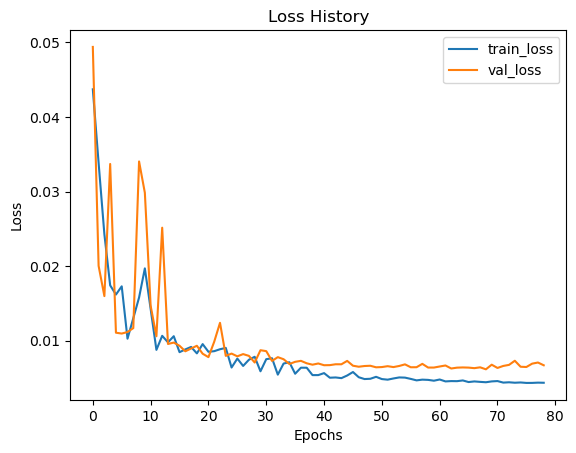

In [43]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

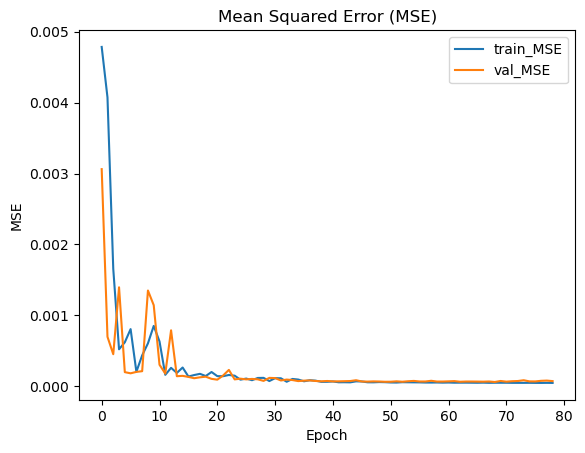

In [44]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

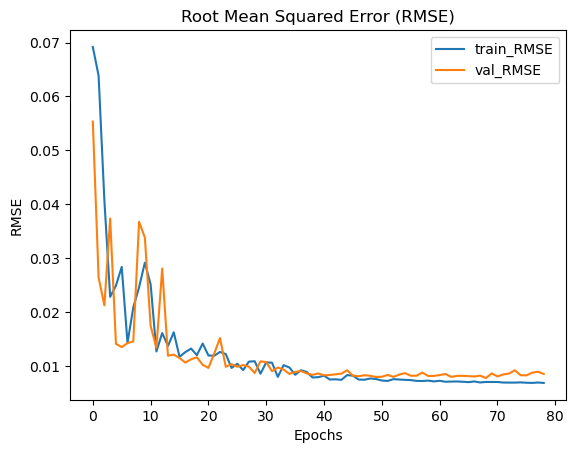

In [45]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

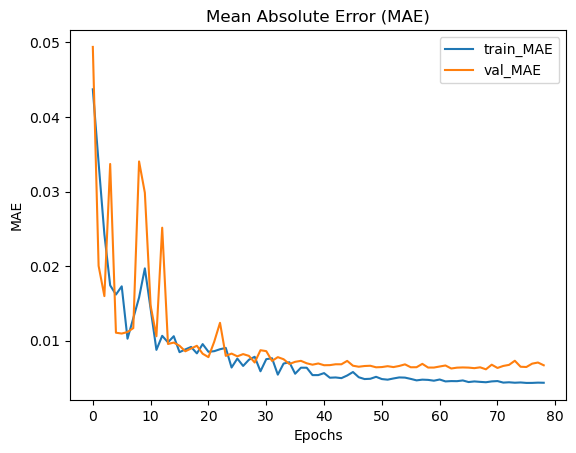

In [46]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

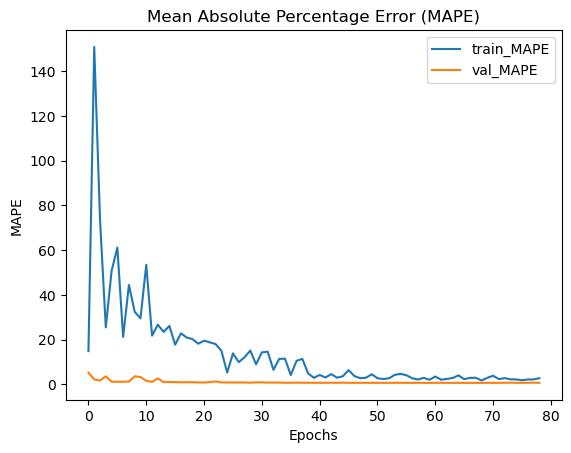

In [47]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 18:57:30.851836: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7599, 4, 4)
Labels Shape: (7599, 1, 1)
Prediction Shape: (7599, 1, 10)


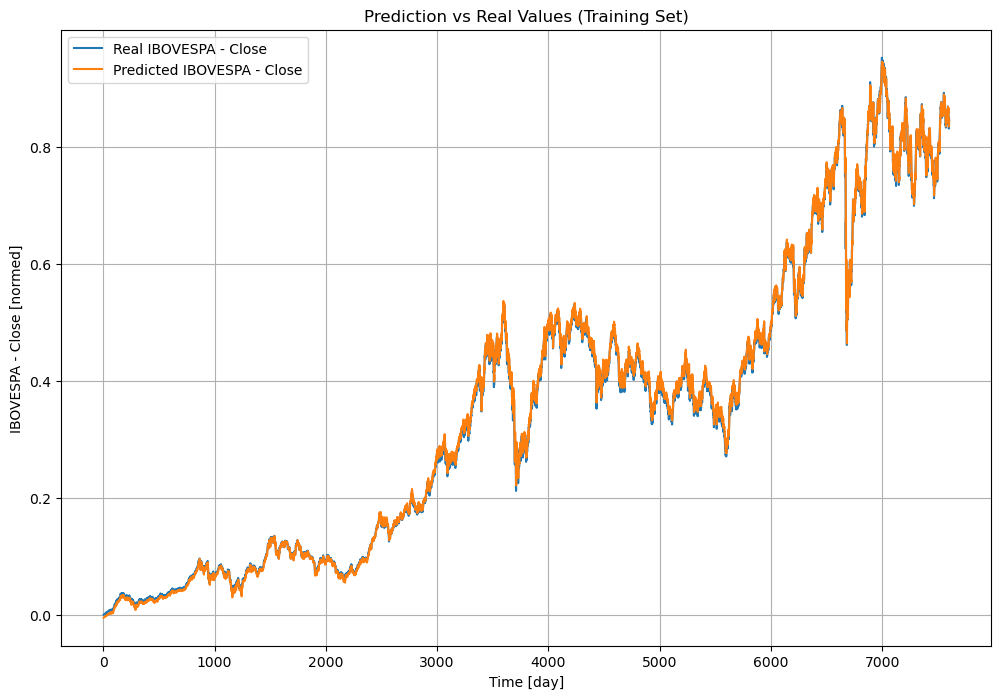

In [48]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 4)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


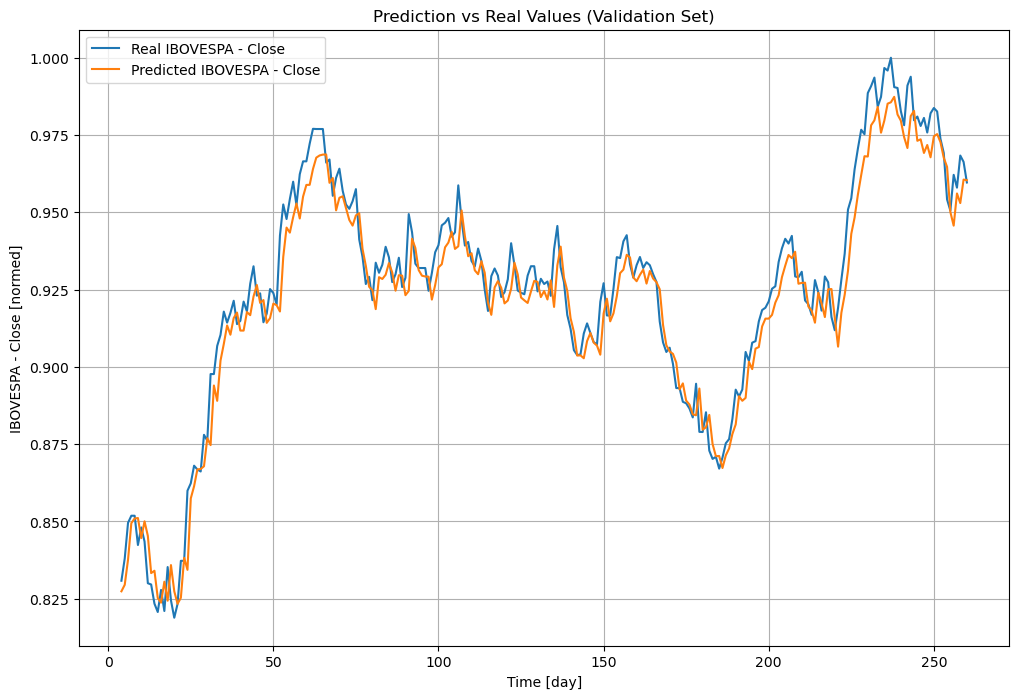

In [49]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 4)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


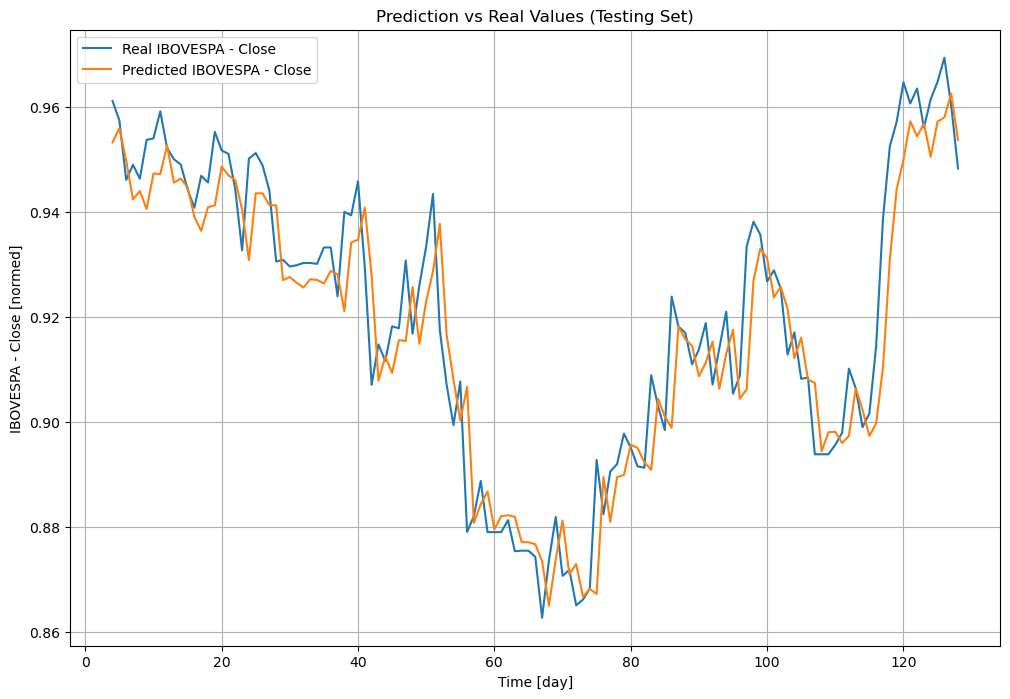

In [50]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

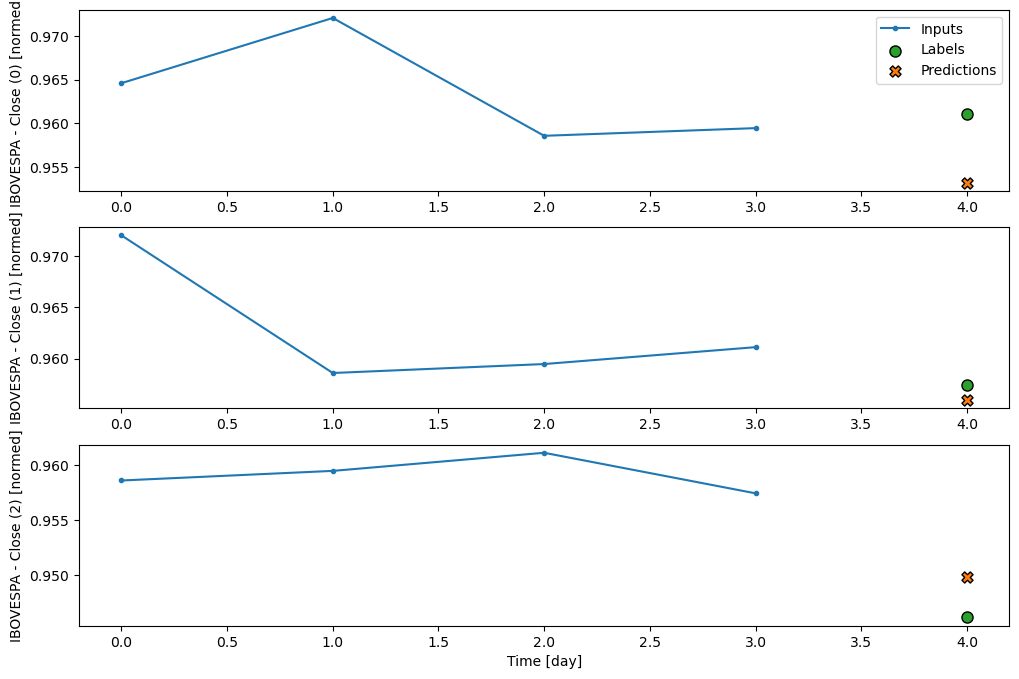

In [51]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [52]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:53s:119ms


In [53]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[[0.9532374 , 0.9532374 , 0.9532374 , ..., 0.9532374 ,
         0.9532374 , 0.9532374 ]],

       [[0.9559412 , 0.9559412 , 0.9559412 , ..., 0.9559412 ,
         0.9559412 , 0.9559412 ]],

       [[0.94977766, 0.94977766, 0.94977766, ..., 0.94977766,
         0.94977766, 0.94977766]],

       ...,

       [[0.9579916 , 0.9579916 , 0.9579916 , ..., 0.9579916 ,
         0.9579916 , 0.9579916 ]],

       [[0.9625467 , 0.9625467 , 0.9625467 , ..., 0.9625467 ,
         0.9625467 , 0.9625467 ]],

       [[0.9536867 , 0.9536867 , 0.9536867 , ..., 0.9536867 ,
         0.9536867 , 0.9536867 ]]], shape=(125, 1, 10), dtype=float32)

In [54]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [55]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')